# Data loading

In [ ]:
import pandas as pd
# Load the CSV file
file_path='data'
#!ls '/content/drive/My Drive/SHAP'
df_aqi_daily = pd.read_csv(file_path+"/dataset_aqi_daily.csv")
df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_data_daily.csv")

df_aqi_daily.DateTime = pd.to_datetime(df_aqi_daily.DateTime)

df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Load the CSV file
#df_aqi_daily = pd.read_csv(os.path.join(input_dir,'BRITS_imputed_preprocessed_combined_data.csv'))
file_path= '/content/drive/My Drive/shap_experiment'
df_processed_combined_data_daily = pd.read_csv(file_path+"/processed_combined_data_daily.csv")
df_aqi_daily = pd.read_csv(file_path+"/dataset_aqi_daily.csv")

df_aqi_daily.DateTime = pd.to_datetime(df_aqi_daily.DateTime)
df_processed_combined_data_daily.DateTime = pd.to_datetime(df_processed_combined_data_daily.DateTime)


Mounted at /content/drive


In [ ]:
df_aqi_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  1815 non-null   datetime64[ns]
 1   AQI       1815 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.5 KB


In [ ]:
df_processed_combined_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        2179 non-null   datetime64[ns]
 1   wind_speed      1461 non-null   float64       
 2   wind_direction  1454 non-null   float64       
 3   precipitation   2165 non-null   float64       
 4   pressure        2178 non-null   float64       
 5   temperature     2179 non-null   float64       
 6   humidity        2165 non-null   float64       
 7   visibility      2178 non-null   float64       
 8   cloudiness      2178 non-null   float64       
 9   Bjelave_PM10    1770 non-null   float64       
 10  Bjelave_SO2     1031 non-null   float64       
 11  Bjelave_NO2     1751 non-null   float64       
 12  Bjelave_O3      1658 non-null   float64       
 13  Bjelave_CO      1065 non-null   float64       
 14  Ilidža_PM2.5    1231 non-null   float64       
 15  Ilid

In [ ]:
# Ensure DateTime column is in datetime format
df_aqi_daily['DateTime'] = pd.to_datetime(df_aqi_daily['DateTime'], dayfirst=True)  # dayfirst=True if your dates are in DD.MM.YYYY format
df_processed_combined_data_daily['DateTime'] = pd.to_datetime(df_processed_combined_data_daily['DateTime'], dayfirst=True)
# Filter to keep only rows before 1.1.2024
df_aqi_daily = df_aqi_daily[df_aqi_daily['DateTime'] < '2023-01-01']
df_processed_combined_data_daily = df_processed_combined_data_daily[df_processed_combined_data_daily['DateTime'] < '2023-01-01']



#  Data imputation with neighbors processed_combined_imputed_with_neighbors_daily.csv

In [ ]:
#columns = ['DateTime', 'Ambasada_PM2.5','wind_speed', 'wind_direction', 'precipitation', 'pressure', 'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2']
columns = ['DateTime', 'wind_speed', 'wind_direction', 'precipitation', 'pressure', 'temperature', 'humidity', 'visibility', 'cloudiness', 'Bjelave_PM10', 'Bjelave_SO2', 'Bjelave_NO2']

df_processed_combined_data_daily = df_processed_combined_data_daily[columns]

In [ ]:
def fill_missing_days_with_neighbors(df, label):
    df.set_index('DateTime', inplace=True)
    # counts number of consecutive missing values and stores start and end date of each sequence in a list
    nan_start_end_dates = df[df[label].isnull()].groupby(df[label].notnull().cumsum()).apply(lambda x: (x.index[0], x.index[-1])).tolist()
    for start_date, end_date in nan_start_end_dates:
        # Calculate the number of missing days between the start and end date +1 because we want to include the end date
        missing_days_number = (end_date - start_date).days + 1
        print(f"Filling missing values between {start_date} and {end_date} = number of missing days: {missing_days_number}")
        # take previous and next missing_days_number days grouped by day and calculate mean for each hour
        prev_days = df.loc[start_date - pd.DateOffset(days=missing_days_number) : start_date]
        next_days = df.loc[end_date : end_date + pd.DateOffset(days=missing_days_number)]
        neighbor_days = pd.concat([prev_days, next_days])
        mean_val = neighbor_days[label].mean()
        # fill missing days with mean values
        df.loc[start_date:end_date, label] = mean_val
    df.reset_index(inplace=True)
    return df

In [ ]:
total_nulls = df_aqi_daily.isnull().sum().sum()
print(f"Ukupno null vrijednosti: {total_nulls}")
#fill_missing_days_with_neighbors(df_aqi_daily,label= 'AQI')

Ukupno null vrijednosti: 0


In [ ]:
for column in df_processed_combined_data_daily.columns[1:]:  # Columns from index 1 to 14
    if df_processed_combined_data_daily[column].isnull().any():  # Check if there are missing values
        print(f"Processing column: {column}")
        df_processed_combined_data_daily = fill_missing_days_with_neighbors(df_processed_combined_data_daily, column)
    else:
        print(f"No missing values in column: {column}")

Processing column: wind_speed
Filling missing values between 2018-01-01 00:00:00 and 2018-12-31 00:00:00 = number of missing days: 365
Processing column: wind_direction
Filling missing values between 2018-01-01 00:00:00 and 2018-12-31 00:00:00 = number of missing days: 365
Filling missing values between 2021-11-24 00:00:00 and 2021-11-30 00:00:00 = number of missing days: 7
Processing column: precipitation
Filling missing values between 2018-09-04 00:00:00 and 2018-09-04 00:00:00 = number of missing days: 1
Filling missing values between 2018-09-08 00:00:00 and 2018-09-20 00:00:00 = number of missing days: 13
Processing column: pressure
Filling missing values between 2019-02-24 00:00:00 and 2019-02-24 00:00:00 = number of missing days: 1
No missing values in column: temperature
Processing column: humidity
Filling missing values between 2018-09-04 00:00:00 and 2018-09-04 00:00:00 = number of missing days: 1
Filling missing values between 2018-09-08 00:00:00 and 2018-09-20 00:00:00 = num

In [ ]:
df_aqi_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0 to 1684
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  1685 non-null   datetime64[ns]
 1   AQI       1685 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [ ]:
mkdir data

In [ ]:
df_aqi_daily.to_csv('data/processed_combined_imputed_with_neighbors_daily.csv', index=False)
df_processed_combined_data_daily.to_csv('data/processed_combined_imputed_with_neighbors_df_processed_combined_data_daily.csv', index=False)

In [ ]:
df_aqi_daily.tail(1)

DateTime         AQI
1684 2022-12-31  173.791667

# Data imputation with average

Filling missing values with average

In [ ]:
df_aqi_daily.head(1)

DateTime   AQI
0 2018-05-22  58.0

In [ ]:
def fill_missing_with_average(df, label):
    """
    Fills missing values in the 'AQI' column of the given DataFrame by taking the average value of the same month and day.
    Parameters:
    df (DataFrame): The DataFrame containing the 'DateTime' and 'AQI' columns.
    Returns:
    DataFrame: The DataFrame with the missing values in the 'AQI' column filled with the average value of the same month and day.
    """
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day

    df[label] = df.groupby(['Month', 'Day'])[label].transform(lambda x: x.fillna(x.mean()))

    df.drop(columns=['Month', 'Day'], inplace=True)
    return df

In [ ]:
for column in df_aqi_daily.columns[1:]:  # Columns from index 1 to 14
    if df_aqi_daily[column].isnull().any():  # Check if there are missing values
        print(f"Processing column: {column}")
        df_aqi_daily = fill_missing_with_average(df_aqi_daily, column)
    else:
        print(f"No missing values in column: {column}")

No missing values in column: AQI


In [ ]:
df_aqi_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1685 entries, 0 to 1684
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  1685 non-null   datetime64[ns]
 1   AQI       1685 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.5 KB


In [ ]:
df_aqi_daily.tail(2)

DateTime         AQI
1683 2022-12-30  183.565217
1684 2022-12-31  173.791667

# Data visualisation

In [ ]:
def plot_forecast_mod(test, forecast, date_col='ds', true_label='y', predicted_label='yhat'):
    plt.figure(figsize=(10, 6))
    plt.plot(test[date_col], test[true_label], color='#0F5257', label='Actual')
    plt.plot(test[date_col], forecast[predicted_label], color="#8945cc", label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(true_label)
    plt.title('Actual vs Predicted ' + true_label)
    plt.show()

def plot_forecast(test, forecast, date_col='ds', true_label='y', predicted_label='yhat'):
    plt.figure(figsize=(10, 6))
    plt.plot(test[date_col], test[true_label], label='Actual')
    plt.plot(test[date_col], forecast[predicted_label], label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(true_label)
    plt.title('Actual vs Predicted ' + true_label)
    plt.show()

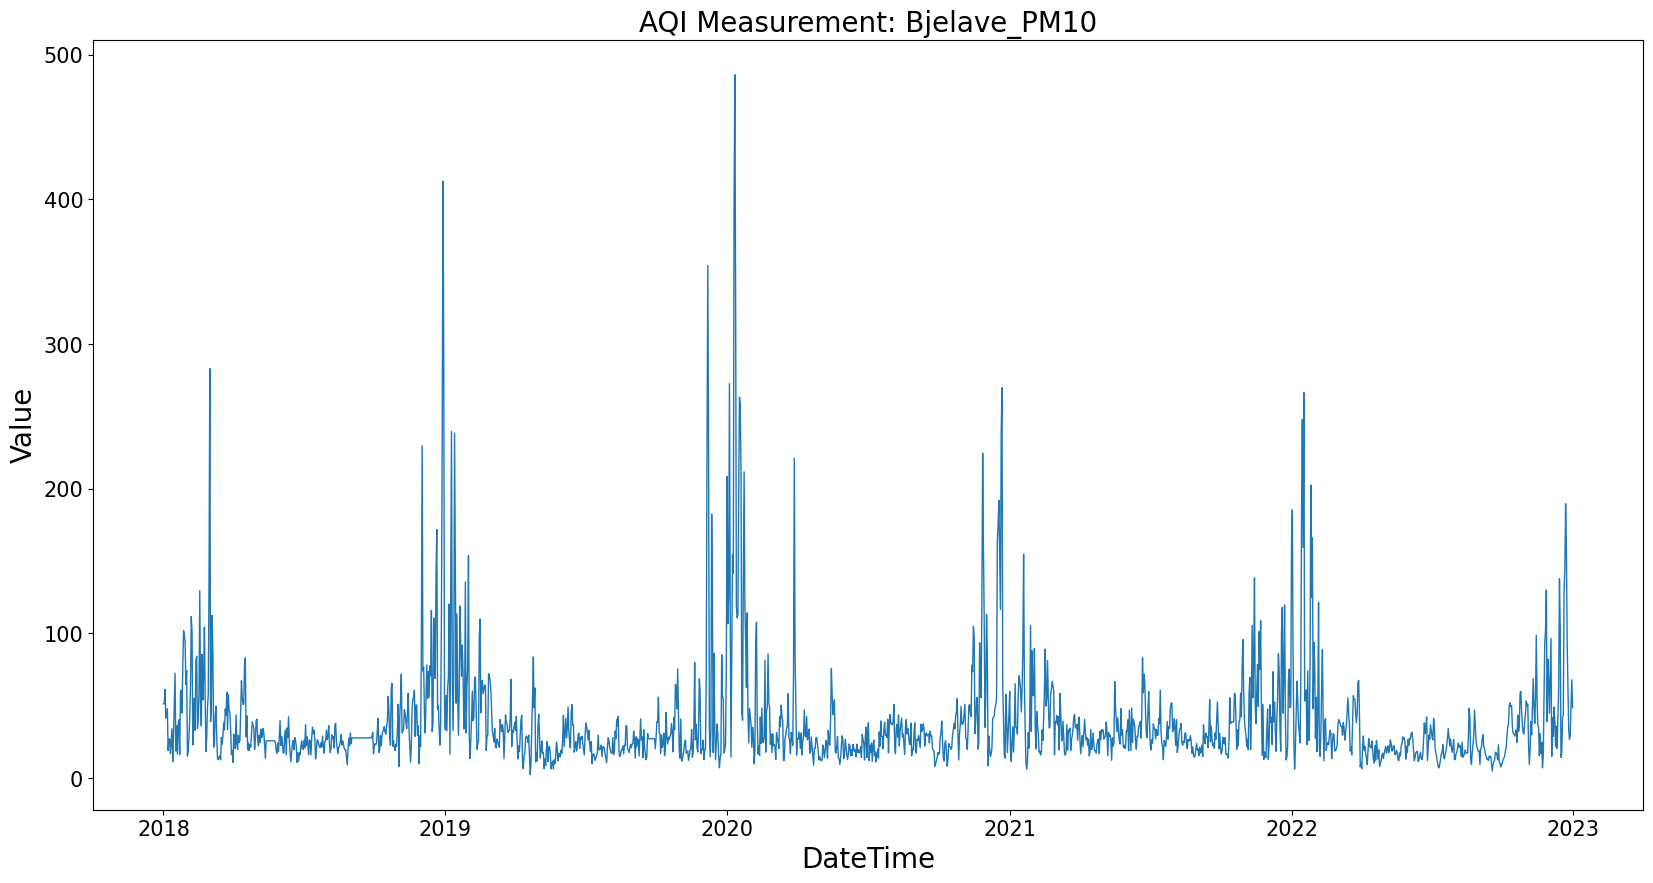

In [ ]:
import matplotlib.pyplot as plt
#df_processed_combined_data_daily # Plot time seris data for columns, each with its own title
plt.figure(figsize=(20, 10))
plt.plot(df_processed_combined_data_daily['DateTime'], df_processed_combined_data_daily['Bjelave_PM10'], linewidth=1)

plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.title(f'AQI Measurement: Bjelave_PM10', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

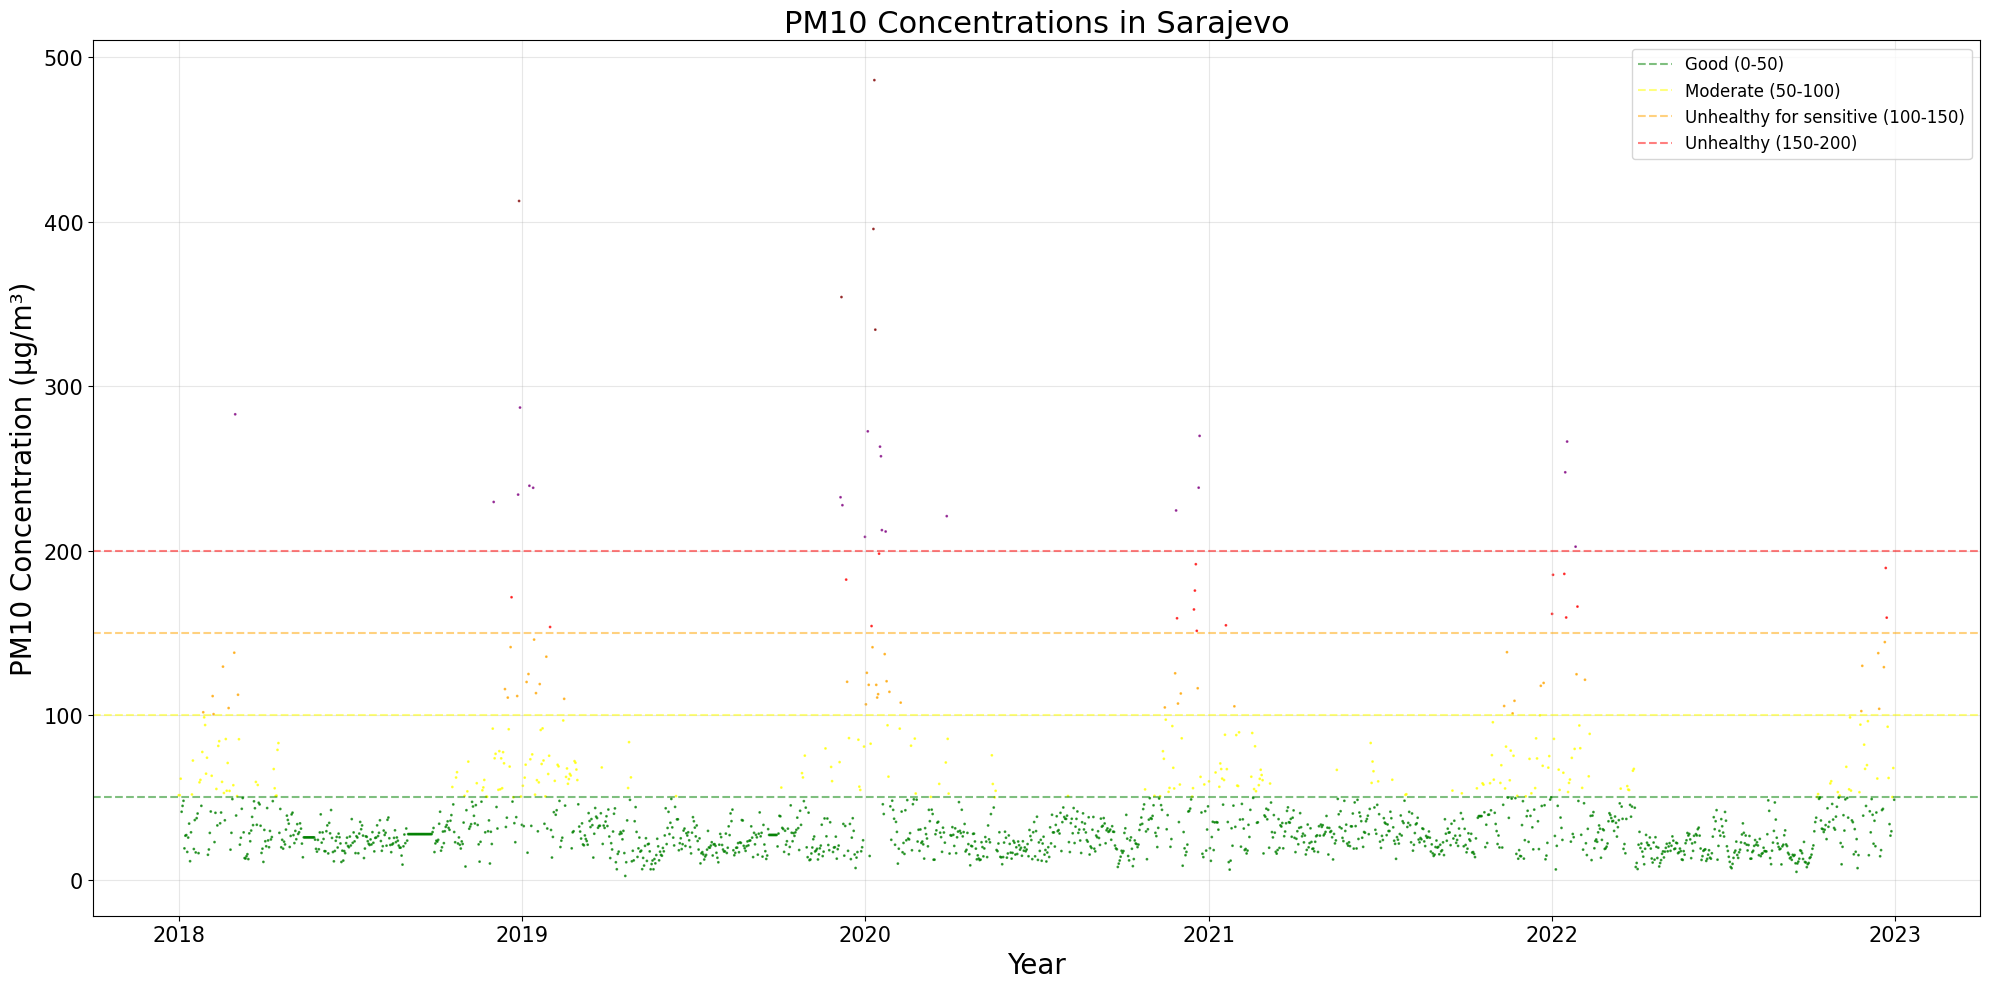

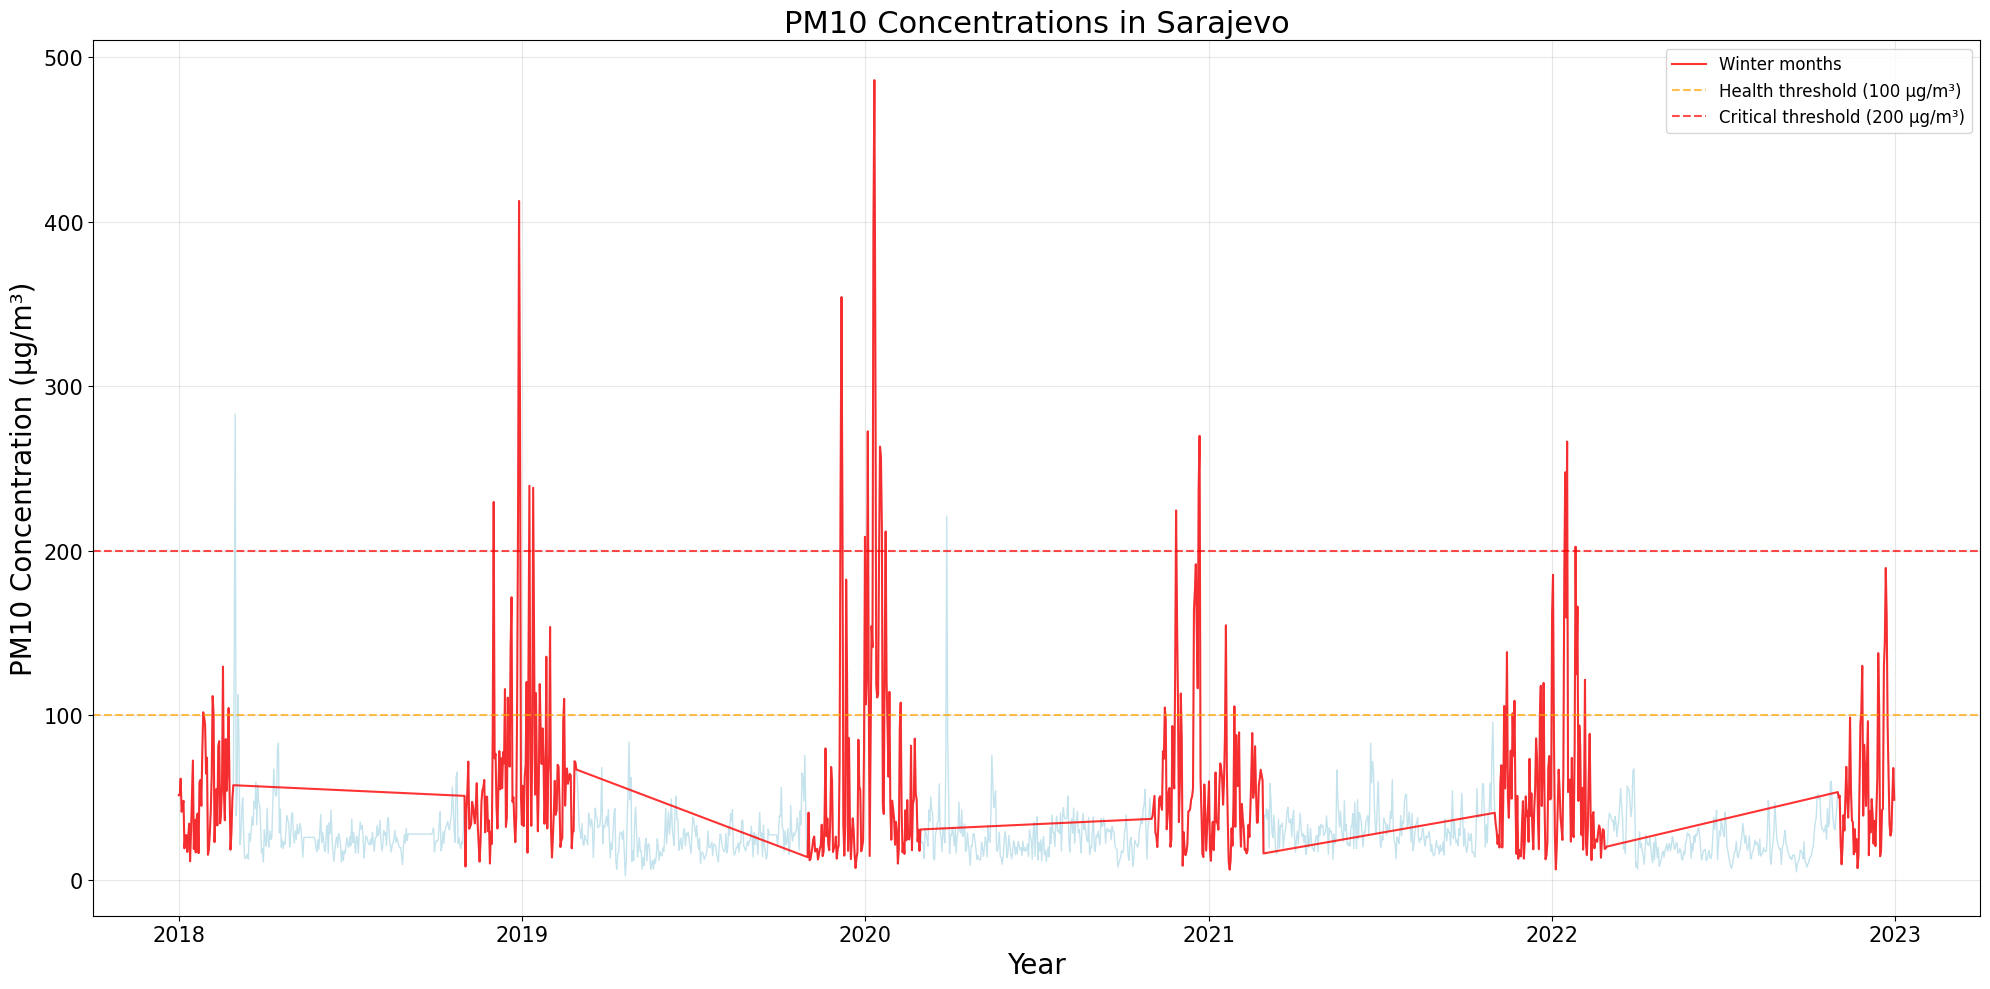

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

def get_color_by_aqi(value):
    if pd.isna(value):
        return 'gray'
    elif value <= 50:
        return 'green'      # Good
    elif value <= 100:
        return 'yellow'     # Moderate
    elif value <= 150:
        return 'orange'     # Unhealthy for sensitive groups
    elif value <= 200:
        return 'red'        # Unhealthy
    elif value <= 300:
        return 'purple'     # Very unhealthy
    else:
        return 'maroon'     # Hazardous


colors = [get_color_by_aqi(val) for val in df_processed_combined_data_daily['Bjelave_PM10']]
plt.scatter(df_processed_combined_data_daily['DateTime'],
           df_processed_combined_data_daily['Bjelave_PM10'],
           c=colors, s=1, alpha=0.7)

df_processed_combined_data_daily['Month'] = pd.to_datetime(df_processed_combined_data_daily['DateTime']).dt.month
winter_months = [11, 12, 1, 2]  # Nov, Dec, Jan, Feb

seasonal_colors = ['red' if month in winter_months else 'lightblue'
                  for month in df_processed_combined_data_daily['Month']]


# plt.scatter(df_processed_combined_data_daily['DateTime'],
#            df_processed_combined_data_daily['Bjelave_PM10'],
#            c=seasonal_colors, s=1, alpha=0.7)

plt.axhline(y=50, color='green', linestyle='--', alpha=0.5, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', alpha=0.5, label='Moderate (50-100)')
plt.axhline(y=150, color='orange', linestyle='--', alpha=0.5, label='Unhealthy for sensitive (100-150)')
plt.axhline(y=200, color='red', linestyle='--', alpha=0.5, label='Unhealthy (150-200)')

plt.xlabel('Year', fontsize=20)
plt.ylabel('PM10 Concentration (μg/m³)', fontsize=20)
plt.title('PM10 Concentrations in Sarajevo', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(20, 10))

plt.plot(df_processed_combined_data_daily['DateTime'],
         df_processed_combined_data_daily['Bjelave_PM10'],
         color='lightblue', linewidth=1, alpha=0.7)

winter_data = df_processed_combined_data_daily[
    df_processed_combined_data_daily['Month'].isin(winter_months)
]
plt.plot(winter_data['DateTime'],
         winter_data['Bjelave_PM10'],
         color='red', linewidth=1.5, alpha=0.8, label='Winter months')

plt.axhline(y=100, color='orange', linestyle='--', alpha=0.7, label='Health threshold (100 μg/m³)')
plt.axhline(y=200, color='red', linestyle='--', alpha=0.7, label='Critical threshold (200 μg/m³)')

plt.xlabel('Year', fontsize=20)
plt.ylabel('PM10 Concentration (μg/m³)', fontsize=20)
plt.title('PM10 Concentrations in Sarajevo', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
df_processed_combined_data_daily = df_processed_combined_data_daily.drop('Month', axis=1)

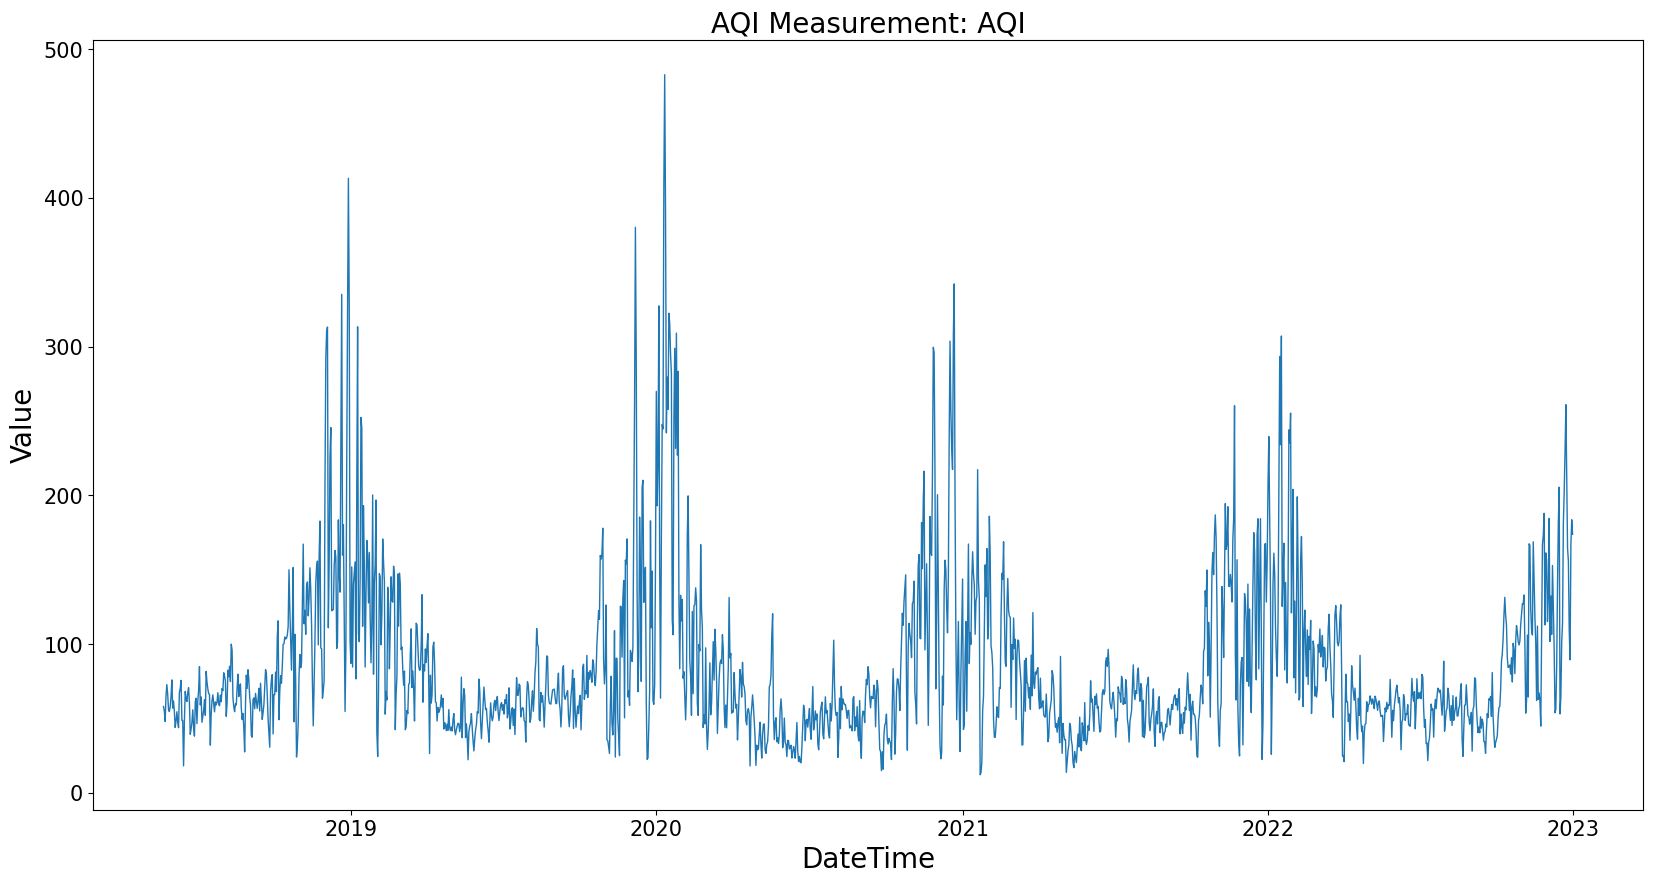

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df_aqi_daily['DateTime'], df_aqi_daily['AQI'], linewidth=1)

plt.xlabel('DateTime', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.title(f'AQI Measurement: AQI', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

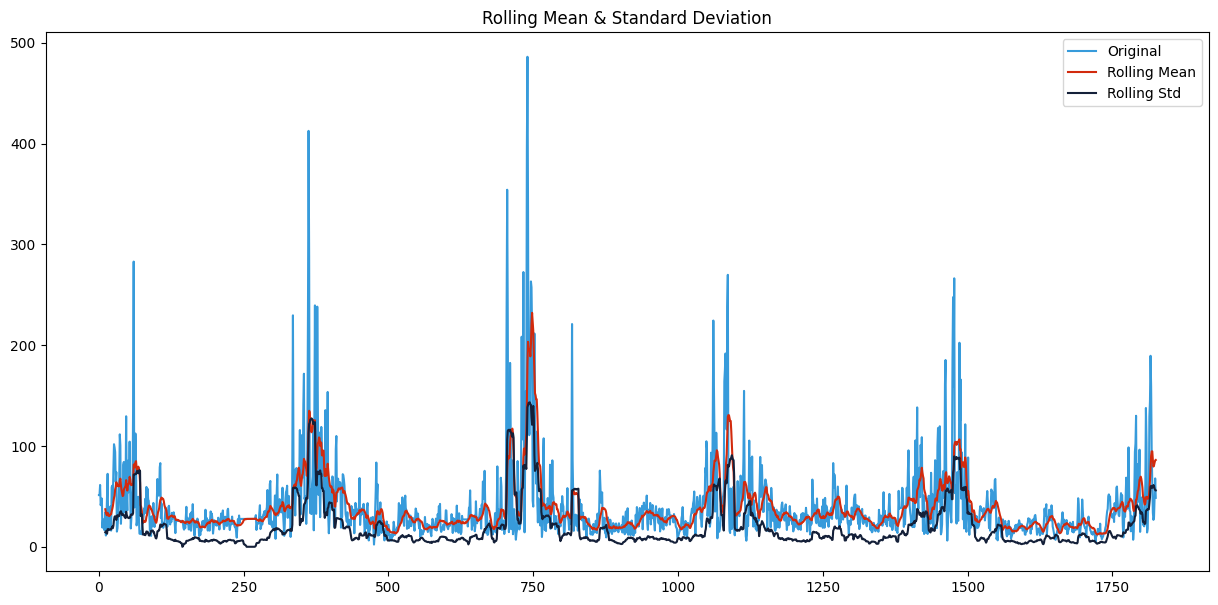

In [ ]:
# df_processed_combined_data_daily
rolling_avg = df_processed_combined_data_daily["Bjelave_PM10"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolling_std = df_processed_combined_data_daily["Bjelave_PM10"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df_processed_combined_data_daily["Bjelave_PM10"], color='#379BDB', label='Original')
plt.plot(rolling_avg, color='#D22A0D', label='Rolling Mean')
plt.plot(rolling_std, color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

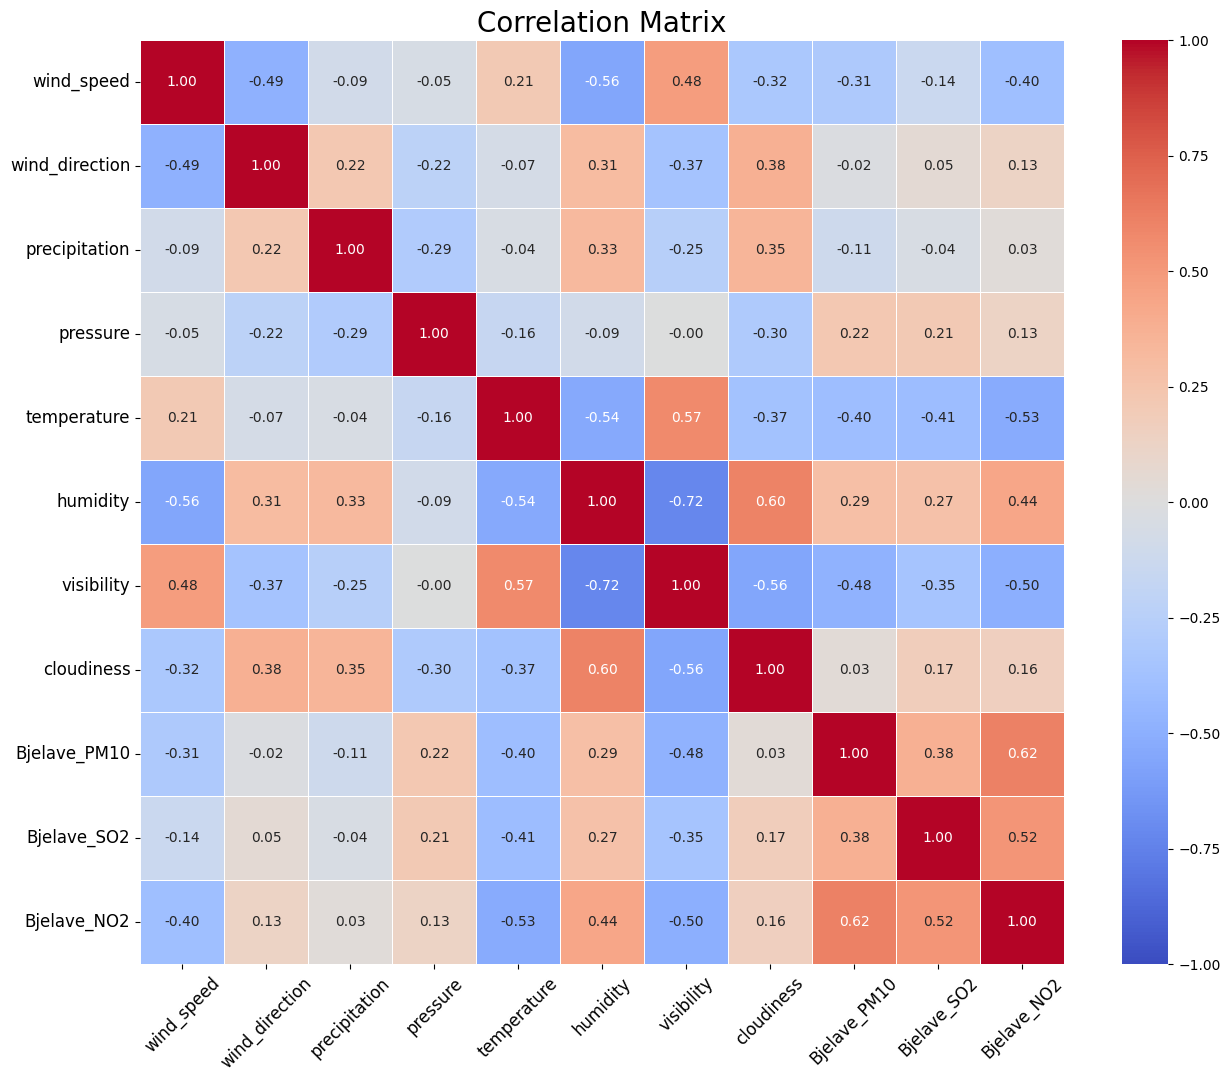

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with index 1 to 13
selected_columns = df_processed_combined_data_daily.iloc[:, 1:]

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


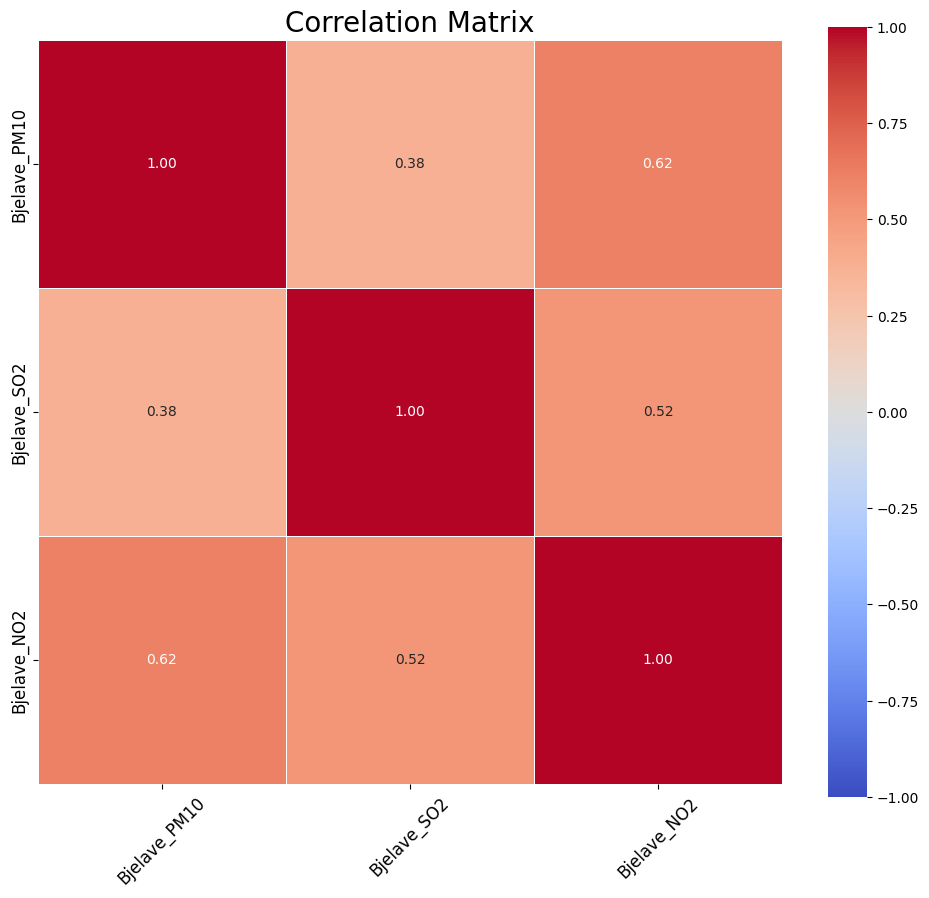

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns with index 1 to 13
selected_columns = df_processed_combined_data_daily.iloc[:, 9:]

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

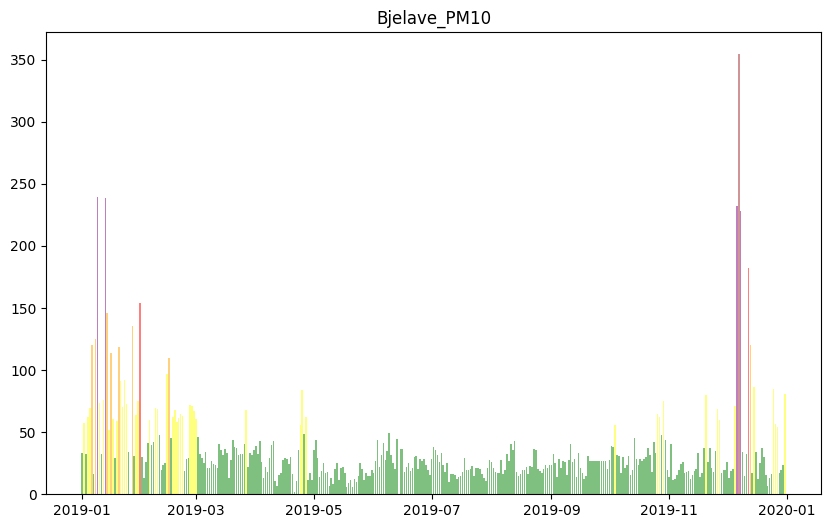

In [ ]:
def plot_colored(df, start_date, end_date, label, categories):
    time_period = pd.date_range(start_date, end_date, freq='D')
    df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

    plt.figure(figsize=(10,6))

    for category in categories:
        color, start, end = category
        # plt.plot(df.loc[mask, label], color=color)
        # plt.hist(df.loc[(df[label] >= start) & (df[label] <= end), label], bins=20, color=color, alpha=0.5)
        plt.bar(df.loc[(df[label] >= start) & (df[label] <= end), "DateTime"], df.loc[(df[label] >= start) & (df[label] <= end), label], color=color, alpha=0.5)

    plt.title(label)
    plt.show()

categories = [('green', 0, 50), ('yellow', 51, 100), ('orange', 101, 150), ('red', 151, 200), ('purple', 201, 250), ('brown', 300, df_processed_combined_data_daily['Bjelave_PM10'].max())]
plot_colored(df_processed_combined_data_daily, '2019-01-01', '2019-12-31', 'Bjelave_PM10', categories)

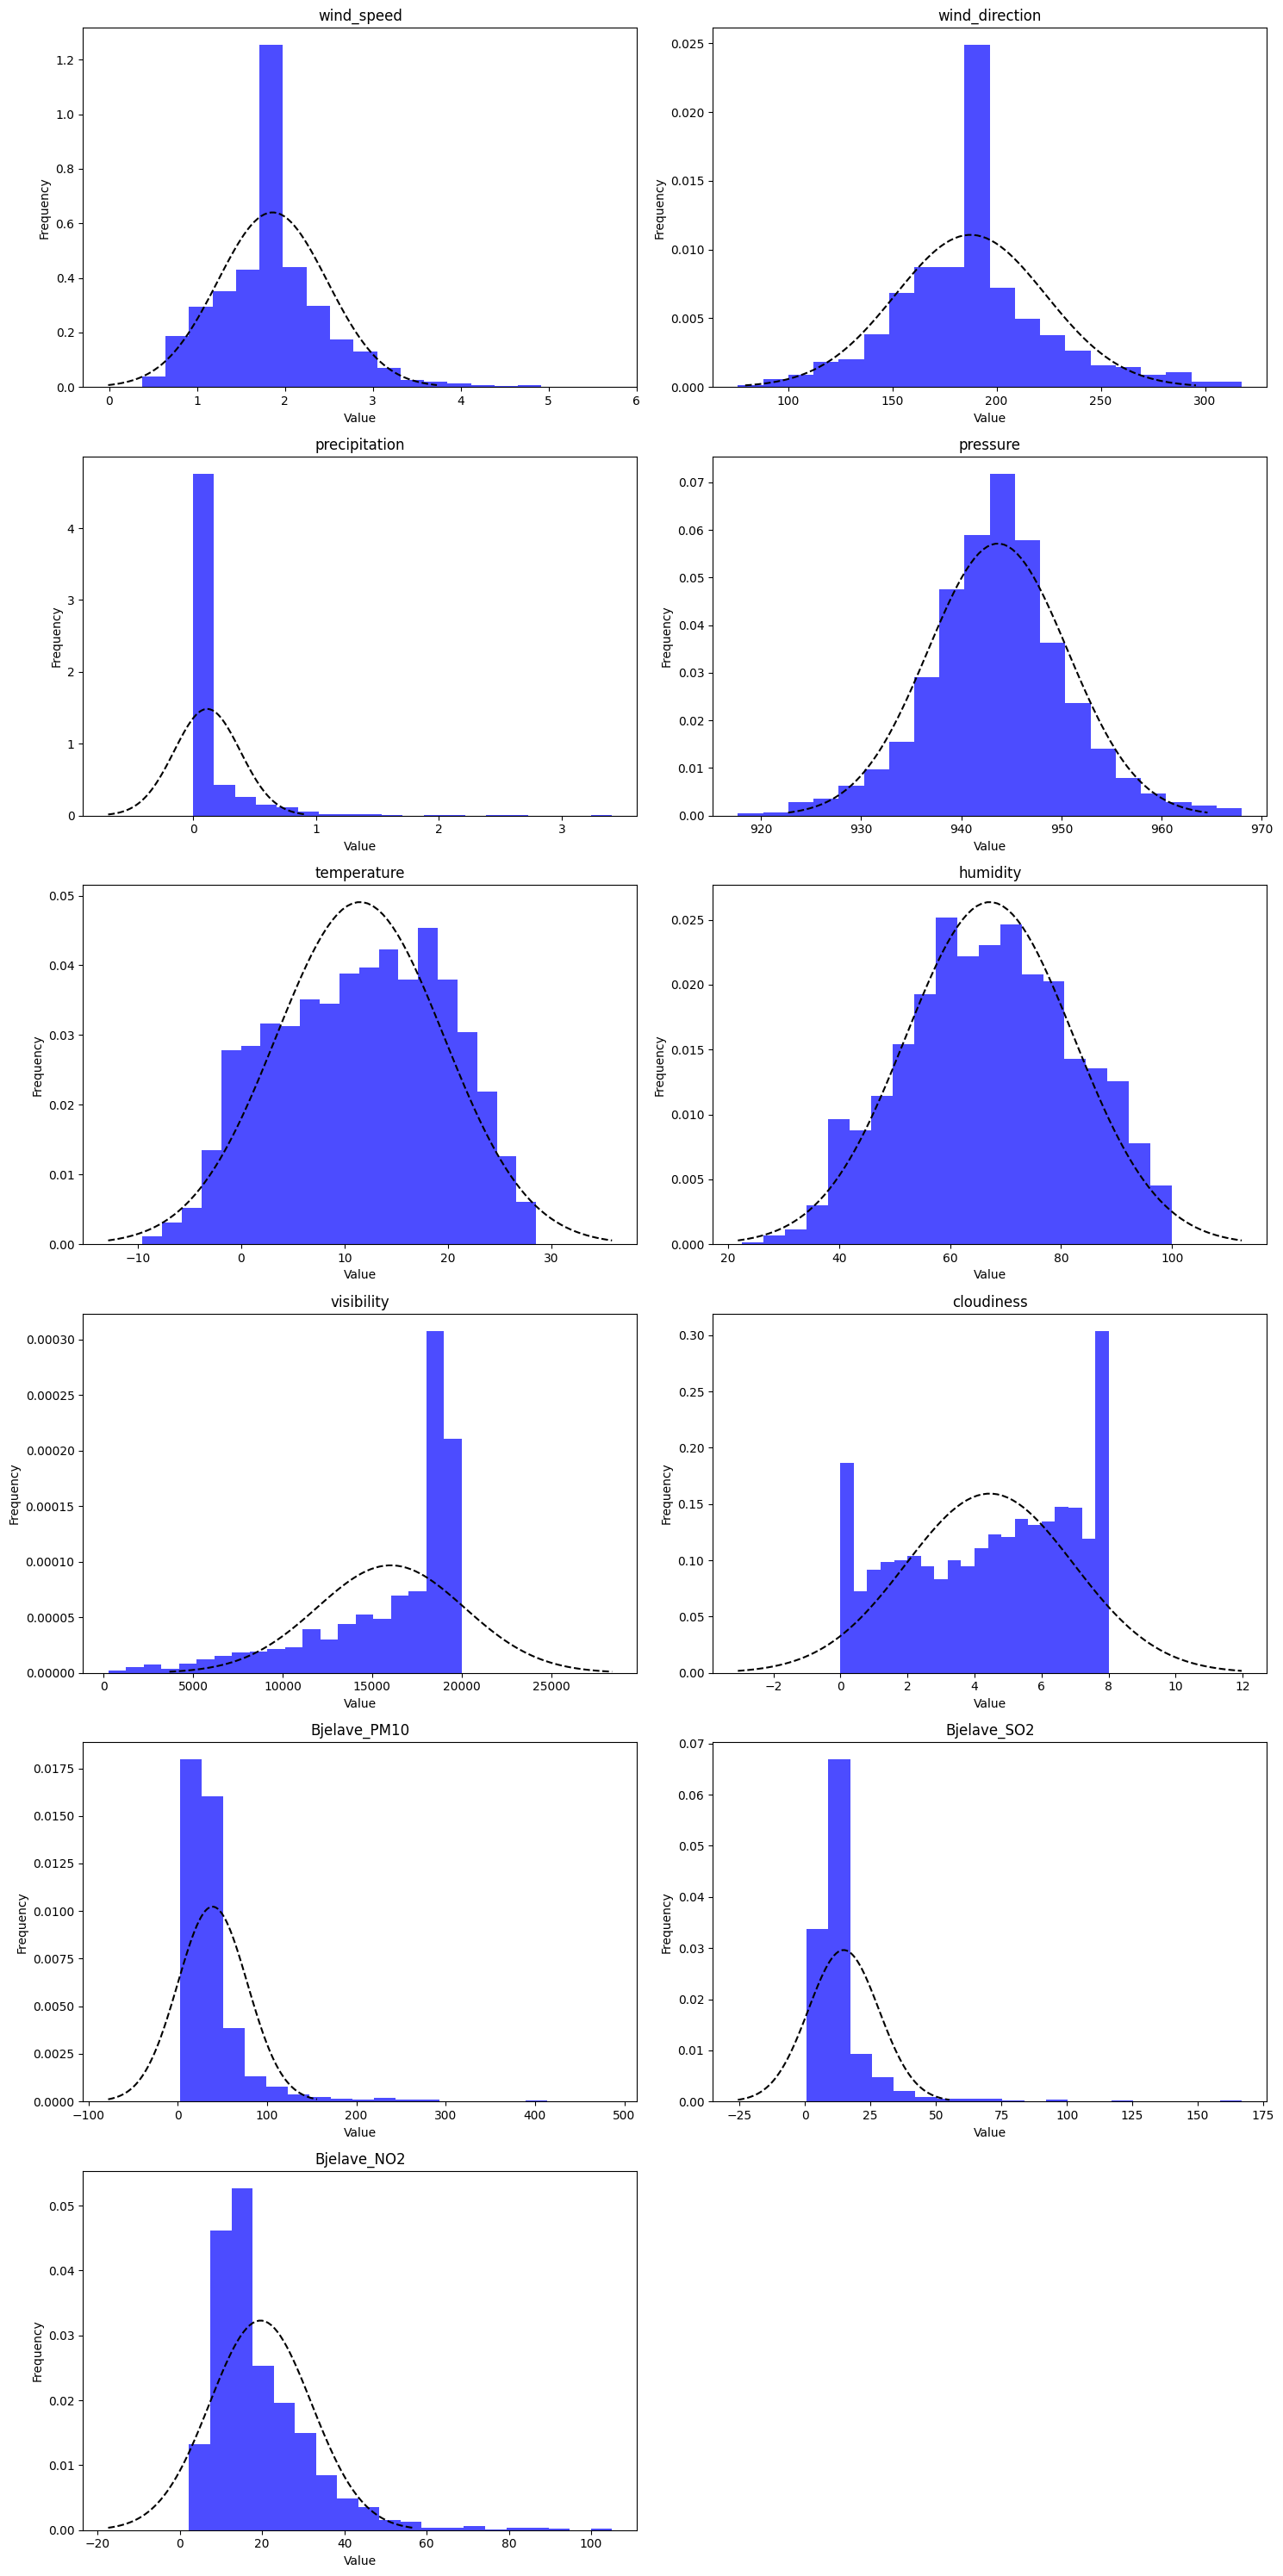

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
df = df_processed_combined_data_daily

num_columns = len(df.columns) - 1
num_rows = (num_columns + 1) // 2

# Set up the figure and axes with the new grid size
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
axs = axs.flatten()

# Plotting histograms with overlaid normal distribution curve
for i, var in enumerate(df.columns[1:]):  # Loop with index 'i' for subplots
    mean_val = df[var].mean()
    std_val = df[var].std()
    x_vals = np.linspace(mean_val - 3*std_val, mean_val + 3*std_val, 100)

    # Plot histogram
    axs[i].hist(df[var], bins=20, density=True, color='blue', alpha=0.7)

    # Plot normal distribution curve
    axs[i].plot(x_vals, norm.pdf(x_vals, mean_val, std_val), color='black', linestyle='dashed')


    axs[i].set_title(var)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


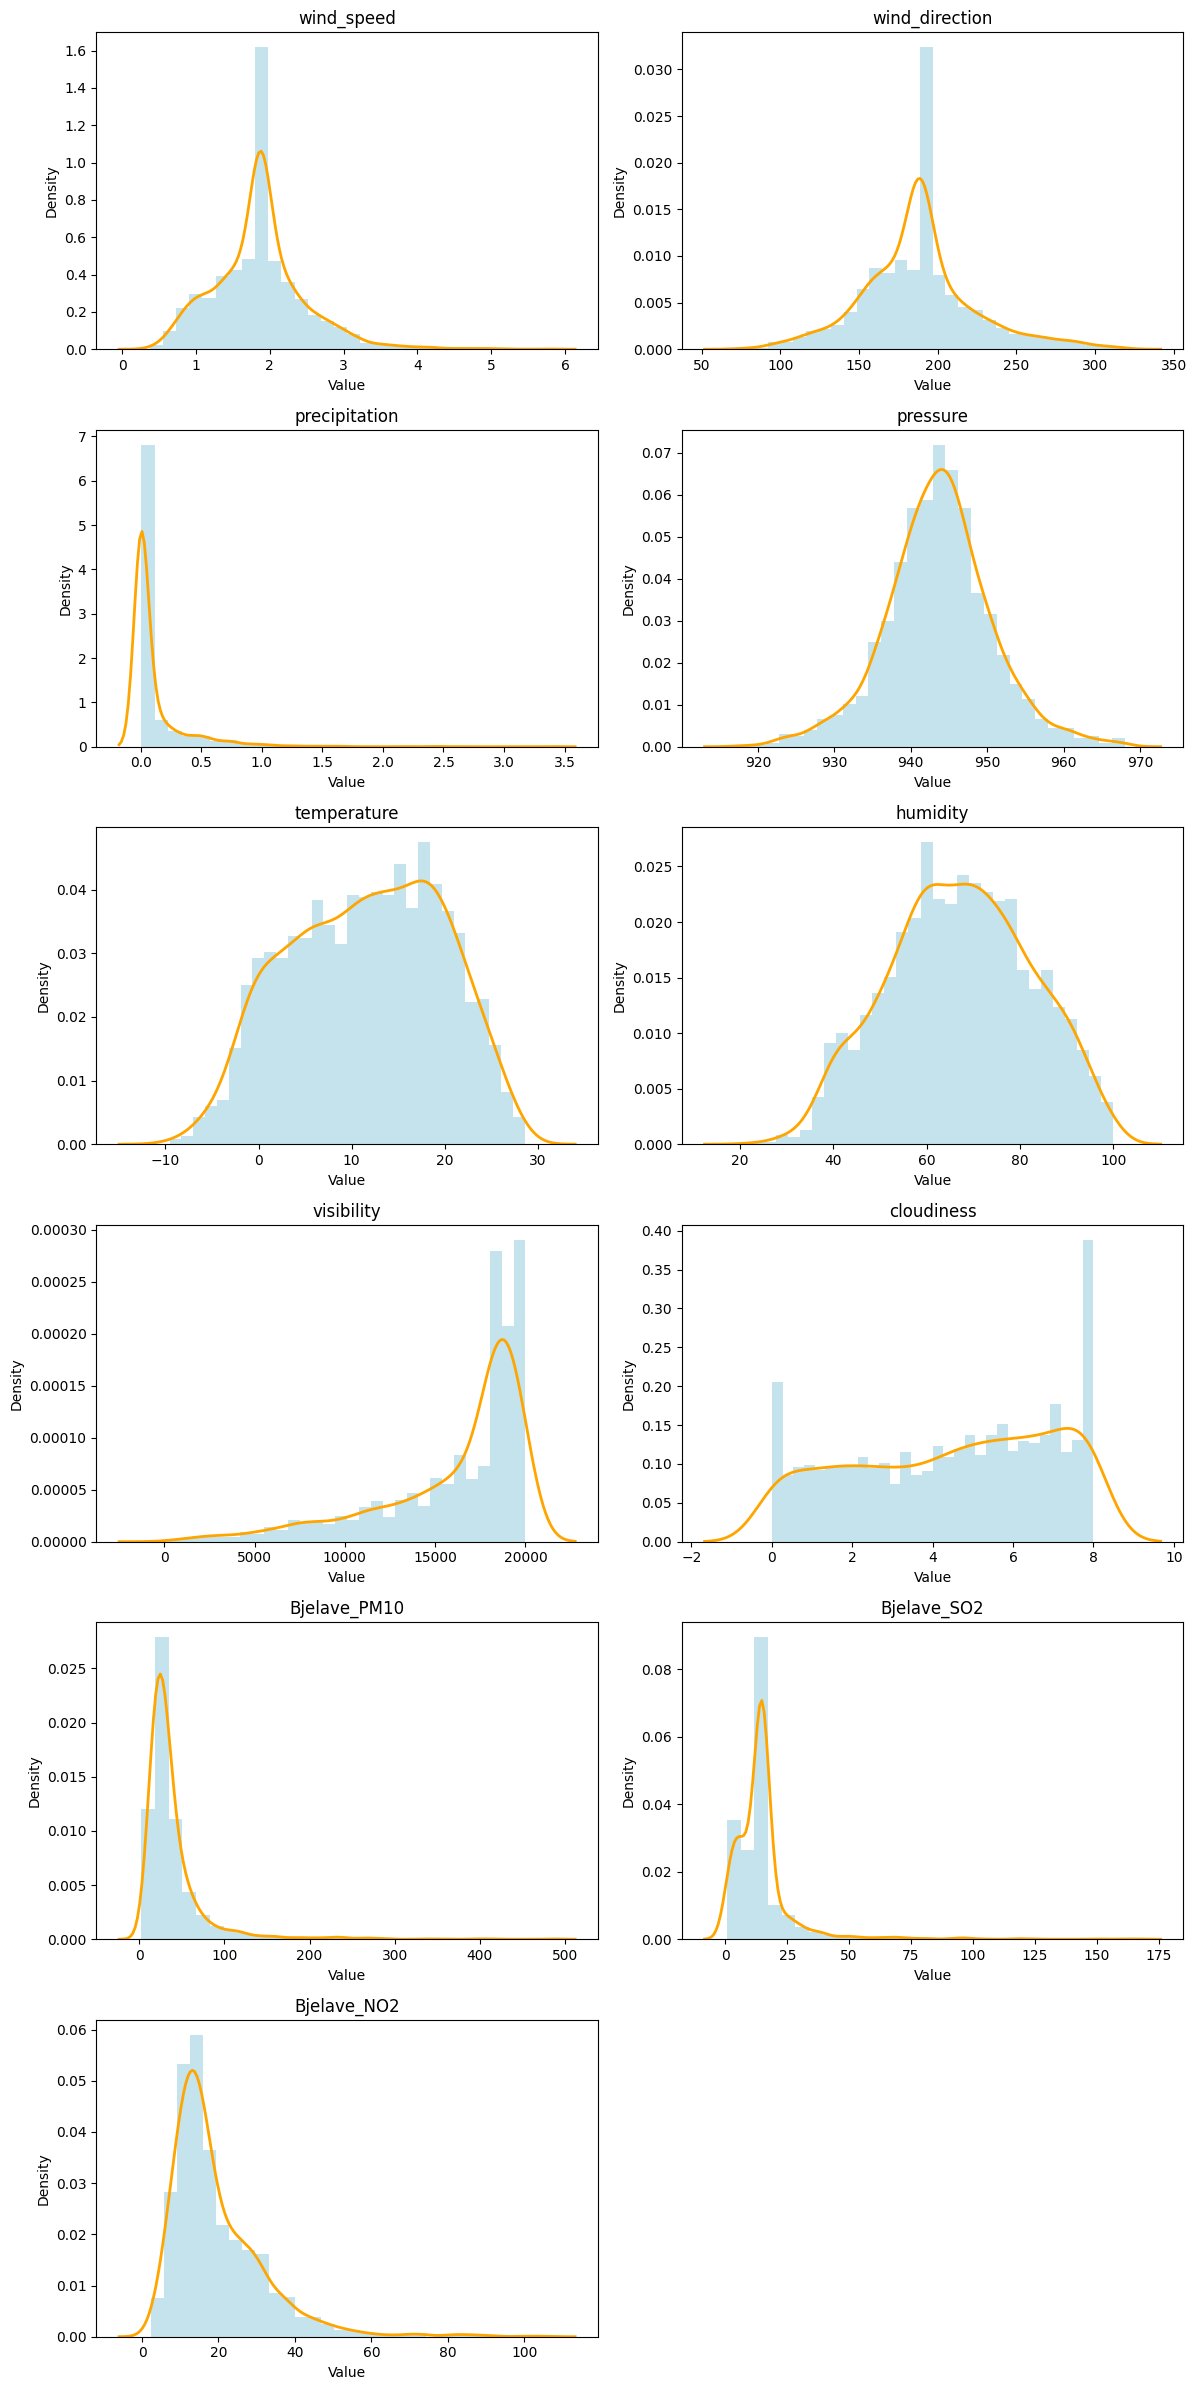

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = df_processed_combined_data_daily.iloc[:, 1:]
n_vars = len(selected_columns.columns)
n_cols = 2
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(selected_columns.columns):
    axes[i].hist(
        df_processed_combined_data_daily[var],
        bins=30,
        density=True,
        alpha=0.7,
        color='lightblue'
    )
    sns.kdeplot(
        data=df_processed_combined_data_daily[var],
        ax=axes[i],
        color='orange',
        linewidth=2
    )
    axes[i].set_title(var)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

for j in range(n_vars, len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(
    hspace=1,
    wspace=0.3
)

plt.tight_layout()
plt.show()

# Dataset splitting

In [ ]:
def train_test_split(df, date):
    df = df.copy()
    train_data = df[df['DateTime'] < date].copy()
    test_data = df[df['DateTime'] >= date].copy() # df.DateTime = df.DateTime.dt.strftime('%d/%m/%Y %H:%M')
    return train_data, test_data

def train_test_split_from_to(df, start_date, end_date, slice_date):
    df = df.copy()
    train_data = df[(df['DateTime'] >= start_date) & (df['DateTime'] < slice_date)].copy()
    test_data = df[(df['DateTime'] >= slice_date) & (df['DateTime'] <= end_date)].copy()
    return train_data, test_data

def plot_train_test_data(train_data, test_data, date_column, label):
    plt.figure(figsize=(20,10))
    plt.plot(train_data[date_column], train_data[label], color='blue', label='Train Data')
    plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel(date_column)
    plt.ylabel(label)
    plt.title(label + ' Train and Test Data')
    plt.legend()
    plt.show()

In [ ]:
#input window = 30
date = df_aqi_daily['DateTime'].max() - pd.Timedelta(days=30)
train_data_aqi_ws_thirty, test_data_aqi_ws_thirty = train_test_split(df_aqi_daily, date) #

date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=30)
train_data_combined_ws_thirty, test_data_combined_ws_thirty = train_test_split(df_processed_combined_data_daily, date) #

#input window = 60
date = df_aqi_daily['DateTime'].max() - pd.Timedelta(days=60)
train_data_aqi_ws_sixty, test_data_aqi_ws_sixty = train_test_split(df_aqi_daily, date) #

date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=60)
train_data_combined_ws_sixty, test_data_combined_ws_sixty = train_test_split(df_processed_combined_data_daily, date)

#input window = 90
date = df_aqi_daily['DateTime'].max() - pd.Timedelta(days=90)
train_data_aqi_ws_ninety, test_data_aqi_ws_ninety = train_test_split(df_aqi_daily, date) #

date = df_processed_combined_data_daily['DateTime'].max() - pd.Timedelta(days=90)
train_data_combined_ws_ninety, test_data_combined_ws_ninety = train_test_split(df_processed_combined_data_daily, date) #

In [ ]:
#plot_train_test_data(train_data_aqi_ws_thirty, test_data_aqi_ws_thirty, 'DateTime', 'AQI')
#plot_train_test_data(train_data_aqi_ws_sixty, test_data_aqi_ws_sixty, 'DateTime', 'AQI')
#plot_train_test_data(train_data_aqi_ws_ninety, test_data_aqi_ws_ninety, 'DateTime', 'AQI')

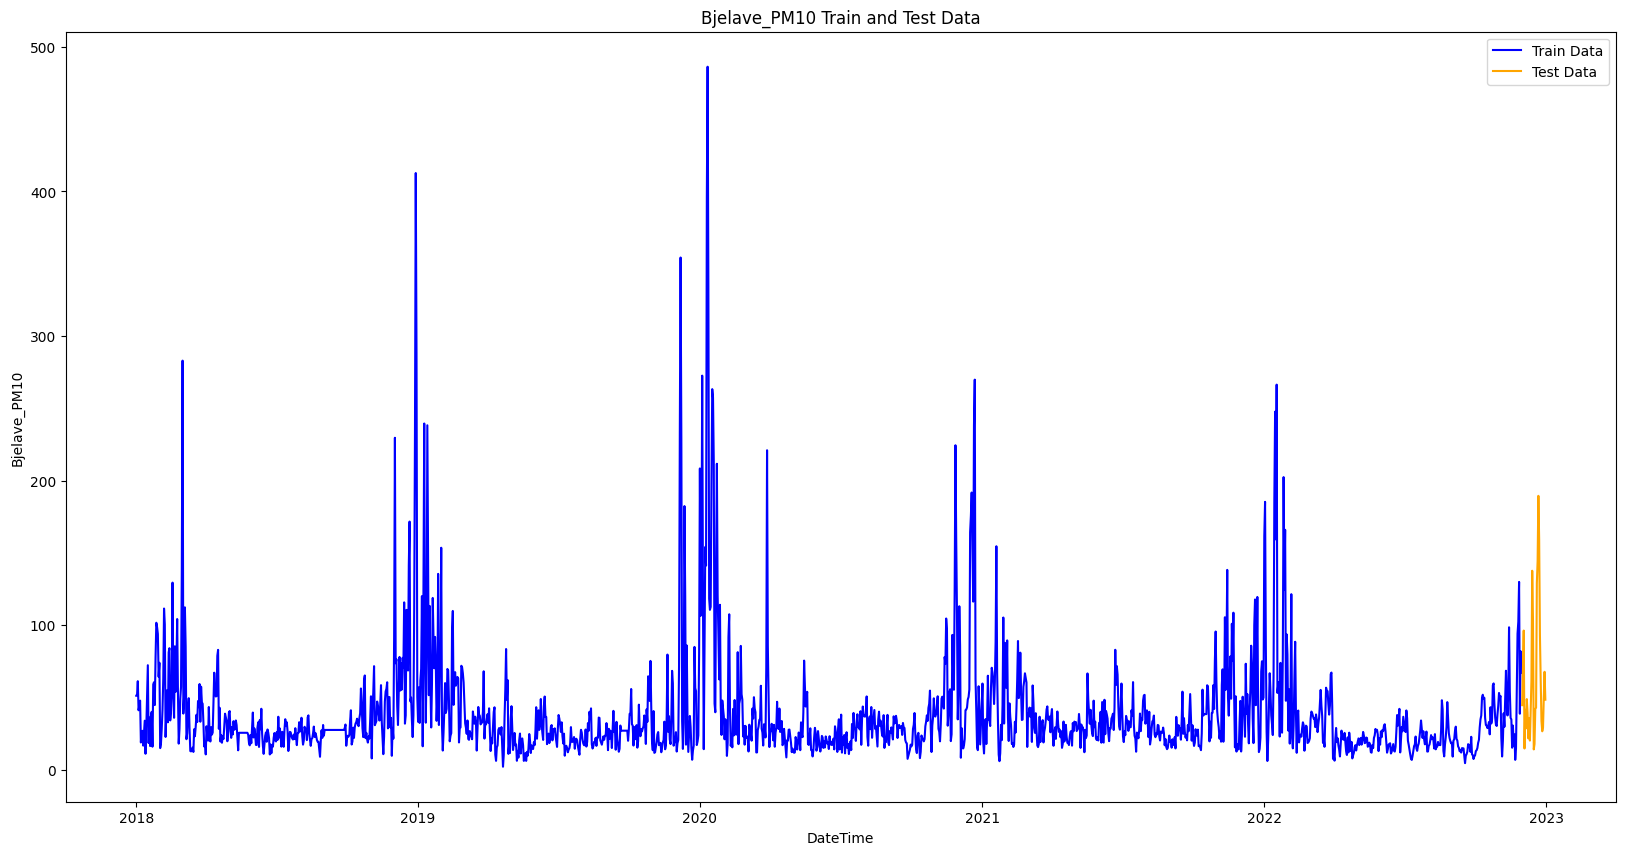

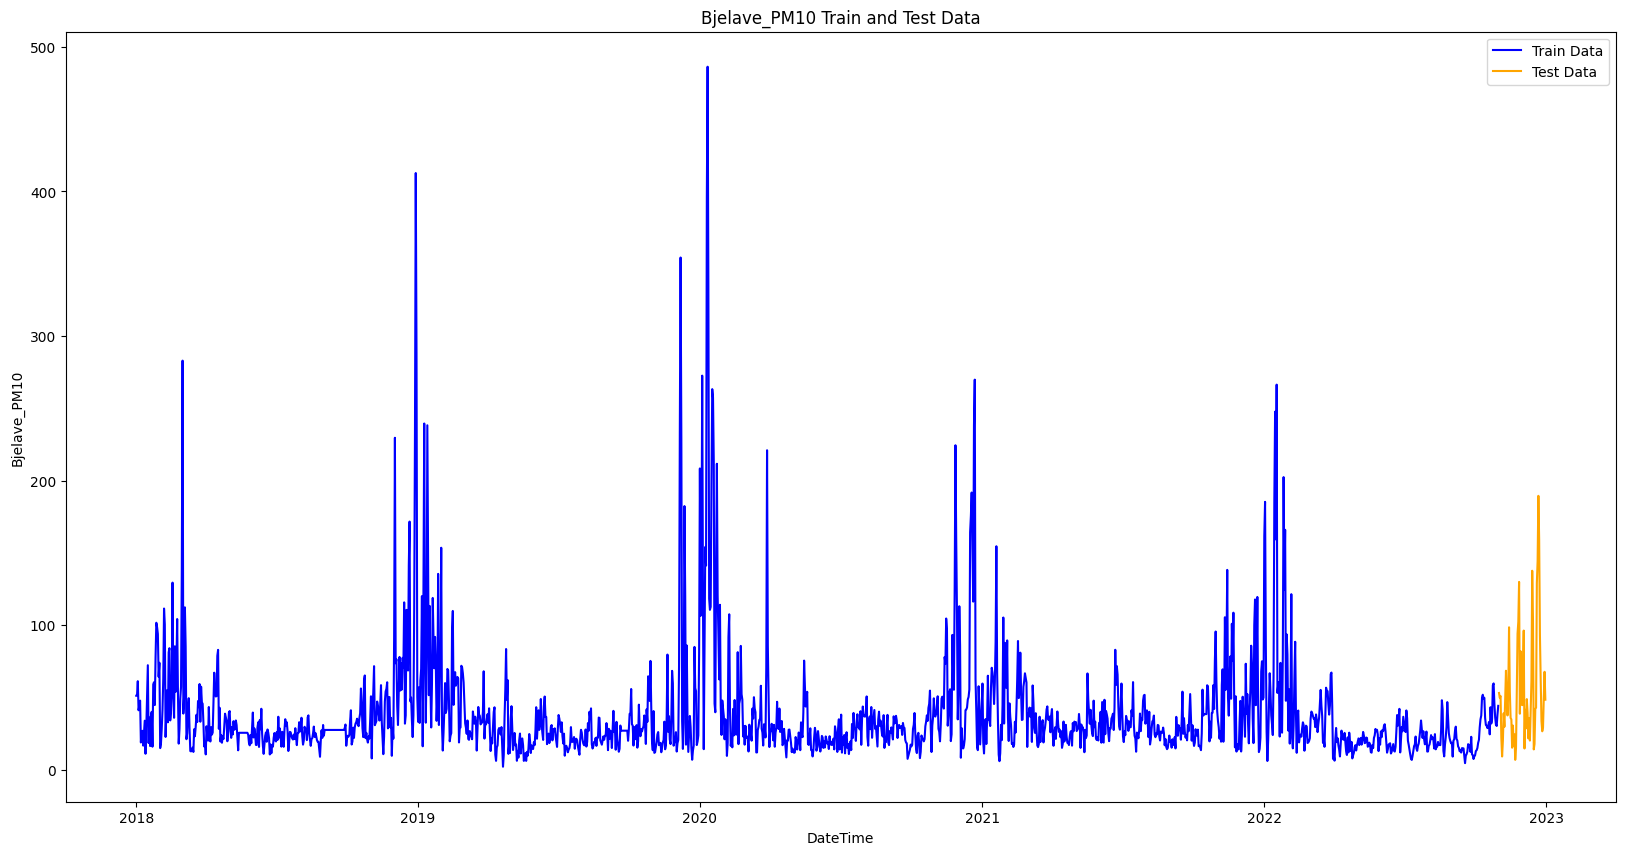

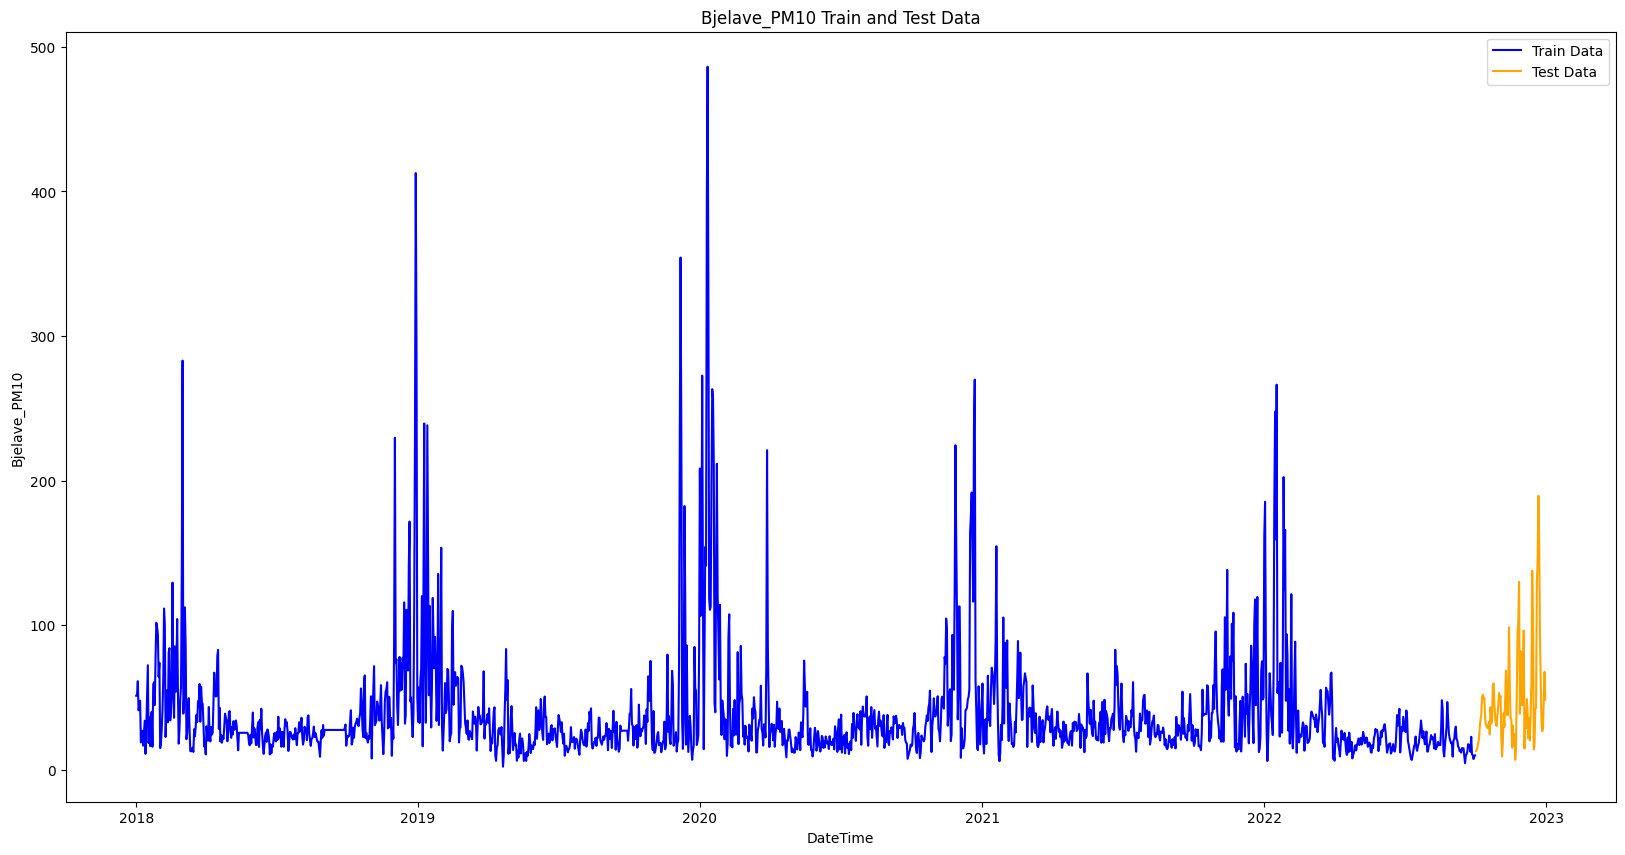

In [ ]:
plot_train_test_data(train_data_combined_ws_thirty, test_data_combined_ws_thirty, 'DateTime', 'Bjelave_PM10')
plot_train_test_data(train_data_combined_ws_sixty, test_data_combined_ws_sixty, 'DateTime', 'Bjelave_PM10')
plot_train_test_data(train_data_combined_ws_ninety, test_data_combined_ws_ninety, 'DateTime', 'Bjelave_PM10')

# Data scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

dates_train_data_combined_ws_thirty=train_data_combined_ws_thirty['DateTime']
dates_test_data_combined_ws_thirty=test_data_combined_ws_thirty['DateTime']

features_to_scale = train_data_combined_ws_thirty.drop(columns=['DateTime'])
scaler_combined_ws_thirty = MinMaxScaler(feature_range=(0, 1))
train_data_combined_ws_thirty_scaled = scaler_combined_ws_thirty.fit_transform(features_to_scale)

features_to_scale_test = test_data_combined_ws_thirty.drop(columns=['DateTime'])
test_data_combined_ws_thirty_scaled = scaler_combined_ws_thirty.transform(features_to_scale_test)

train_data_combined_ws_thirty_scaled_with_datetime = pd.DataFrame(train_data_combined_ws_thirty_scaled, columns=features_to_scale.columns)
test_data_combined_ws_thirty_scaled_with_datetime = pd.DataFrame(test_data_combined_ws_thirty_scaled, columns=features_to_scale.columns)

train_data_combined_ws_thirty_scaled_with_datetime['DateTime'] = train_data_combined_ws_thirty['DateTime'].values
test_data_combined_ws_thirty_scaled_with_datetime['DateTime'] = test_data_combined_ws_thirty['DateTime'].values

In [ ]:
dates_train_data_combined_ws_sixty=train_data_combined_ws_sixty['DateTime']
dates_test_data_combined_ws_sixty=test_data_combined_ws_sixty['DateTime']

features_to_scale = train_data_combined_ws_sixty.drop(columns=['DateTime'])
scaler_combined_ws_sixty = MinMaxScaler(feature_range=(0, 1))
train_data_combined_ws_sixty_scaled = scaler_combined_ws_sixty.fit_transform(features_to_scale)

features_to_scale_test = test_data_combined_ws_sixty.drop(columns=['DateTime'])
test_data_combined_ws_sixty_scaled = scaler_combined_ws_sixty.transform(features_to_scale_test)

train_data_combined_ws_sixty_scaled_with_datetime = pd.DataFrame(train_data_combined_ws_sixty_scaled, columns=features_to_scale.columns)
test_data_combined_ws_sixty_scaled_with_datetime = pd.DataFrame(test_data_combined_ws_sixty_scaled, columns=features_to_scale.columns)

train_data_combined_ws_sixty_scaled_with_datetime['DateTime'] = train_data_combined_ws_sixty['DateTime'].values
test_data_combined_ws_sixty_scaled_with_datetime['DateTime'] = test_data_combined_ws_sixty['DateTime'].values

In [ ]:
dates_train_data_combined_ws_ninety = train_data_combined_ws_ninety['DateTime']
dates_test_data_combined_ws_ninety = test_data_combined_ws_ninety['DateTime']

features_to_scale = train_data_combined_ws_ninety.drop(columns=['DateTime'])
scaler_combined_ws_ninety = MinMaxScaler(feature_range=(0, 1))
train_data_combined_ws_ninety_scaled = scaler_combined_ws_ninety.fit_transform(features_to_scale)

features_to_scale_test = test_data_combined_ws_ninety.drop(columns=['DateTime'])
test_data_combined_ws_ninety_scaled = scaler_combined_ws_ninety.transform(features_to_scale_test)

train_data_combined_ws_ninety_scaled_with_datetime = pd.DataFrame(train_data_combined_ws_ninety_scaled, columns=features_to_scale.columns)
test_data_combined_ws_ninety_scaled_with_datetime = pd.DataFrame(test_data_combined_ws_ninety_scaled, columns=features_to_scale.columns)

train_data_combined_ws_ninety_scaled_with_datetime['DateTime'] = train_data_combined_ws_ninety['DateTime'].values
test_data_combined_ws_ninety_scaled_with_datetime['DateTime'] = test_data_combined_ws_ninety['DateTime'].values

In [ ]:
# train_data_aqi_ws_thirty      # test_data_aqi_ws_thirty
# train_data_aqi_ws_sixty       # test_data_aqi_ws_sixty
# train_data_aqi_ws_ninety      # test_data_aqi_ws_ninety

In [ ]:
'''
from sklearn.preprocessing import MinMaxScaler
dates_train_data_aqi_ws_thirty=train_data_aqi_ws_thirty['DateTime']
dates_test_data_aqi_ws_thirty=test_data_aqi_ws_thirty['DateTime']

features_to_scale = train_data_aqi_ws_thirty.drop(columns=['DateTime'])
scaler_aqi_ws_thirty = MinMaxScaler(feature_range=(0, 1))
train_data_aqi_ws_thirty_scaled = scaler_aqi_ws_thirty.fit_transform(features_to_scale)

features_to_scale_test = test_data_aqi_ws_thirty.drop(columns=['DateTime'])
test_data_aqi_ws_thirty_scaled = scaler_aqi_ws_thirty.transform(features_to_scale_test)
'''

"\nfrom sklearn.preprocessing import MinMaxScaler\ndates_train_data_aqi_ws_thirty=train_data_aqi_ws_thirty['DateTime']\ndates_test_data_aqi_ws_thirty=test_data_aqi_ws_thirty['DateTime']\n\nfeatures_to_scale = train_data_aqi_ws_thirty.drop(columns=['DateTime'])\nscaler_aqi_ws_thirty = MinMaxScaler(feature_range=(0, 1))\ntrain_data_aqi_ws_thirty_scaled = scaler_aqi_ws_thirty.fit_transform(features_to_scale)\n\nfeatures_to_scale_test = test_data_aqi_ws_thirty.drop(columns=['DateTime'])\ntest_data_aqi_ws_thirty_scaled = scaler_aqi_ws_thirty.transform(features_to_scale_test)\n"

In [ ]:
print(train_data_aqi_ws_thirty.columns)
#print(features_to_scale.columns)

Index(['DateTime', 'AQI'], dtype='object')


In [ ]:
"""
train_data_aqi_ws_thirty_scaled_with_datetime = pd.DataFrame(train_data_aqi_ws_thirty_scaled, columns=features_to_scale.columns)
test_data_aqi_ws_thirty_scaled_with_datetime = pd.DataFrame(test_data_aqi_ws_thirty_scaled, columns=features_to_scale.columns)

train_data_aqi_ws_thirty_scaled_with_datetime['DateTime'] = train_data_aqi_ws_thirty['DateTime'].values
test_data_aqi_ws_thirty_scaled_with_datetime['DateTime'] = test_data_aqi_ws_thirty['DateTime'].values
"""

"\ntrain_data_aqi_ws_thirty_scaled_with_datetime = pd.DataFrame(train_data_aqi_ws_thirty_scaled, columns=features_to_scale.columns)\ntest_data_aqi_ws_thirty_scaled_with_datetime = pd.DataFrame(test_data_aqi_ws_thirty_scaled, columns=features_to_scale.columns)\n\ntrain_data_aqi_ws_thirty_scaled_with_datetime['DateTime'] = train_data_aqi_ws_thirty['DateTime'].values\ntest_data_aqi_ws_thirty_scaled_with_datetime['DateTime'] = test_data_aqi_ws_thirty['DateTime'].values\n"

In [ ]:
# train_data_aqi_ws_sixty       # test_data_aqi_ws_sixty
"""
dates_train_data_aqi_ws_sixty=train_data_aqi_ws_sixty['DateTime']
dates_test_data_aqi_ws_sixty=test_data_aqi_ws_sixty['DateTime']

features_to_scale = train_data_aqi_ws_sixty.drop(columns=['DateTime'])
scaler_aqi_ws_sixty = MinMaxScaler(feature_range=(0, 1))
train_data_aqi_ws_sixty_scaled = scaler_aqi_ws_sixty.fit_transform(features_to_scale)

features_to_scale_test = test_data_aqi_ws_sixty.drop(columns=['DateTime'])
test_data_aqi_ws_sixty_scaled = scaler_aqi_ws_sixty.transform(features_to_scale_test)


train_data_aqi_ws_sixty_scaled_with_datetime = pd.DataFrame(train_data_aqi_ws_sixty_scaled, columns=features_to_scale.columns)
test_data_aqi_ws_sixty_scaled_with_datetime = pd.DataFrame(test_data_aqi_ws_sixty_scaled, columns=features_to_scale.columns)

train_data_aqi_ws_sixty_scaled_with_datetime['DateTime'] = train_data_aqi_ws_sixty['DateTime'].values
test_data_aqi_ws_sixty_scaled_with_datetime['DateTime'] = test_data_aqi_ws_sixty['DateTime'].values
"""

"\ndates_train_data_aqi_ws_sixty=train_data_aqi_ws_sixty['DateTime']\ndates_test_data_aqi_ws_sixty=test_data_aqi_ws_sixty['DateTime']\n\nfeatures_to_scale = train_data_aqi_ws_sixty.drop(columns=['DateTime'])\nscaler_aqi_ws_sixty = MinMaxScaler(feature_range=(0, 1))\ntrain_data_aqi_ws_sixty_scaled = scaler_aqi_ws_sixty.fit_transform(features_to_scale)\n\nfeatures_to_scale_test = test_data_aqi_ws_sixty.drop(columns=['DateTime'])\ntest_data_aqi_ws_sixty_scaled = scaler_aqi_ws_sixty.transform(features_to_scale_test)\n\n\ntrain_data_aqi_ws_sixty_scaled_with_datetime = pd.DataFrame(train_data_aqi_ws_sixty_scaled, columns=features_to_scale.columns)\ntest_data_aqi_ws_sixty_scaled_with_datetime = pd.DataFrame(test_data_aqi_ws_sixty_scaled, columns=features_to_scale.columns)\n\ntrain_data_aqi_ws_sixty_scaled_with_datetime['DateTime'] = train_data_aqi_ws_sixty['DateTime'].values\ntest_data_aqi_ws_sixty_scaled_with_datetime['DateTime'] = test_data_aqi_ws_sixty['DateTime'].values\n"

In [ ]:
# train_data_aqi_ws_ninety      # test_data_aqi_ws_ninety
"""
dates_train_data_aqi_ws_ninety=train_data_aqi_ws_ninety['DateTime']
dates_test_data_aqi_ws_ninety=test_data_aqi_ws_ninety['DateTime']

features_to_scale = train_data_aqi_ws_ninety.drop(columns=['DateTime'])
scaler_aqi_ws_ninety = MinMaxScaler(feature_range=(0, 1))
train_data_aqi_ws_ninety_scaled = scaler_aqi_ws_ninety.fit_transform(features_to_scale)

features_to_scale_test = test_data_aqi_ws_ninety.drop(columns=['DateTime'])
test_data_aqi_ws_ninety_scaled = scaler_aqi_ws_ninety.transform(features_to_scale_test)

train_data_aqi_ws_ninety_scaled_with_datetime = pd.DataFrame(train_data_aqi_ws_ninety_scaled, columns=features_to_scale.columns)
test_data_aqi_ws_ninety_scaled_with_datetime = pd.DataFrame(test_data_aqi_ws_ninety_scaled, columns=features_to_scale.columns)

train_data_aqi_ws_ninety_scaled_with_datetime['DateTime'] = train_data_aqi_ws_ninety['DateTime'].values
test_data_aqi_ws_ninety_scaled_with_datetime['DateTime'] = test_data_aqi_ws_ninety['DateTime'].values
"""

"\ndates_train_data_aqi_ws_ninety=train_data_aqi_ws_ninety['DateTime']\ndates_test_data_aqi_ws_ninety=test_data_aqi_ws_ninety['DateTime']\n\nfeatures_to_scale = train_data_aqi_ws_ninety.drop(columns=['DateTime'])\nscaler_aqi_ws_ninety = MinMaxScaler(feature_range=(0, 1))\ntrain_data_aqi_ws_ninety_scaled = scaler_aqi_ws_ninety.fit_transform(features_to_scale)\n\nfeatures_to_scale_test = test_data_aqi_ws_ninety.drop(columns=['DateTime'])\ntest_data_aqi_ws_ninety_scaled = scaler_aqi_ws_ninety.transform(features_to_scale_test)\n\ntrain_data_aqi_ws_ninety_scaled_with_datetime = pd.DataFrame(train_data_aqi_ws_ninety_scaled, columns=features_to_scale.columns)\ntest_data_aqi_ws_ninety_scaled_with_datetime = pd.DataFrame(test_data_aqi_ws_ninety_scaled, columns=features_to_scale.columns)\n\ntrain_data_aqi_ws_ninety_scaled_with_datetime['DateTime'] = train_data_aqi_ws_ninety['DateTime'].values\ntest_data_aqi_ws_ninety_scaled_with_datetime['DateTime'] = test_data_aqi_ws_ninety['DateTime'].values\n

In [ ]:
"""
train_data_aqi_ws_thirty_scaled_with_datetime = train_data_aqi_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in train_data_aqi_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]
train_data_aqi_ws_sixty_scaled_with_datetime = train_data_aqi_ws_sixty_scaled_with_datetime[['DateTime'] + [col for col in train_data_aqi_ws_sixty_scaled_with_datetime.columns if col != 'DateTime']]
train_data_aqi_ws_ninety_scaled_with_datetime = train_data_aqi_ws_ninety_scaled_with_datetime[['DateTime'] + [col for col in train_data_aqi_ws_ninety_scaled_with_datetime.columns if col != 'DateTime']]

test_data_aqi_ws_thirty_scaled_with_datetime = test_data_aqi_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in test_data_aqi_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]
test_data_aqi_ws_sixty_scaled_with_datetime = test_data_aqi_ws_sixty_scaled_with_datetime[['DateTime'] + [col for col in test_data_aqi_ws_sixty_scaled_with_datetime.columns if col != 'DateTime']]
test_data_aqi_ws_ninety_scaled_with_datetime = test_data_aqi_ws_ninety_scaled_with_datetime[['DateTime'] + [col for col in test_data_aqi_ws_ninety_scaled_with_datetime.columns if col != 'DateTime']]
"""

"\ntrain_data_aqi_ws_thirty_scaled_with_datetime = train_data_aqi_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in train_data_aqi_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]\ntrain_data_aqi_ws_sixty_scaled_with_datetime = train_data_aqi_ws_sixty_scaled_with_datetime[['DateTime'] + [col for col in train_data_aqi_ws_sixty_scaled_with_datetime.columns if col != 'DateTime']]\ntrain_data_aqi_ws_ninety_scaled_with_datetime = train_data_aqi_ws_ninety_scaled_with_datetime[['DateTime'] + [col for col in train_data_aqi_ws_ninety_scaled_with_datetime.columns if col != 'DateTime']]\n\ntest_data_aqi_ws_thirty_scaled_with_datetime = test_data_aqi_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in test_data_aqi_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]\ntest_data_aqi_ws_sixty_scaled_with_datetime = test_data_aqi_ws_sixty_scaled_with_datetime[['DateTime'] + [col for col in test_data_aqi_ws_sixty_scaled_with_datetime.columns if col != 'DateT

In [ ]:
# train_data_combined_ws_thirty # test_data_combined_ws_thirty
# train_data_combined_ws_sixty  # test_data_combined_ws_sixty
# train_data_combined_ws_ninety # test_data_combined_ws_ninety

In [ ]:
"""
train_data_combined_ws_thirty_scaled_with_datetime = train_data_combined_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in train_data_combined_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]
train_data_combined_ws_sixty_scaled_with_datetime = train_data_combined_ws_sixty_scaled_with_datetime[['DateTime'] + [col for col in train_data_combined_ws_sixty_scaled_with_datetime.columns if col != 'DateTime']]
train_data_combined_ws_ninety_scaled_with_datetime = train_data_combined_ws_ninety_scaled_with_datetime[['DateTime'] + [col for col in train_data_combined_ws_ninety_scaled_with_datetime.columns if col != 'DateTime']] #test
test_data_combined_ws_thirty_scaled_with_datetime = test_data_combined_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in test_data_combined_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]
test_data_combined_ws_sixty_scaled_with_datetime = test_data_combined_ws_sixty_scaled_with_datetime[['DateTime'] + [col for col in test_data_combined_ws_sixty_scaled_with_datetime.columns if col != 'DateTime']]
test_data_combined_ws_ninety_scaled_with_datetime = test_data_combined_ws_ninety_scaled_with_datetime[['DateTime'] + [col for col in test_data_combined_ws_ninety_scaled_with_datetime.columns if col != 'DateTime']]
"""

"\ntrain_data_combined_ws_thirty_scaled_with_datetime = train_data_combined_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in train_data_combined_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]\ntrain_data_combined_ws_sixty_scaled_with_datetime = train_data_combined_ws_sixty_scaled_with_datetime[['DateTime'] + [col for col in train_data_combined_ws_sixty_scaled_with_datetime.columns if col != 'DateTime']]\ntrain_data_combined_ws_ninety_scaled_with_datetime = train_data_combined_ws_ninety_scaled_with_datetime[['DateTime'] + [col for col in train_data_combined_ws_ninety_scaled_with_datetime.columns if col != 'DateTime']] #test\ntest_data_combined_ws_thirty_scaled_with_datetime = test_data_combined_ws_thirty_scaled_with_datetime[['DateTime'] + [col for col in test_data_combined_ws_thirty_scaled_with_datetime.columns if col != 'DateTime']]\ntest_data_combined_ws_sixty_scaled_with_datetime = test_data_combined_ws_sixty_scaled_with_datetime[['DateTime'] + [col for c

# Univariate Time Series Forecasting using FBProphet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def train_prophet(train_data):
    model = Prophet()
    model.fit(train_data)
    return model

def predict_prophet(model, test_data):
    forecast = model.predict(test_data)
    return forecast

def calculate_metrics(test, forecast, true_label='y', predicted_label='yhat'):
    mae = mean_absolute_error(test[true_label], forecast[predicted_label])
    mse = mean_squared_error(test[true_label], forecast[predicted_label])
    rmse = sqrt(mse)
    r2 = r2_score(test[true_label], forecast[predicted_label])
    return rmse, mae, r2

def plot_boxplot(prediction_data, test_data):
    error = abs(prediction_data - test_data)
    # plot boxplot of error
    plt.figure(figsize=(10,6))
    plt.boxplot(error)
    plt.show()

In [ ]:
train_data_aqi_ws_thirty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
test_data_aqi_ws_thirty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

train_data_aqi_ws_sixty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
test_data_aqi_ws_sixty.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

train_data_aqi_ws_ninety.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
test_data_aqi_ws_ninety.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

In [ ]:
#train_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
#test_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

#train_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
#test_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

#train_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)
#test_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'DateTime': 'ds', 'AQI': 'y'}, inplace=True)

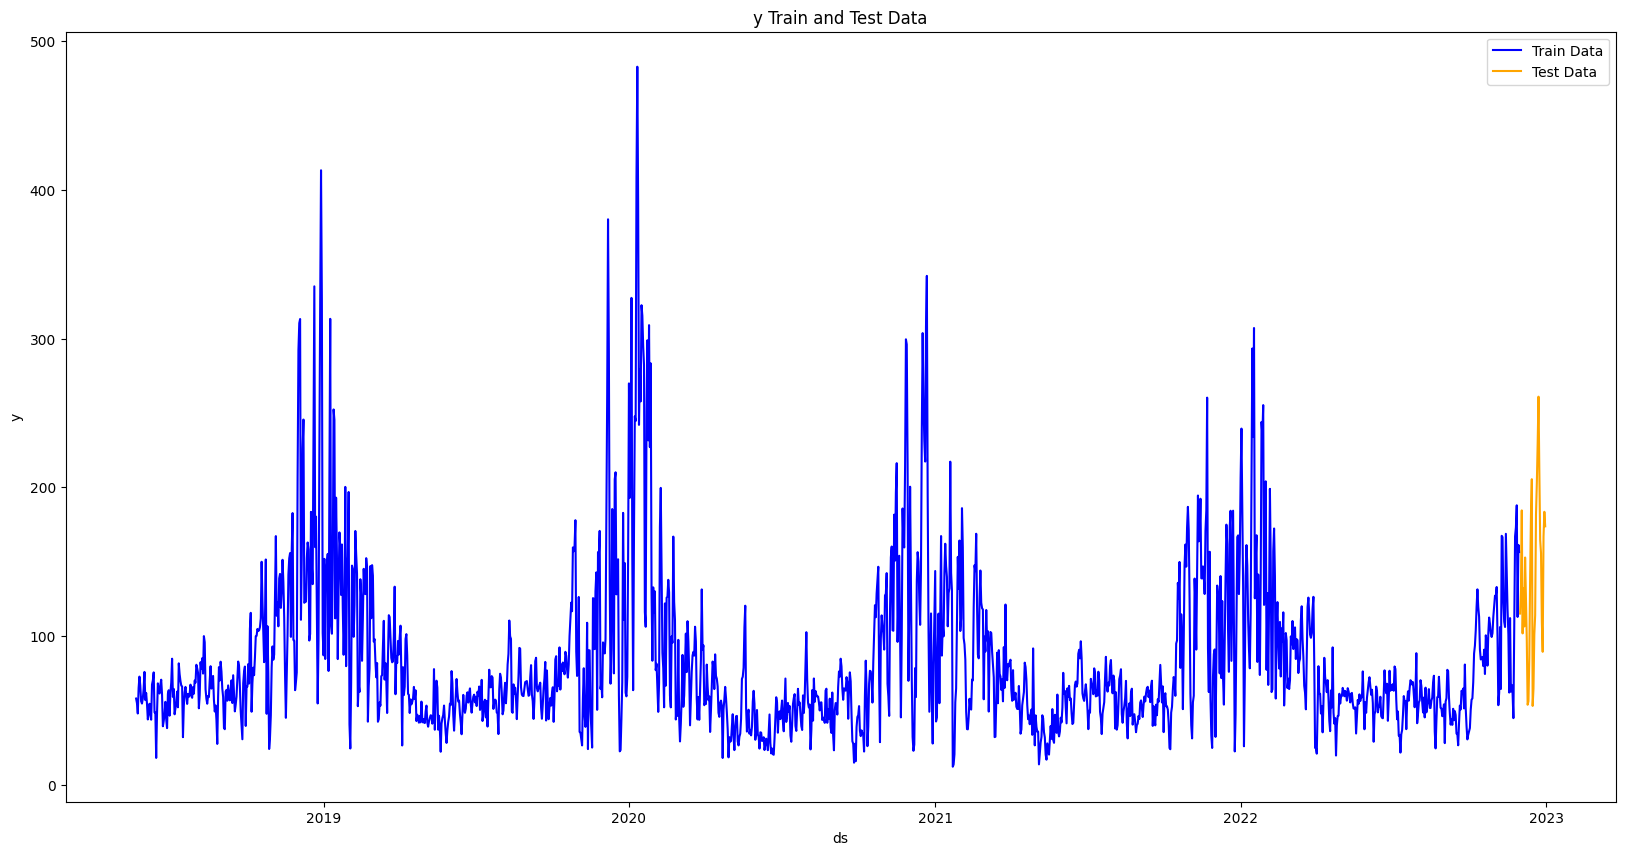

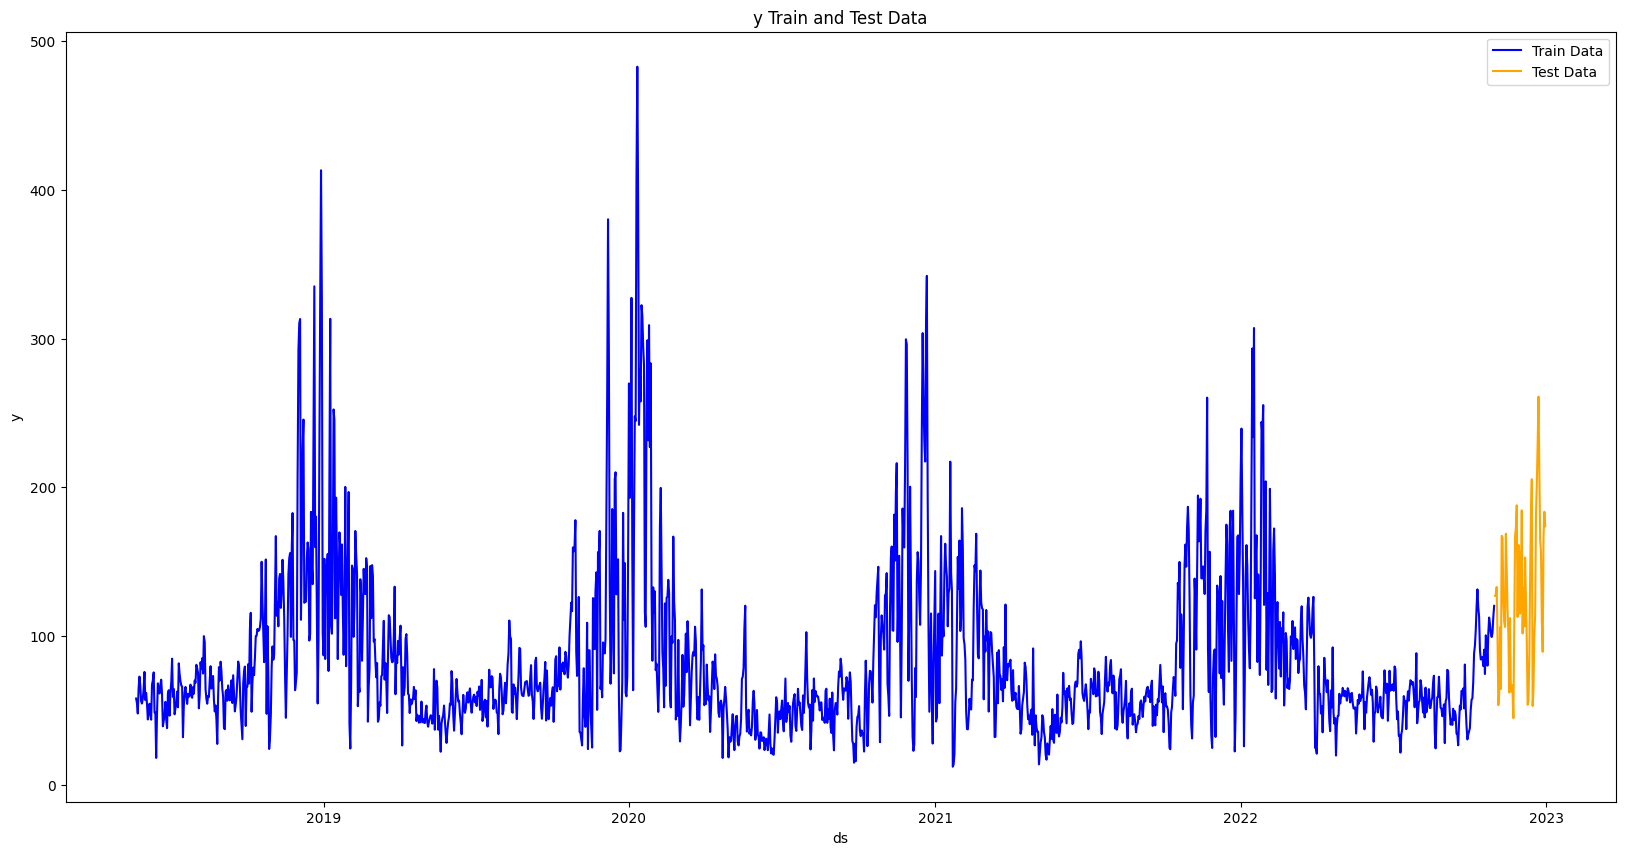

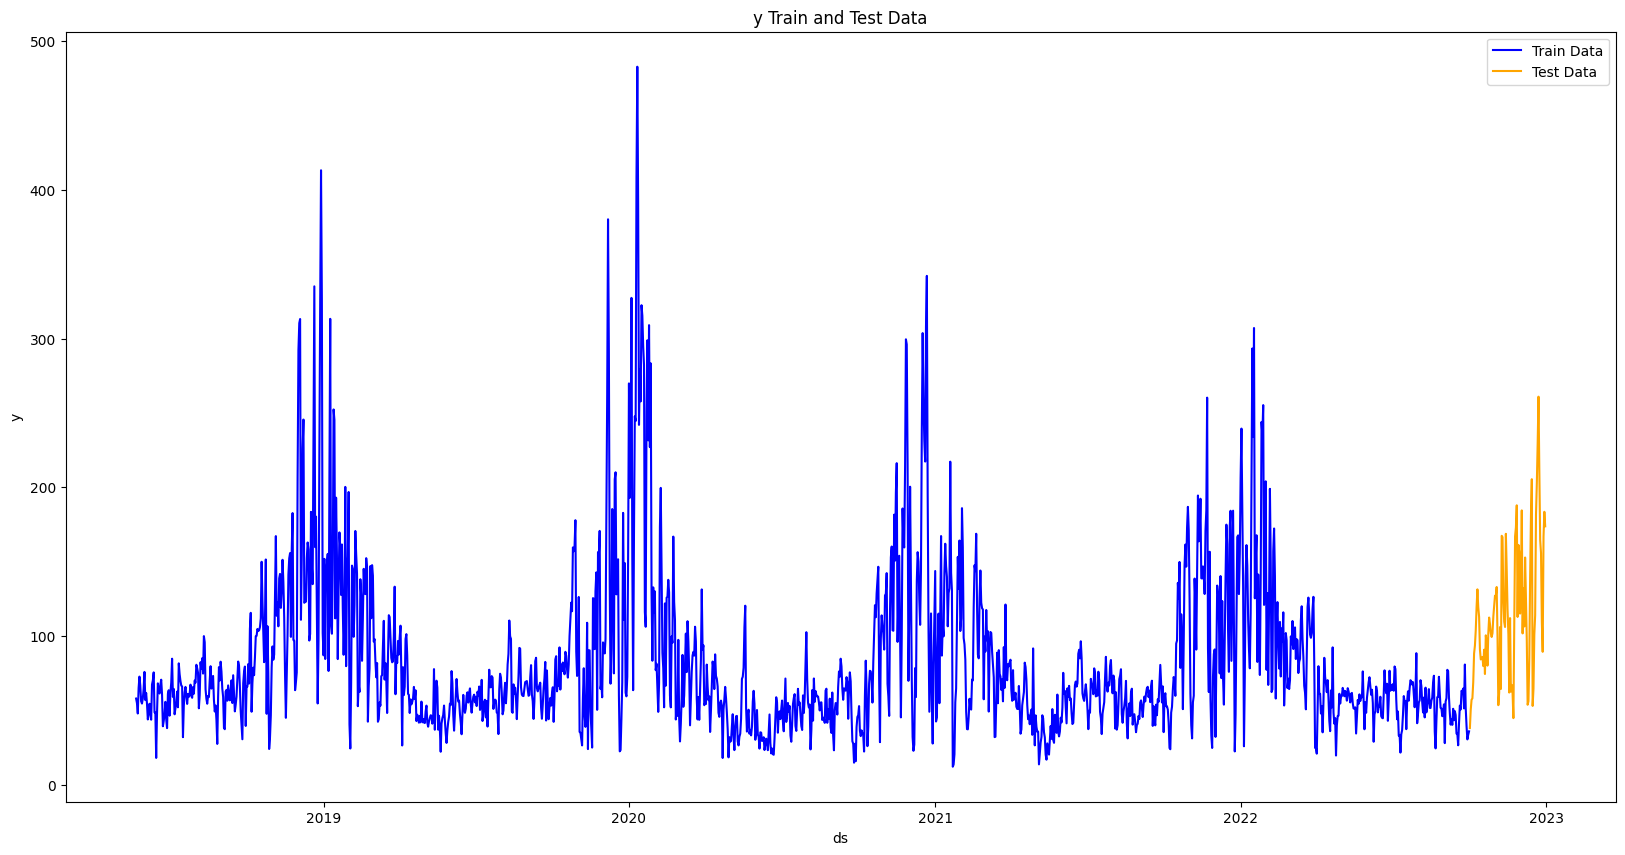

In [ ]:
plot_train_test_data(train_data_aqi_ws_thirty, test_data_aqi_ws_thirty, 'ds', 'y')
plot_train_test_data(train_data_aqi_ws_sixty, test_data_aqi_ws_sixty, 'ds', 'y')
plot_train_test_data(train_data_aqi_ws_ninety, test_data_aqi_ws_ninety, 'ds', 'y')

In [ ]:
#plot_train_test_data(train_data_aqi_ws_thirty_scaled_with_datetime, test_data_aqi_ws_thirty_scaled_with_datetime, 'ds', 'y')
#plot_train_test_data(train_data_aqi_ws_sixty_scaled_with_datetime, test_data_aqi_ws_sixty_scaled_with_datetime, 'ds', 'y')
#plot_train_test_data(train_data_aqi_ws_ninety_scaled_with_datetime, test_data_aqi_ws_ninety_scaled_with_datetime, 'ds', 'y')

In [ ]:
model_aqi_ws_thirty = train_prophet(train_data_aqi_ws_thirty)
forecast_aqi_ws_thirty = predict_prophet(model_aqi_ws_thirty, test_data_aqi_ws_thirty)
rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_thirty, forecast_aqi_ws_thirty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/cskx2iww.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/m5cfxjy6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48782', 'data', 'file=/tmp/tmpag6a5v30/cskx2iww.json', 'init=/tmp/tmpag6a5v30/m5cfxjy6.json', 'output', 'file=/tmp/tmpag6a5v30/prophet_modelm6pfo7e0/prophet_model-20250729172803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 53.679
MAE: 45.150
R2: -0.016


In [ ]:
#model_aqi_ws_thirty_scaled = train_prophet(train_data_aqi_ws_thirty_scaled_with_datetime)
#forecast_aqi_ws_thirty_scaled = predict_prophet(model_aqi_ws_thirty_scaled, test_data_aqi_ws_thirty_scaled_with_datetime)
#forecast_aqi_ws_thirty_inverse_transformed=scaler_aqi_ws_thirty.inverse_transform(forecast_aqi_ws_thirty_scaled.drop(columns=['ds'], inplace=False))
#forecast_aqi_ws_thirty_inverse_transformed=pd.DataFrame(forecast_aqi_ws_thirty_inverse_transformed, columns=forecast_aqi_ws_thirty_scaled.drop(columns=['ds'], inplace=False).columns)
#test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed=scaler_aqi_ws_thirty.inverse_transform(test_data_aqi_ws_thirty_scaled_with_datetime.drop(columns=['ds'], inplace=False))
#test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed=pd.DataFrame(test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed, columns=test_data_aqi_ws_thirty_scaled_with_datetime.drop(columns=['ds'], inplace=False).columns)

#rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_thirty_scaled_with_datetime_inverse_transformed, forecast_aqi_ws_thirty_inverse_transformed)

#print('RMSE: %.3f' % rmse)
#print('MAE: %.3f' % mae)
#print('R2: %.3f' % r2)

In [ ]:
forecast_aqi_ws_thirty['yhat'].tail(1)

30    154.700941
Name: yhat, dtype: float64

In [ ]:
model_aqi_ws_sixty = train_prophet(train_data_aqi_ws_sixty)
forecast_aqi_ws_sixty = predict_prophet(model_aqi_ws_sixty, test_data_aqi_ws_sixty)
rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_sixty, forecast_aqi_ws_sixty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/994e21e1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/8vd4j4_i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45588', 'data', 'file=/tmp/tmpag6a5v30/994e21e1.json', 'init=/tmp/tmpag6a5v30/8vd4j4_i.json', 'output', 'file=/tmp/tmpag6a5v30/prophet_modelk6h89c10/prophet_model-20250729172803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 47.338
MAE: 39.186
R2: 0.074


In [ ]:
#model_aqi_ws_sixty_scaled = train_prophet(train_data_aqi_ws_sixty_scaled_with_datetime)
#forecast_aqi_ws_sixty_scaled = predict_prophet(model_aqi_ws_sixty_scaled, test_data_aqi_ws_sixty_scaled_with_datetime)

#forecast_aqi_ws_sixty_inverse_transformed=scaler_aqi_ws_sixty.inverse_transform(forecast_aqi_ws_sixty_scaled.drop(columns=['ds'], inplace=False))
#forecast_aqi_ws_sixty_inverse_transformed=pd.DataFrame(forecast_aqi_ws_sixty_inverse_transformed, columns=forecast_aqi_ws_sixty_scaled.drop(columns=['ds'], inplace=False).columns)
#test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed=scaler_aqi_ws_sixty.inverse_transform(test_data_aqi_ws_sixty_scaled_with_datetime.drop(columns=['ds'], inplace=False))
#test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed=pd.DataFrame(test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed, columns=test_data_aqi_ws_sixty_scaled_with_datetime.drop(columns=['ds'], inplace=False).columns)

#rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_sixty_scaled_with_datetime_inverse_transformed, forecast_aqi_ws_sixty_inverse_transformed)

#print('RMSE: %.3f' % rmse)
#print('MAE: %.3f' % mae)
#print('R2: %.3f' % r2)

In [ ]:
model_aqi_ws_ninety = train_prophet(train_data_aqi_ws_ninety)
forecast_aqi_ws_ninety = predict_prophet(model_aqi_ws_ninety, test_data_aqi_ws_ninety)
rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_ninety, forecast_aqi_ws_ninety)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/hwzzlhon.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/inyn_c26.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26162', 'data', 'file=/tmp/tmpag6a5v30/hwzzlhon.json', 'init=/tmp/tmpag6a5v30/inyn_c26.json', 'output', 'file=/tmp/tmpag6a5v30/prophet_model_tq9uk6r/prophet_model-20250729172803.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 40.866
MAE: 31.299
R2: 0.188


In [ ]:
#model_aqi_ws_ninety_scaled = train_prophet(train_data_aqi_ws_ninety_scaled_with_datetime)
#forecast_aqi_ws_ninety_scaled = predict_prophet(model_aqi_ws_ninety_scaled, test_data_aqi_ws_ninety_scaled_with_datetime)

#forecast_aqi_ws_ninety_inverse_transformed=scaler_aqi_ws_ninety.inverse_transform(forecast_aqi_ws_ninety_scaled.drop(columns=['ds'], inplace=False))
#forecast_aqi_ws_ninety_inverse_transformed=pd.DataFrame(forecast_aqi_ws_ninety_inverse_transformed, columns=forecast_aqi_ws_ninety_scaled.drop(columns=['ds'], inplace=False).columns)

#test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed=scaler_aqi_ws_ninety.inverse_transform(test_data_aqi_ws_ninety_scaled_with_datetime.drop(columns=['ds'], inplace=False))
#test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed=pd.DataFrame(test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed, columns=test_data_aqi_ws_ninety_scaled_with_datetime.drop(columns=['ds'], inplace=False).columns)

#rmse, mae, r2 = calculate_metrics(test_data_aqi_ws_ninety_scaled_with_datetime_inverse_transformed, forecast_aqi_ws_ninety_inverse_transformed)

#print('RMSE: %.3f' % rmse)
#print('MAE: %.3f' % mae)
#print('R2: %.3f' % r2)

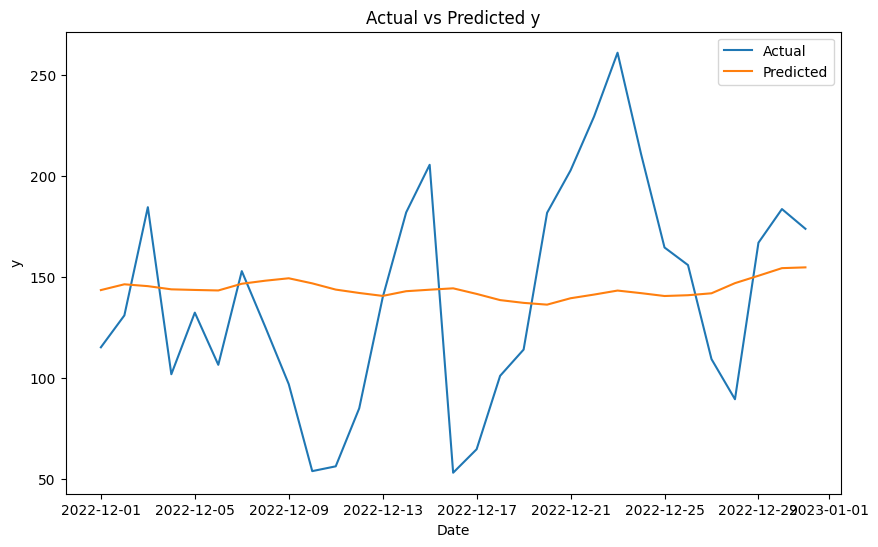

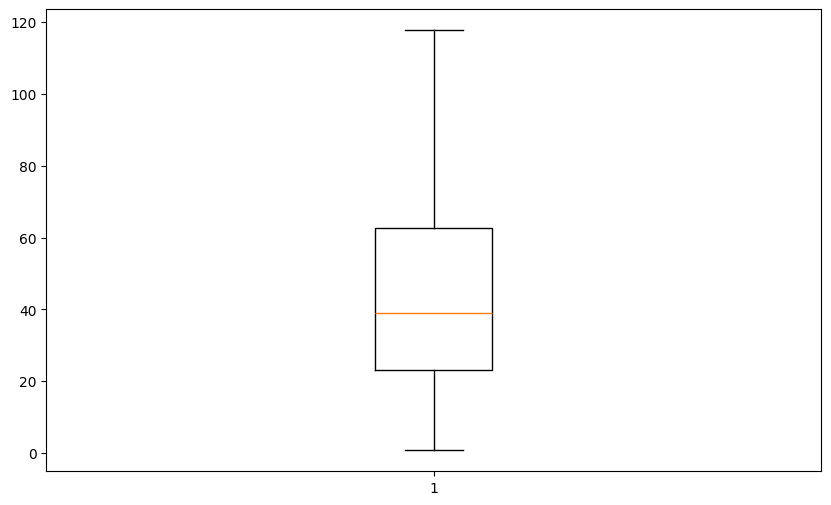

In [ ]:
plot_forecast(test_data_aqi_ws_thirty, forecast_aqi_ws_thirty)
plot_boxplot(forecast_aqi_ws_thirty['yhat'].values.reshape(-1,1), test_data_aqi_ws_thirty['y'].values.reshape(-1,1))
#plot_forecast(test_data_aqi_ws_thirty, model_aqi_ws_thirty)
#plot_boxplot(model_aqi_ws_thirty['yhat'].values.reshape(-1,1), test_data_aqi_ws_thirty['y'].values.reshape(-1,1))

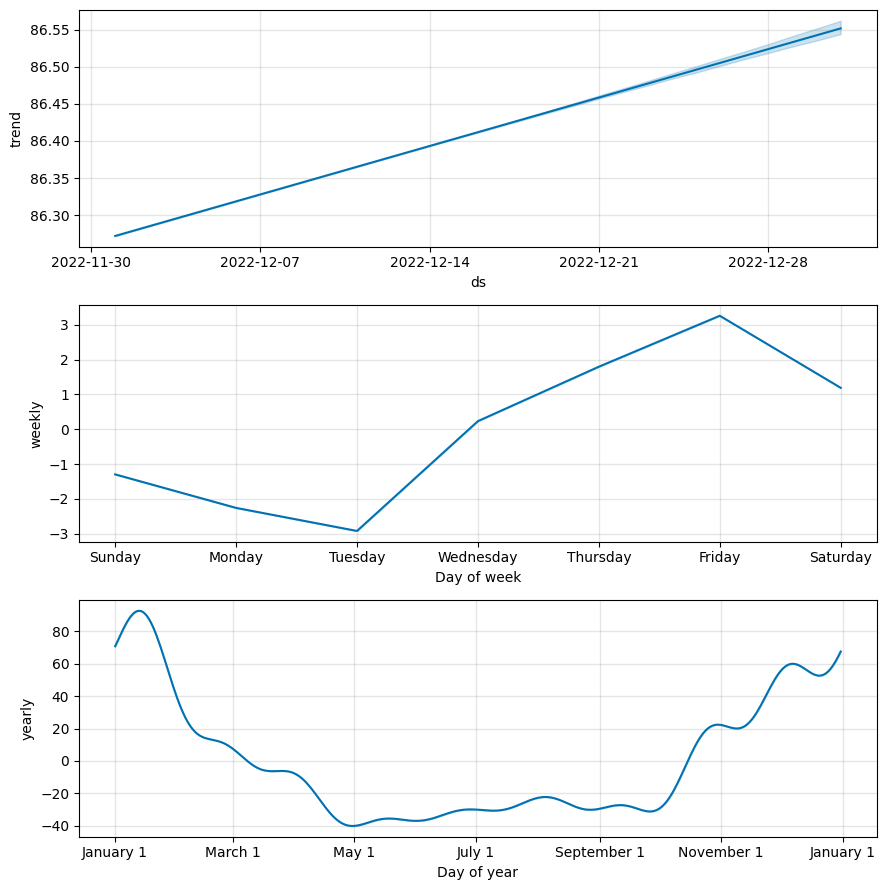

In [ ]:
# Visualizing the components of the forecast, such as the trend, yearly seasonality, and weekly seasonality. This can be done using the 'plot_components' method of the Prophet model
model_aqi_ws_thirty.plot_components(forecast_aqi_ws_thirty)
plt.show()

In [ ]:
print(forecast_aqi_ws_thirty[['ds', 'yhat', 'trend', 'yearly', 'weekly']].head(2))

          ds        yhat      trend     yearly    weekly
0 2022-12-01  143.457093  86.271794  55.387452  1.797846
1 2022-12-02  146.318489  86.281132  56.774277  3.263080


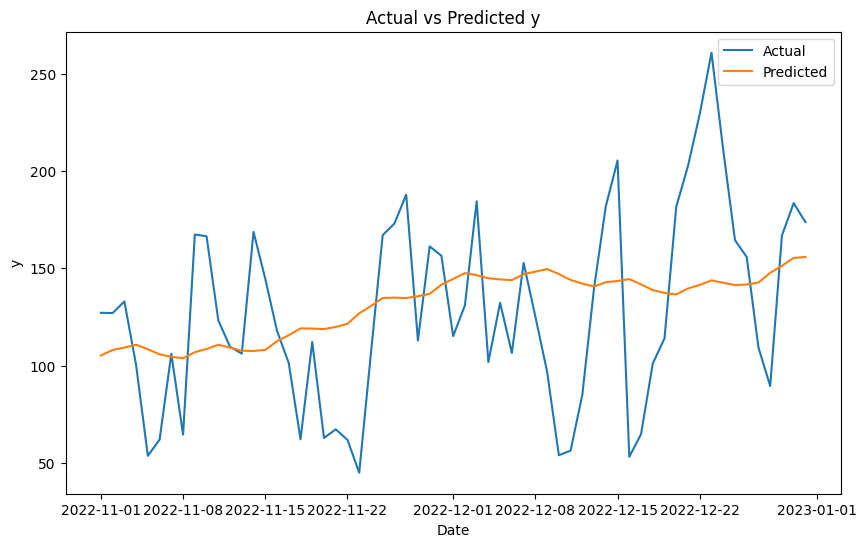

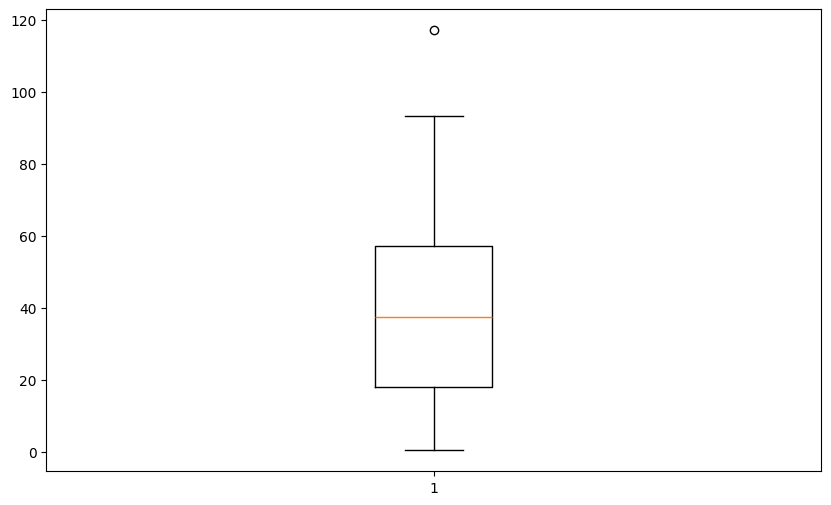

In [ ]:
plot_forecast(test_data_aqi_ws_sixty, forecast_aqi_ws_sixty)
plot_boxplot(forecast_aqi_ws_sixty['yhat'].values.reshape(-1,1), test_data_aqi_ws_sixty['y'].values.reshape(-1,1))

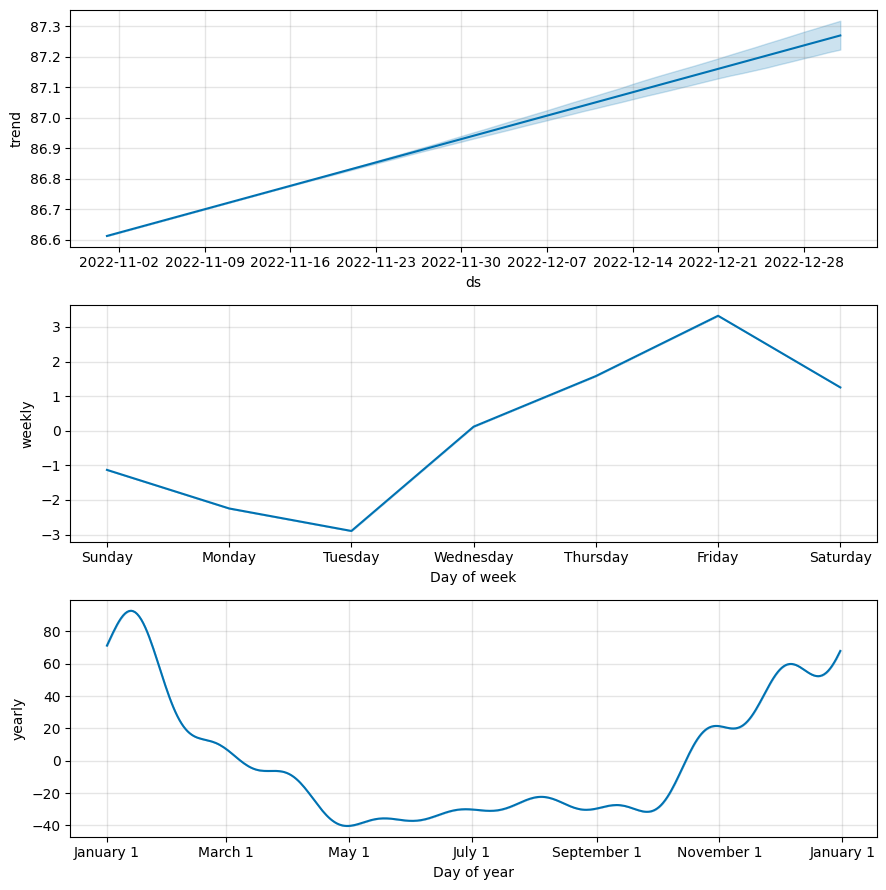

In [ ]:
model_aqi_ws_sixty.plot_components(forecast_aqi_ws_sixty)
plt.show()

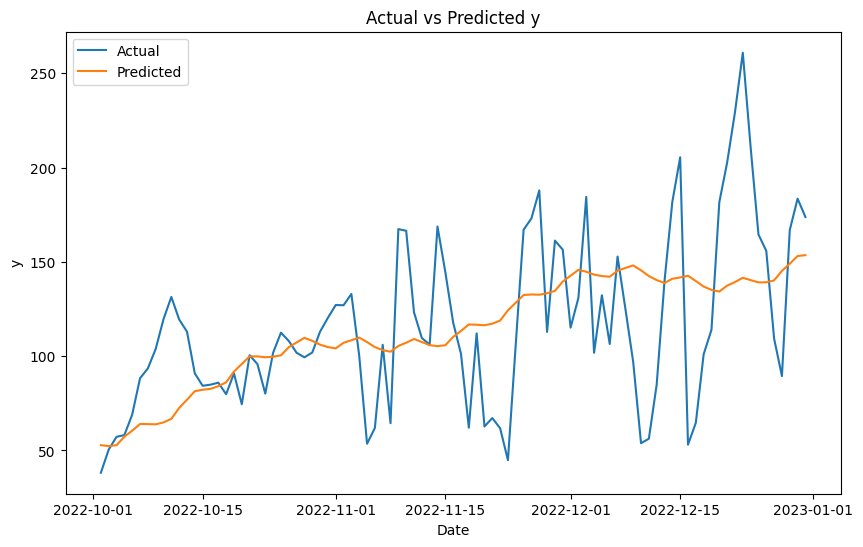

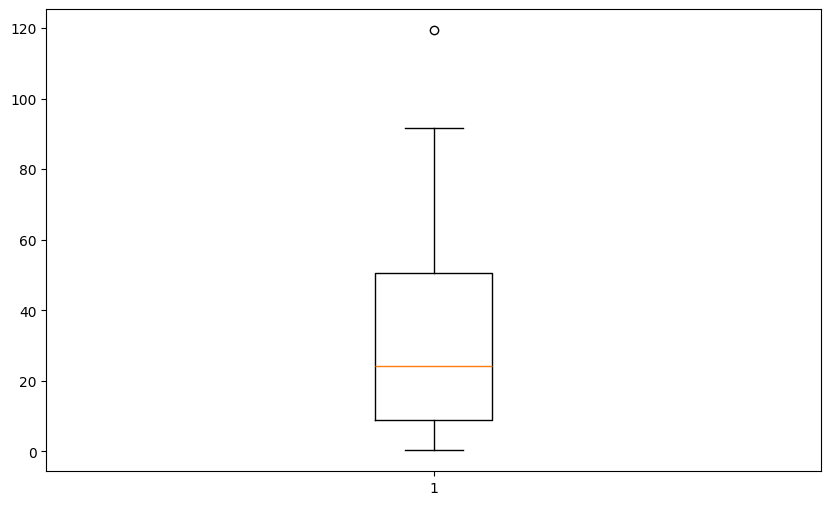

In [ ]:
plot_forecast(test_data_aqi_ws_ninety, forecast_aqi_ws_ninety)
plot_boxplot(forecast_aqi_ws_ninety['yhat'].values.reshape(-1,1), test_data_aqi_ws_ninety['y'].values.reshape(-1,1))

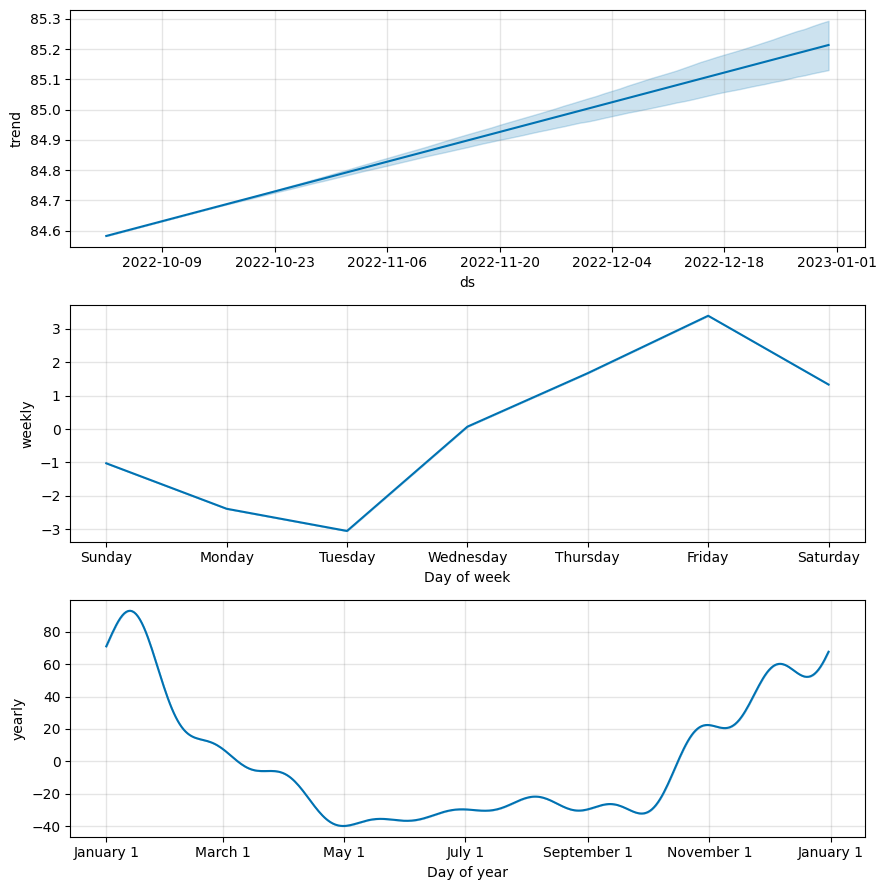

In [ ]:
model_aqi_ws_ninety.plot_components(forecast_aqi_ws_ninety)
plt.show()

# Multivariate Time Series Forecasting using FBProphet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [ ]:
train_data_combined_ws_thirty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)
test_data_combined_ws_thirty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)

train_data_combined_ws_sixty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)
test_data_combined_ws_sixty.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)

train_data_combined_ws_ninety.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)
test_data_combined_ws_ninety.rename(columns={'DateTime': 'ds', 'Bjelave_PM10': 'y'}, inplace=True)

In [ ]:
def train_prophet_multivariate(train_data):
    model = Prophet()
    #added
    model.add_regressor('wind_speed')
    model.add_regressor('wind_direction')
    model.add_regressor('precipitation')
    model.add_regressor('pressure')
    model.add_regressor('temperature')
    model.add_regressor('humidity')
    model.add_regressor('visibility')
    model.add_regressor('cloudiness') #model.add_regressor('Bjelave_PM10')
    model.add_regressor('Bjelave_SO2')
    model.add_regressor('Bjelave_NO2')
    #added
    model.fit(train_data)
    return model

In [ ]:
model_combined_ws_thirty = train_prophet_multivariate(train_data_combined_ws_thirty)
forecast_combined_ws_thirty = predict_prophet(model_combined_ws_thirty, test_data_combined_ws_thirty)
rmse, mae, r2 = calculate_metrics(test_data_combined_ws_thirty, forecast_combined_ws_thirty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/4v6os29p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/a67qskrg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2477', 'data', 'file=/tmp/tmpag6a5v30/4v6os29p.json', 'init=/tmp/tmpag6a5v30/a67qskrg.json', 'output', 'file=/tmp/tmpag6a5v30/prophet_model43w7prcj/prophet_model-20250729172833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 27.328
MAE: 23.835
R2: 0.640


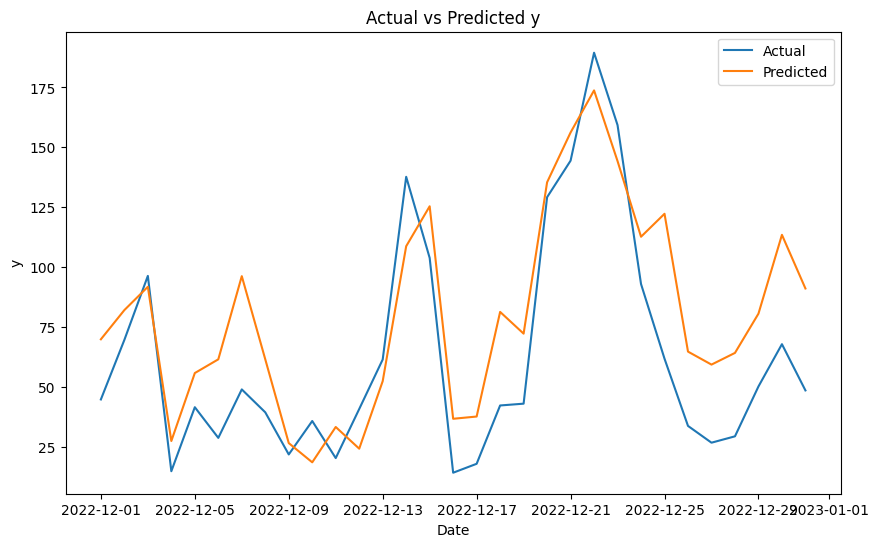

In [ ]:
#plot_forecast(test_data_combined_ws_thirty, forecast_combined_ws_thirty, "DateTime", "Bjelave_PM10")
plot_forecast(test_data_combined_ws_thirty, forecast_combined_ws_thirty)
#plot_boxplot(forecast_combined_ws_thirty['yhat'].values.reshape(-1,1), test_data_combined_ws_thirty['y'].values.reshape(-1,1))

In [ ]:
model_combined_ws_sixty = train_prophet_multivariate(train_data_combined_ws_sixty)
forecast_combined_ws_sixty = predict_prophet(model_combined_ws_sixty, test_data_combined_ws_sixty)
rmse, mae, r2 = calculate_metrics(test_data_combined_ws_sixty, forecast_combined_ws_sixty)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/0wa4_2ae.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/n_4jxcql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97408', 'data', 'file=/tmp/tmpag6a5v30/0wa4_2ae.json', 'init=/tmp/tmpag6a5v30/n_4jxcql.json', 'output', 'file=/tmp/tmpag6a5v30/prophet_model3ls7p8rx/prophet_model-20250729172841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 23.205
MAE: 19.321
R2: 0.650


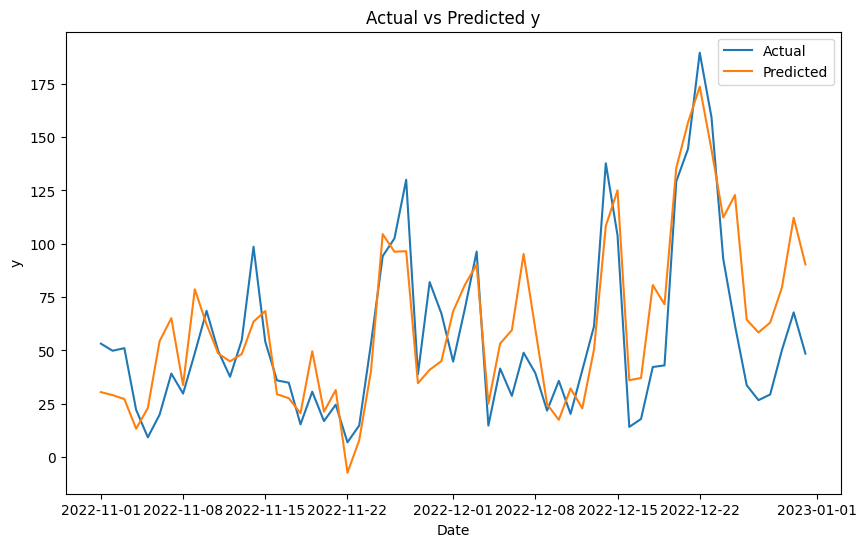

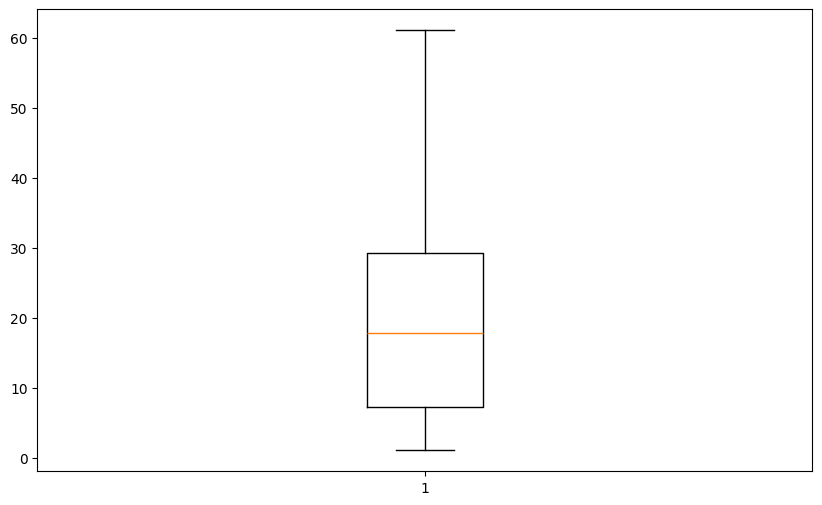

In [ ]:
plot_forecast(test_data_combined_ws_sixty, forecast_combined_ws_sixty)
plot_boxplot(forecast_combined_ws_sixty['yhat'].values.reshape(-1,1), test_data_combined_ws_sixty['y'].values.reshape(-1,1))

In [ ]:
model_combined_ws_ninety = train_prophet_multivariate(train_data_combined_ws_ninety)
forecast_combined_ws_ninety = predict_prophet(model_combined_ws_ninety, test_data_combined_ws_ninety)
rmse, mae, r2 = calculate_metrics(test_data_combined_ws_ninety, forecast_combined_ws_ninety)

print('RMSE: %.3f' % rmse)
print('MAE: %.3f' % mae)
print('R2: %.3f' % r2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/jnf9jkpc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpag6a5v30/yzqh4gvm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2964', 'data', 'file=/tmp/tmpag6a5v30/jnf9jkpc.json', 'init=/tmp/tmpag6a5v30/yzqh4gvm.json', 'output', 'file=/tmp/tmpag6a5v30/prophet_modelvtungsk1/prophet_model-20250729172851.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 19.709
MAE: 15.696
R2: 0.669


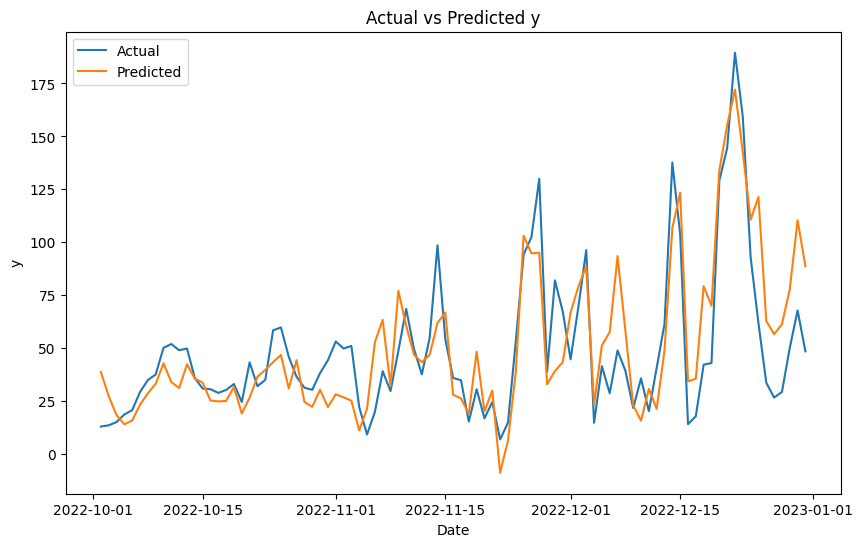

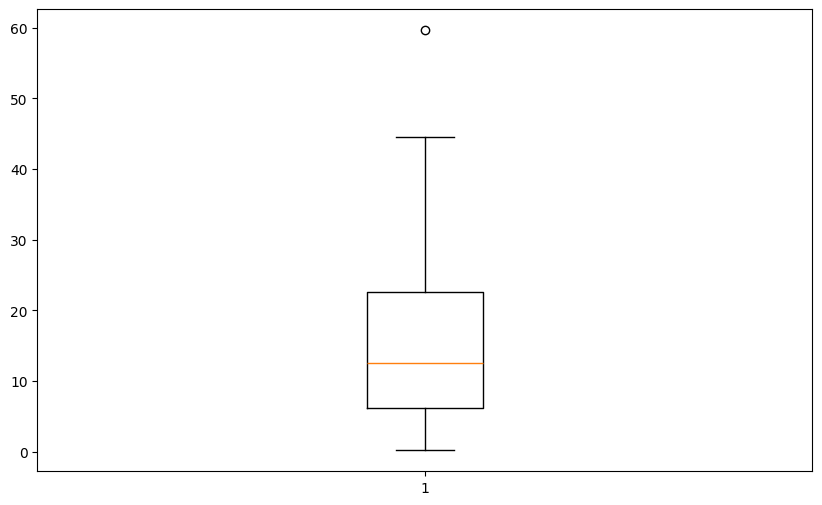

In [ ]:
plot_forecast(test_data_combined_ws_ninety, forecast_combined_ws_ninety)
plot_boxplot(forecast_combined_ws_ninety['yhat'].values.reshape(-1,1), test_data_combined_ws_ninety['y'].values.reshape(-1,1))

In [ ]:
forecast_combined_ws_thirty.head(3)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-12-01  40.953742   38.786830  103.230392    40.953742    40.953742   
1 2022-12-02  40.954982   50.556239  113.986384    40.954982    40.954982   
2 2022-12-03  40.956223   59.266394  123.421760    40.956223    40.956223   

   Bjelave_NO2  Bjelave_NO2_lower  Bjelave_NO2_upper  Bjelave_SO2  ...  \
0     3.648328           3.648328           3.648328     0.196675  ...   
1    12.633873          12.633873          12.633873     0.231056  ...   
2    18.316578          18.316578          18.316578     0.190358  ...   

   wind_speed  wind_speed_lower  wind_speed_upper    yearly  yearly_lower  \
0   10.193090         10.193090         10.193090  6.081095      6.081095   
1   10.898609         10.898609         10.898609  7.153636      7.153636   
2    5.212959          5.212959          5.212959  8.183650      8.183650   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      6.081095                   0.0                         0.0   
1      7.153636                   0.0                         0.0   
2      8.183650                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  69.878291  
1                         0.0  82.070300  
2                         0.0  91.796530  

[3 rows x 52 columns]

In [ ]:
forecast_combined_ws_sixty.head(3)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-11-01  40.155571   -2.030049   62.885686    40.155571    40.155571   
1 2022-11-02  40.155880   -1.985857   63.013855    40.155880    40.155880   
2 2022-11-03  40.156188   -5.130630   59.670091    40.156188    40.156188   

   Bjelave_NO2  Bjelave_NO2_lower  Bjelave_NO2_upper  Bjelave_SO2  ...  \
0    -2.591613          -2.591613          -2.591613    -0.016575  ...   
1    -2.591613          -2.591613          -2.591613    -0.016656  ...   
2    -2.591613          -2.591613          -2.591613    -0.013262  ...   

   wind_speed  wind_speed_lower  wind_speed_upper     yearly  yearly_lower  \
0   -0.468573         -0.468573         -0.468573 -13.921118    -13.921118   
1    0.928351          0.928351          0.928351 -13.807580    -13.807580   
2    3.381008          3.381008          3.381008 -13.685395    -13.685395   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0    -13.921118                   0.0                         0.0   
1    -13.807580                   0.0                         0.0   
2    -13.685395                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  30.484151  
1                         0.0  29.066273  
2                         0.0  27.244277  

[3 rows x 52 columns]

In [ ]:
forecast_combined_ws_ninety.head(3)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2022-10-02  38.819762    7.091781   71.519398    38.819762    38.819762   
1 2022-10-03  38.815453   -5.983932   60.516576    38.815453    38.815453   
2 2022-10-04  38.811144  -14.812483   50.081870    38.811144    38.811144   

   Bjelave_NO2  Bjelave_NO2_lower  Bjelave_NO2_upper  Bjelave_SO2  ...  \
0   -12.276393         -12.276393         -12.276393    -0.025159  ...   
1   -10.138866         -10.138866         -10.138866    -0.025141  ...   
2    -6.219705          -6.219705          -6.219705    -0.019735  ...   

   wind_speed  wind_speed_lower  wind_speed_upper    yearly  yearly_lower  \
0    6.920166          6.920166          6.920166 -8.596150     -8.596150   
1    4.262237          4.262237          4.262237 -8.890267     -8.890267   
2    8.106010          8.106010          8.106010 -9.234431     -9.234431   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0     -8.596150                   0.0                         0.0   
1     -8.890267                   0.0                         0.0   
2     -9.234431                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  38.812631  
1                         0.0  27.391647  
2                         0.0  18.446079  

[3 rows x 52 columns]

In [ ]:
def plot_forecast_mod(test, forecast, date_col='ds', true_label='y', predicted_label='yhat', title_label='y'):
    plt.figure(figsize=(10, 6))
    plt.plot(test[date_col], test[true_label], label='Actual')
    plt.plot(test[date_col], forecast[predicted_label], label='Predicted')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(true_label)
    plt.title('Actual vs Predicted ' + title_label)
    plt.show()

In [ ]:
df_processed_combined_data_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateTime        1826 non-null   datetime64[ns]
 1   wind_speed      1826 non-null   float64       
 2   wind_direction  1826 non-null   float64       
 3   precipitation   1826 non-null   float64       
 4   pressure        1826 non-null   float64       
 5   temperature     1826 non-null   float64       
 6   humidity        1826 non-null   float64       
 7   visibility      1826 non-null   float64       
 8   cloudiness      1826 non-null   float64       
 9   Bjelave_PM10    1826 non-null   float64       
 10  Bjelave_SO2     1826 non-null   float64       
 11  Bjelave_NO2     1826 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 171.3 KB


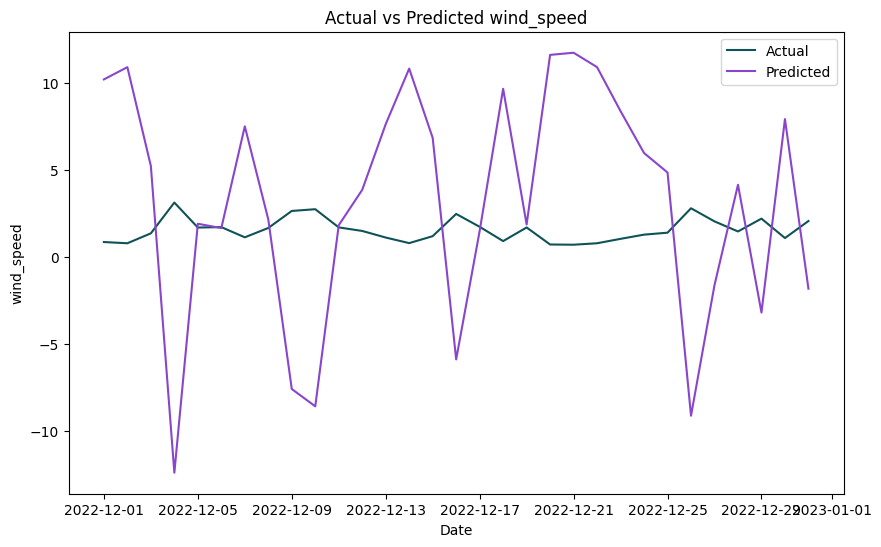

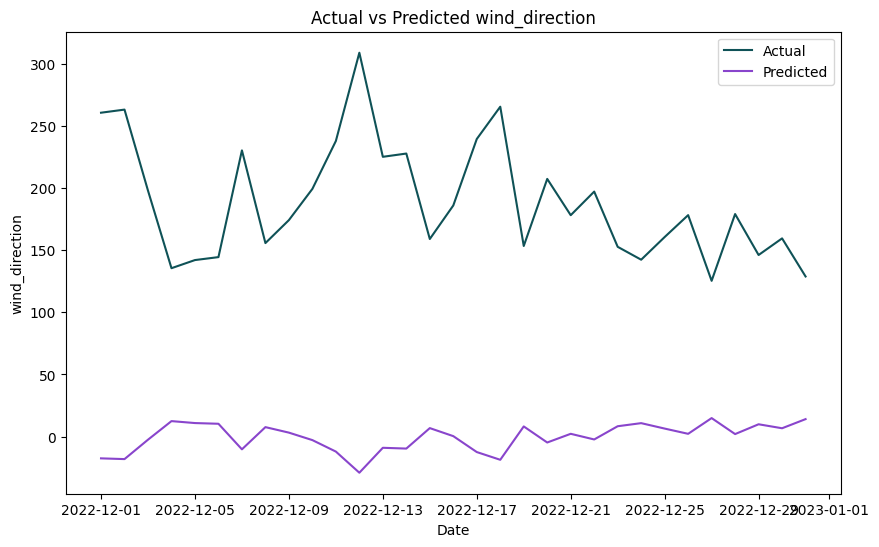

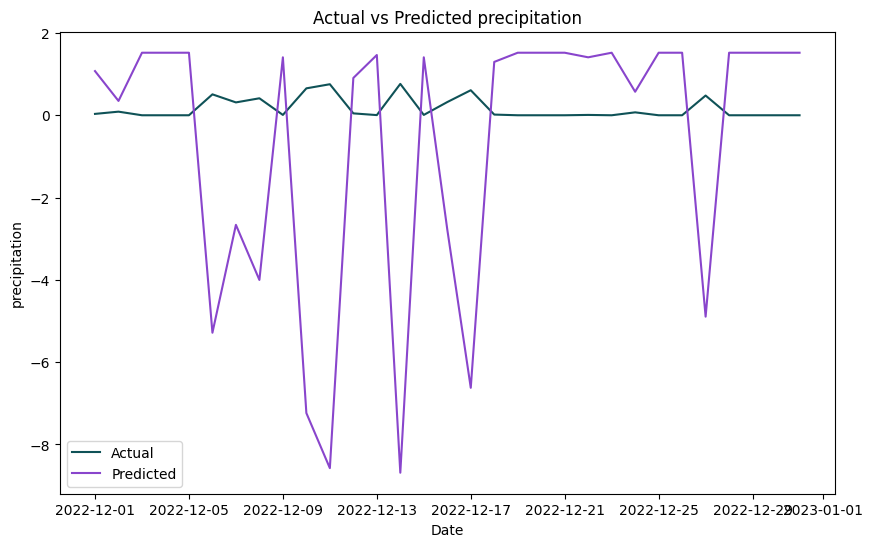

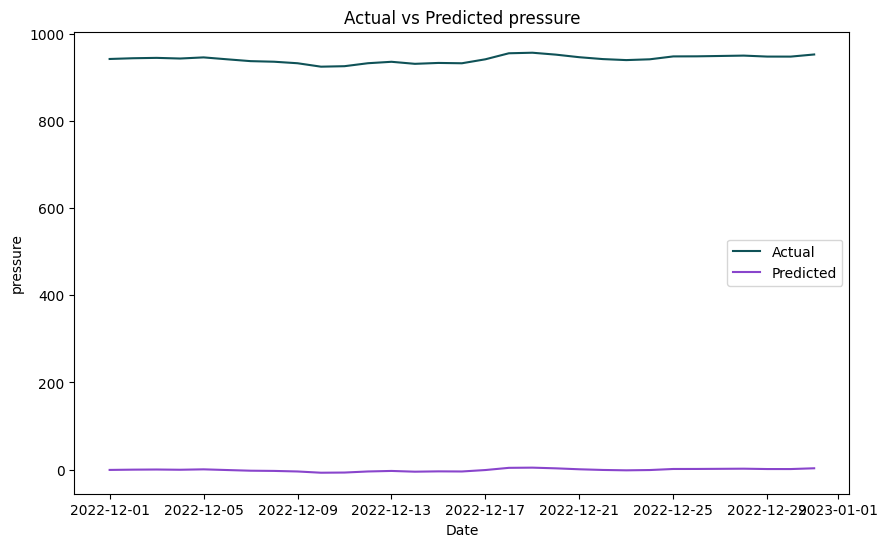

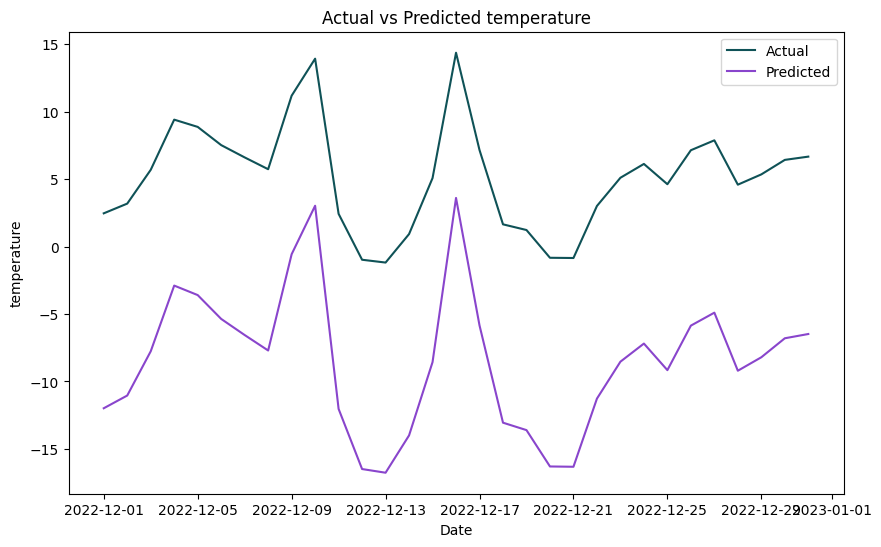

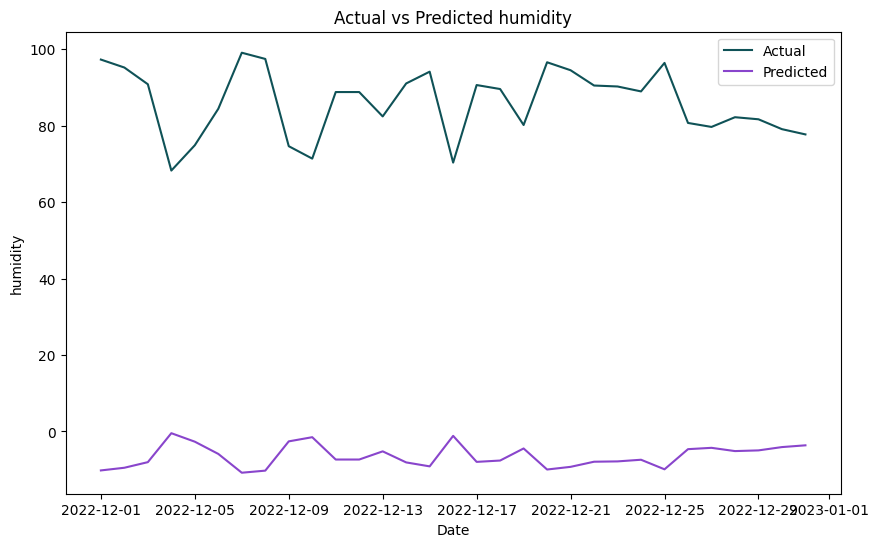

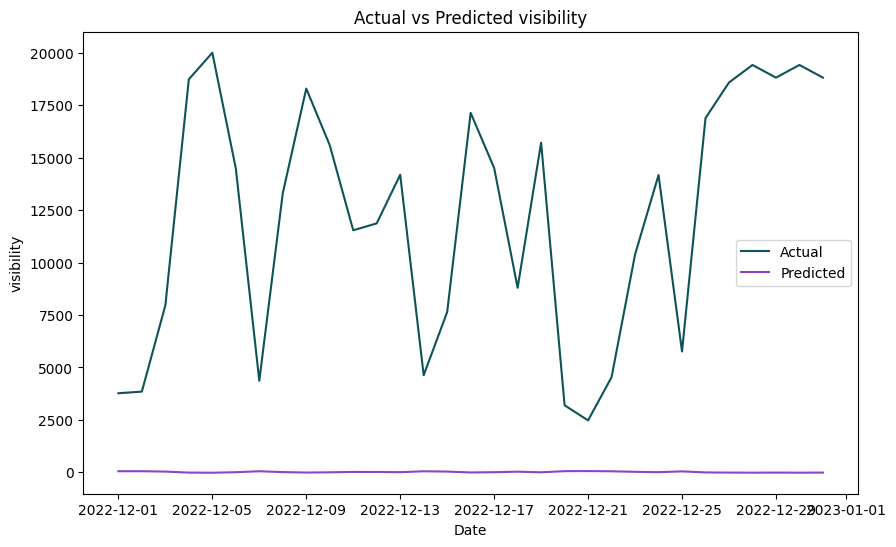

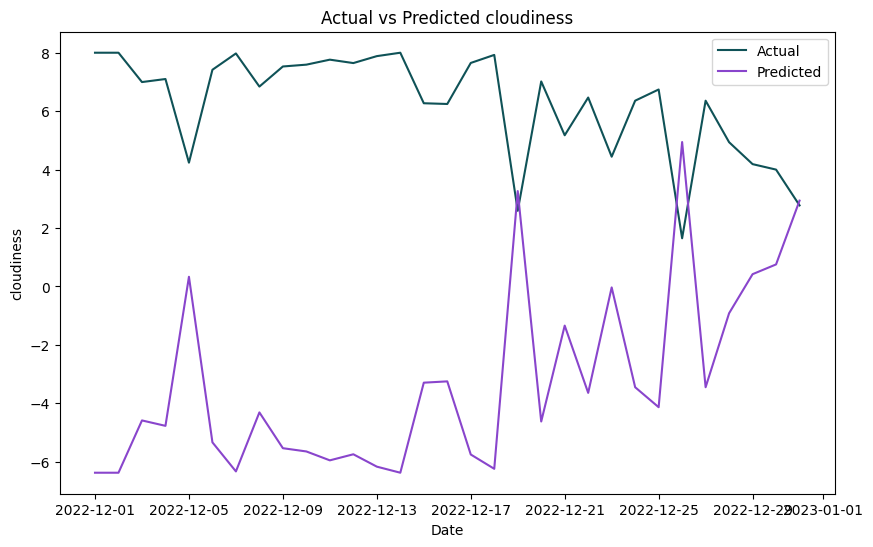

In [ ]:
meteorological_data  = [
    'wind_speed',
    'wind_direction',
    'precipitation',
    'pressure',
    'temperature',
    'humidity',
    'visibility',
    'cloudiness'
]
for var in meteorological_data:
    plot_forecast_mod(
        test_data_combined_ws_thirty,
        forecast_combined_ws_thirty,
        date_col='ds',
        true_label=var,
        predicted_label=var
    )

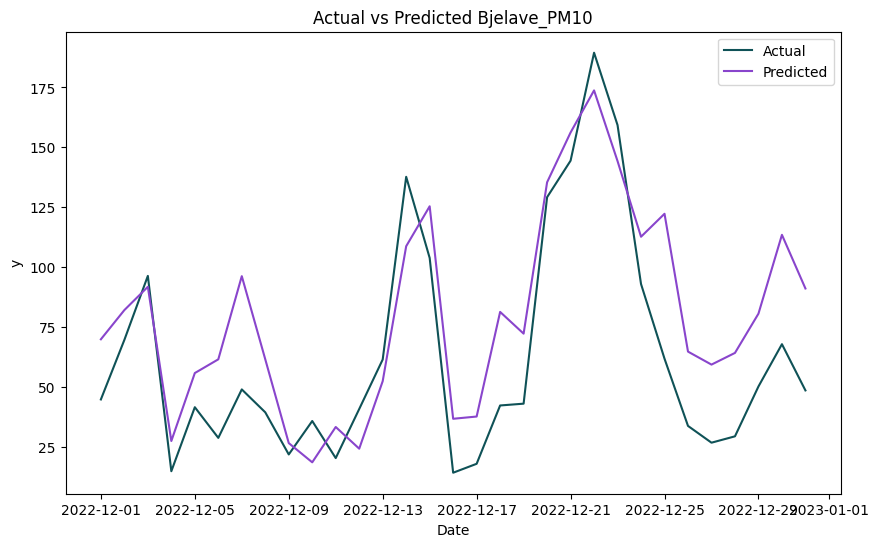

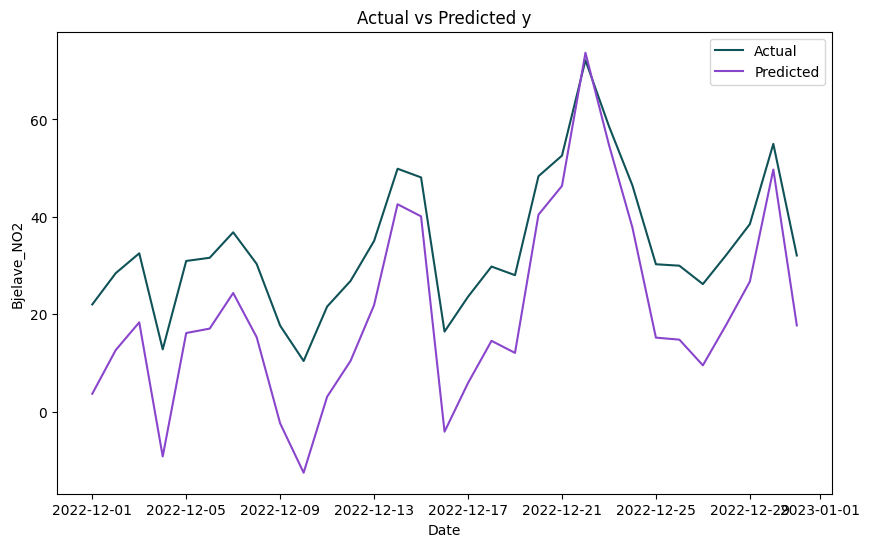

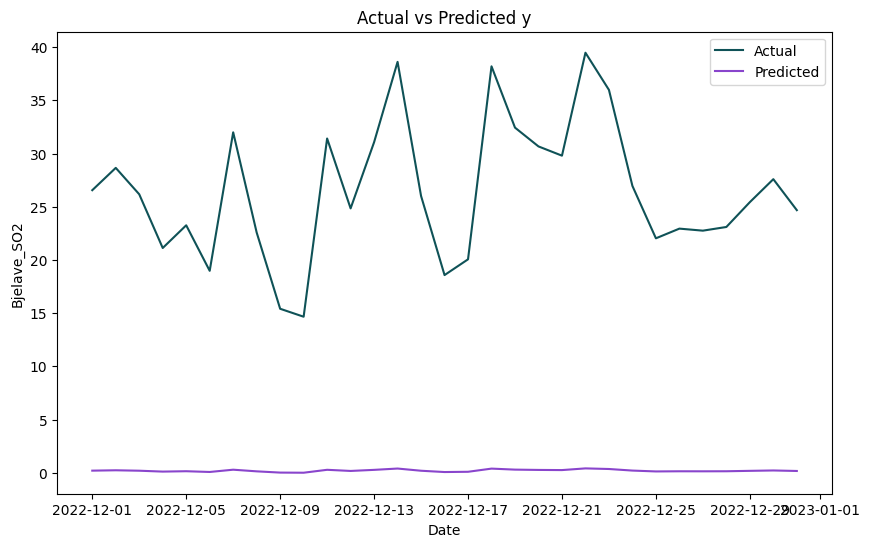

In [ ]:
plot_forecast(test_data_combined_ws_thirty, forecast_combined_ws_thirty, 'ds', 'y', 'yhat')
plot_forecast_mod(test_data_combined_ws_thirty, forecast_combined_ws_thirty, 'ds', 'Bjelave_NO2', 'Bjelave_NO2')
plot_forecast_mod(test_data_combined_ws_thirty, forecast_combined_ws_thirty, 'ds', 'Bjelave_SO2', 'Bjelave_SO2')

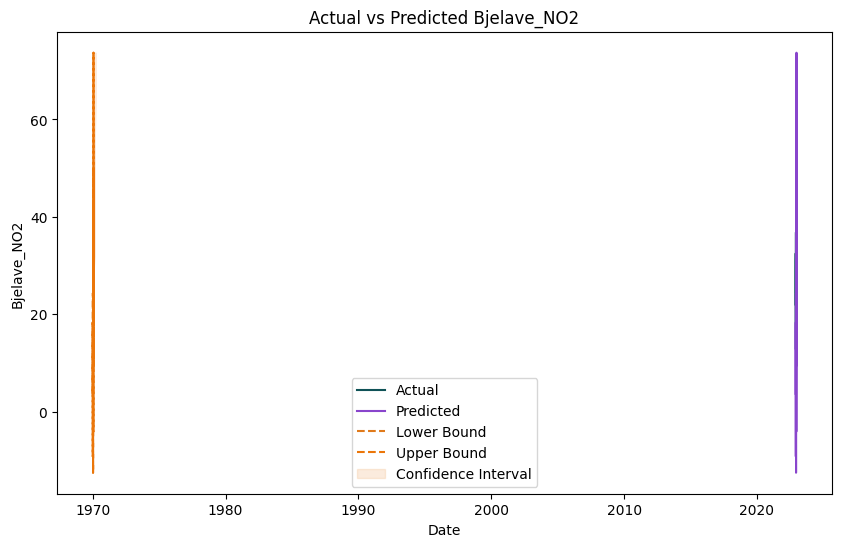

In [ ]:
plot_forecast_mod(test_data_combined_ws_thirty, forecast_combined_ws_thirty, 'ds', 'Bjelave_NO2', 'Bjelave_NO2', True)


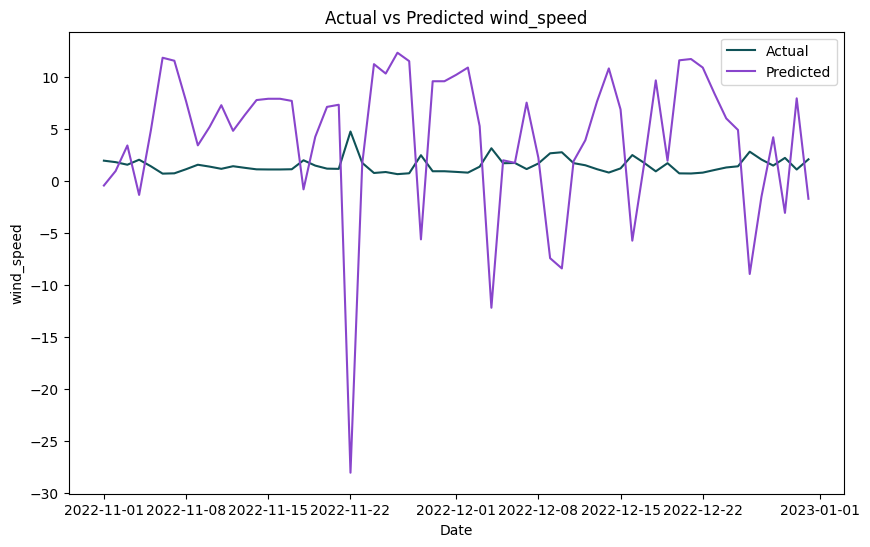

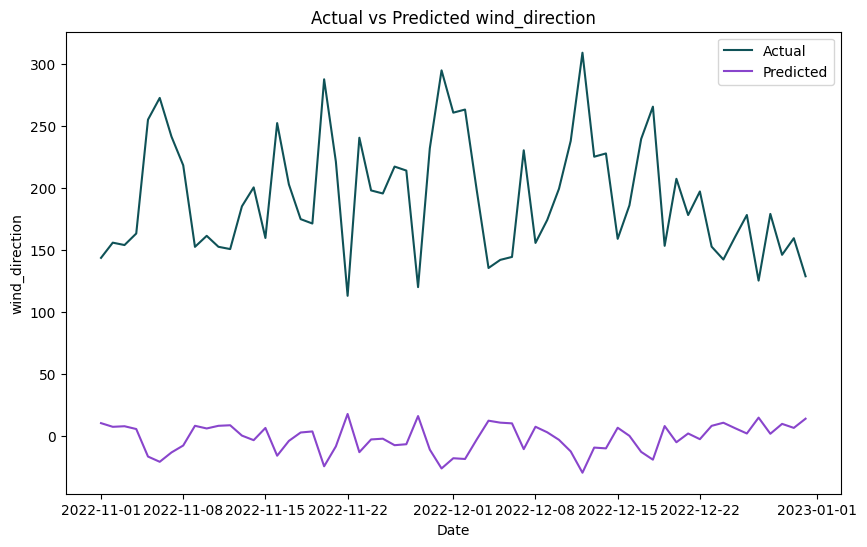

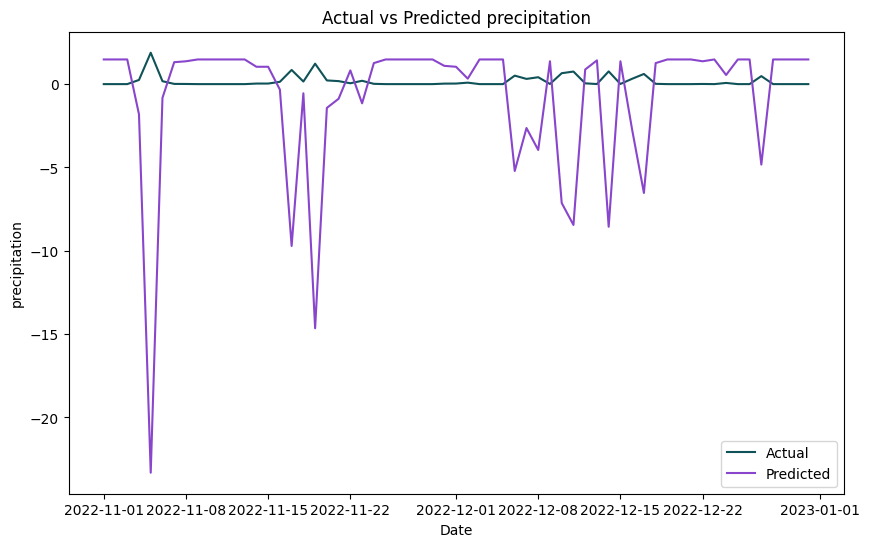

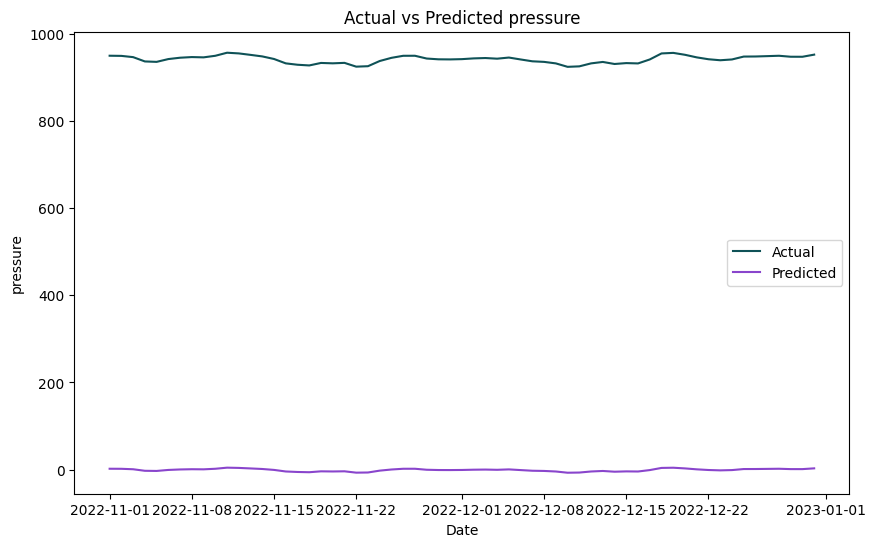

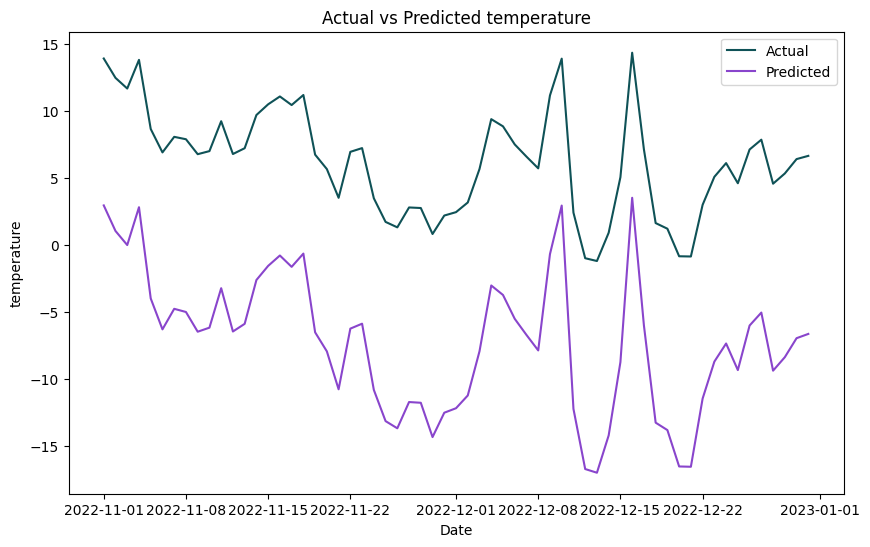

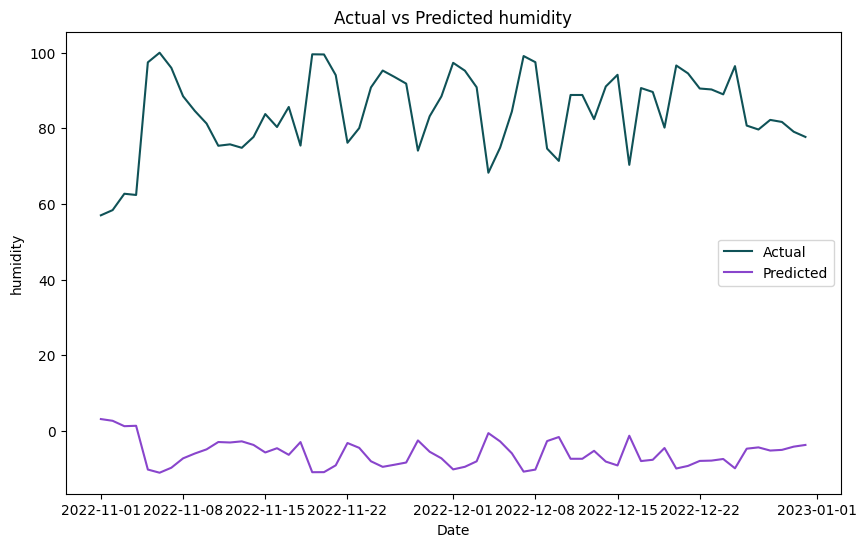

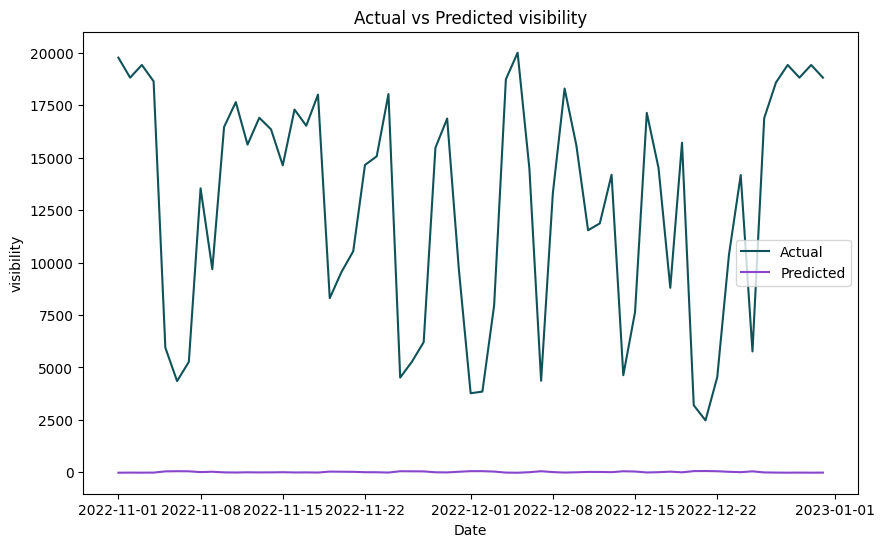

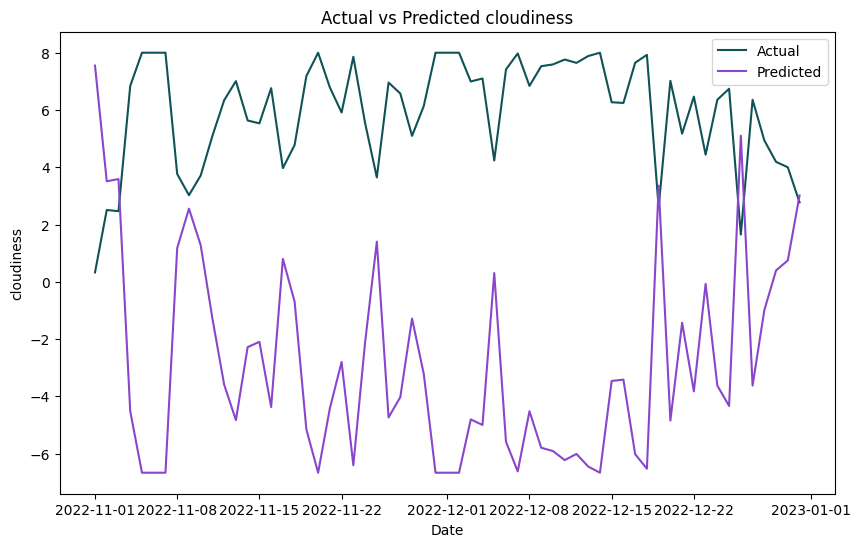

In [ ]:
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'wind_speed', 'wind_speed')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'wind_direction', 'wind_direction')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'precipitation', 'precipitation')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'pressure', 'pressure')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'temperature', 'temperature')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'humidity', 'humidity')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'visibility', 'visibility')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'cloudiness', 'cloudiness')


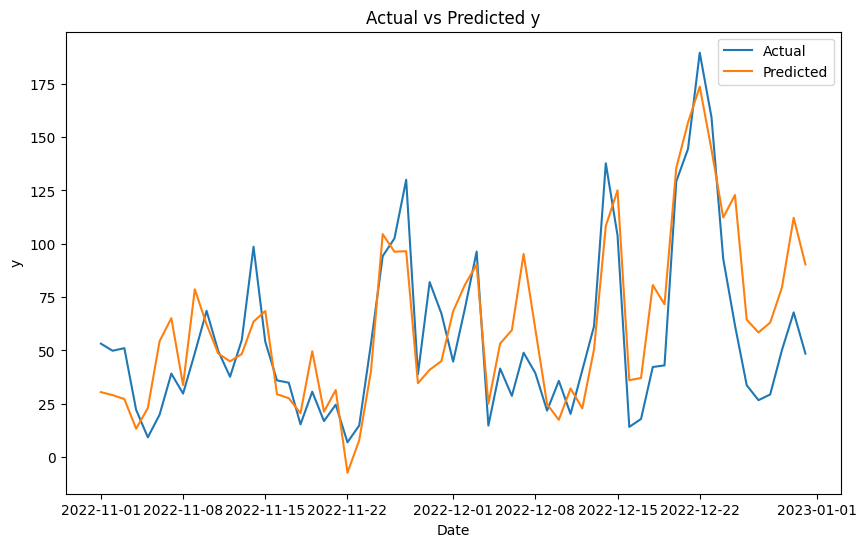

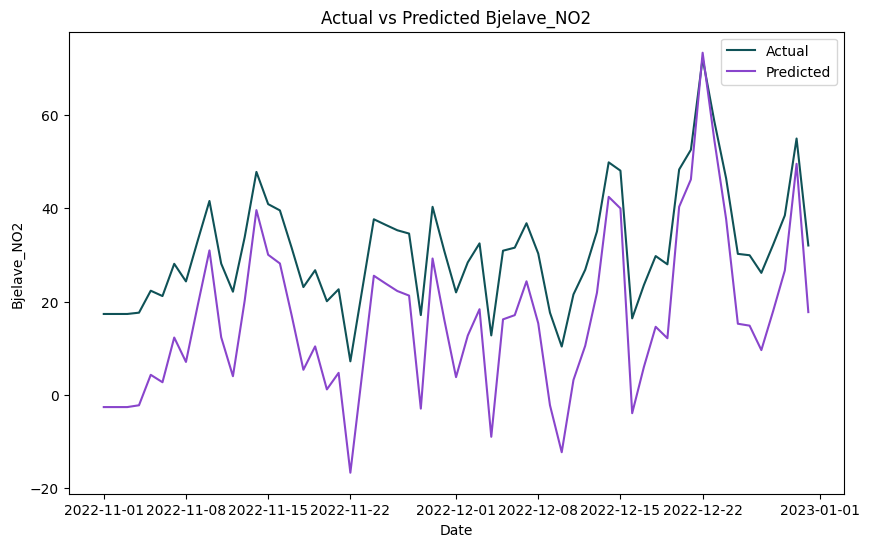

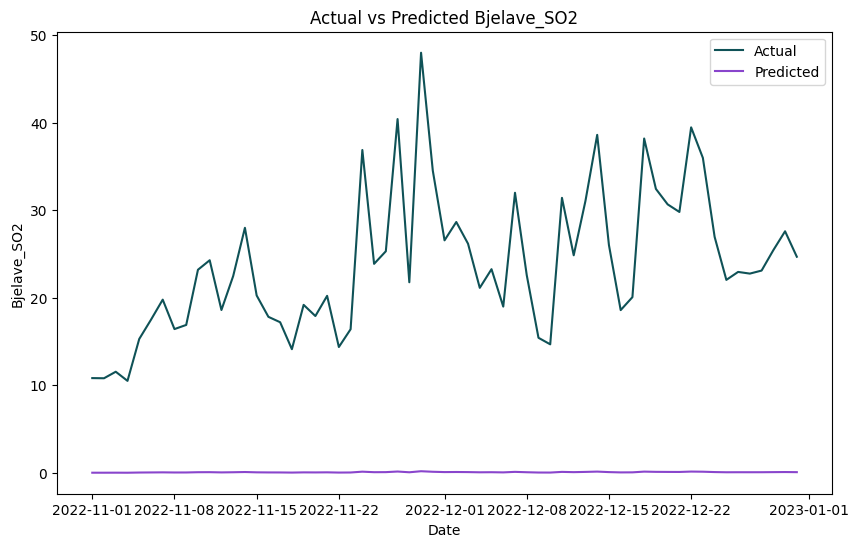

In [ ]:
plot_forecast(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'y', 'yhat')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'Bjelave_NO2', 'Bjelave_NO2')
plot_forecast_mod(test_data_combined_ws_sixty, forecast_combined_ws_sixty, 'ds', 'Bjelave_SO2', 'Bjelave_SO2')

# Prerequisites and Data Preparation for SHAP Analysis of Facebook Prophet Models

In [ ]:
len(train_data_aqi_ws_thirty)/6

275.6666666666667

In [ ]:
import shap
#num_samples=int(len(train_data_aqi_ws_thirty)/6)
num_samples=100
len_train_data=len(train_data_aqi_ws_thirty) #int(len(train_data_aqi_ws_thirty)/5)

background_data_combined_ws_thirty = shap.sample(train_data_combined_ws_thirty, num_samples)
background_data_combined_ws_sixty= shap.sample(train_data_combined_ws_sixty, num_samples)
background_data_combined_ws_ninety = shap.sample(train_data_combined_ws_ninety, num_samples)

#background_data_combined_ws_thirty_scaled_with_datetime  = shap.sample(train_data_combined_ws_thirty_scaled_with_datetime, num_samples)
#background_data_combined_ws_sixty_scaled_with_datetime  = shap.sample(train_data_combined_ws_sixty_scaled_with_datetime, num_samples)
#background_data_combined_ws_ninety_scaled_with_datetime = shap.sample(train_data_combined_ws_ninety_scaled_with_datetime, num_samples)

#print("len(background_data_ws_aqi_thirty): ", len(background_data_aqi_ws_thirty))
#print("len(background_data_combined_ws_thirty): ", len(background_data_combined_ws_thirty))
#print("len(train_data_aqi_ws_thirty): ", len(train_data_aqi_ws_thirty))

#print("\nlen(background_data_aqi_ws_sixty): ", len(background_data_aqi_ws_sixty))
#print("len(background_data_combined_ws_sixty): ", len(background_data_combined_ws_sixty))
#print("len(train_data_aqi_ws_sixty): ", len(train_data_aqi_ws_sixty))

#print("\nlen(background_data_aqi_ws_ninety): ", len(background_data_aqi_ws_ninety))
#print("len(background_data_combined_ws_ninety): ", len(background_data_combined_ws_ninety))
#print("len(train_data_aqi_ws_ninety): ", len(train_data_aqi_ws_ninety))


In [ ]:
background_data_aqi_ws_thirty = shap.sample(train_data_aqi_ws_thirty, num_samples)
background_data_aqi_ws_sixty= shap.sample(train_data_aqi_ws_sixty, num_samples)
background_data_aqi_ws_ninety = shap.sample(train_data_aqi_ws_ninety, num_samples)

In [ ]:
background_data_combined_ws_ninety.tail(1)

ds  wind_speed  wind_direction  precipitation  pressure  \
1288 2021-07-12       1.575      202.833333            0.0  941.7375   

      temperature   humidity  visibility  cloudiness          y  Bjelave_SO2  \
1288    23.816667  58.041667     19525.0         0.7  29.514776    14.762154   

      Bjelave_NO2  
1288    15.139171

In [ ]:
feature_columns_combined=['ds', 'y','wind_speed','wind_direction','precipitation','pressure', 'temperature','humidity','visibility','cloudiness','Bjelave_SO2','Bjelave_NO2']
feature_columns_aqi=['ds','y']

In [ ]:
def prophet_predict_ws_thirty_for_shap(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_aqi)
    predictions = model_aqi_ws_thirty.predict(data_df)
    return predictions['yhat'].values # Vrati samo yhat kao NumPy array


def prophet_predict_ws_sixty_for_shap(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_aqi)
    predictions = model_aqi_ws_sixty.predict(data_df)
    return predictions['yhat'].values


def prophet_predict_ws_ninety_for_shap(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_aqi)
    predictions = model_aqi_ws_ninety.predict(data_df)
    return predictions['yhat'].values

In [ ]:
feature_columns_combined

['ds',
 'y',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [ ]:
def prophet_predict_ws_thirty_for_shap_combined(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_combined)
    predictions = model_combined_ws_thirty.predict(data_df)
    return predictions['yhat'].values


def prophet_predict_ws_sixty_for_shap_combined(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_combined)
    predictions = model_combined_ws_sixty.predict(data_df)
    return predictions['yhat'].values


def prophet_predict_ws_ninety_for_shap_combined(data_df):
    if not isinstance(data_df, pd.DataFrame):
         data_df = pd.DataFrame(data_df, columns=feature_columns_combined)
    predictions = model_combined_ws_ninety.predict(data_df)
    return predictions['yhat'].values

In [ ]:
#train_data_aqi_ws_sixty.rename(columns={'DateTime': 'ds', 'Ambasada_PM2.5': 'y'}, inplace=True)\
data_aqi_to_explain_ws_thirty=test_data_aqi_ws_thirty.rename(columns={'y': 'yhat'})
data_aqi_to_explain_ws_sixty=test_data_aqi_ws_sixty.rename(columns={'y': 'yhat'})
data_aqi_to_explain_ws_ninety=test_data_aqi_ws_ninety.rename(columns={'y': 'yhat'})

day_aqi_to_explain_ws_thirty=test_data_aqi_ws_thirty.rename(columns={'y': 'yhat'}).tail(1)
day_aqi_to_explain_ws_sixty=test_data_aqi_ws_sixty.rename(columns={'y': 'yhat'}).tail(1)
day_aqi_to_explain_ws_ninety=test_data_aqi_ws_ninety.rename(columns={'y': 'yhat'}).tail(1)
#train_data_combined_ws_thirty_scaled_with_datetime

#data_aqi_to_explain_ws_thirty_scaled=test_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'})
#data_aqi_to_explain_ws_sixty_scaled=test_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'})
#data_aqi_to_explain_ws_ninety_scaled=test_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'})


#day_aqi_to_explain_ws_thirty_scaled=test_data_aqi_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
#day_aqi_to_explain_ws_sixty_scaled=test_data_aqi_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
#day_aqi_to_explain_ws_ninety_scaled=test_data_aqi_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)


In [ ]:
"""
data_combined_to_explain_ws_thirty_scaled=test_data_combined_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_sixty_scaled=test_data_combined_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_ninety_scaled=test_data_combined_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'})
"""
data_combined_to_explain_ws_thirty=test_data_combined_ws_thirty.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_sixty=test_data_combined_ws_sixty.rename(columns={'y': 'yhat'})
data_combined_to_explain_ws_ninety=test_data_combined_ws_ninety.rename(columns={'y': 'yhat'})

day_combined_to_explain_ws_thirty=test_data_combined_ws_thirty.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_sixty=test_data_combined_ws_sixty.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_ninety=test_data_combined_ws_ninety.rename(columns={'y': 'yhat'}).tail(1)
"""
day_combined_to_explain_ws_thirty_scaled=test_data_combined_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_sixty_scaled=test_data_combined_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
day_combined_to_explain_ws_ninety_scaled=test_data_combined_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)
"""


"\nday_combined_to_explain_ws_thirty_scaled=test_data_combined_ws_thirty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)\nday_combined_to_explain_ws_sixty_scaled=test_data_combined_ws_sixty_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)\nday_combined_to_explain_ws_ninety_scaled=test_data_combined_ws_ninety_scaled_with_datetime.rename(columns={'y': 'yhat'}).tail(1)\n"

In [ ]:
print("len(data_aqi_to_explain_ws_sixty)", len(data_aqi_to_explain_ws_sixty))
print("len(data_combined_to_explain_ws_sixty)", len(data_combined_to_explain_ws_sixty))

print("len(background_data_aqi_ws_sixty)", len(background_data_aqi_ws_sixty))

len(data_aqi_to_explain_ws_sixty) 61
len(data_combined_to_explain_ws_sixty) 61
len(background_data_aqi_ws_sixty) 100


# SHAP Analysis of Selected Prediction Days in Facebook Prophet Model

In [ ]:
import shap
explainer_day_aqi_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap, background_data_aqi_ws_thirty)
shap_values_day_aqi_ws_thirty = explainer_day_aqi_ws_thirty.shap_values(day_aqi_to_explain_ws_thirty)

100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


In [ ]:
custom_feature_names = [ 'DateTime','Bjelave_PM10']

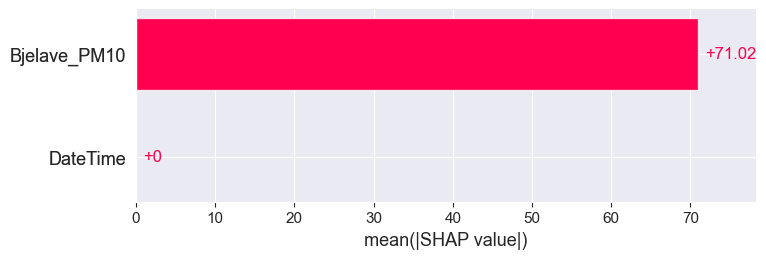

In [ ]:
explainer_day_aqi_ws_thirty_mod = shap.Explanation(
    values=shap_values_day_aqi_ws_thirty,
    base_values=np.array([explainer_day_aqi_ws_thirty.expected_value] * len(shap_values_day_aqi_ws_thirty)),
    data=day_aqi_to_explain_ws_thirty,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_day_aqi_ws_thirty_mod, max_display=2)

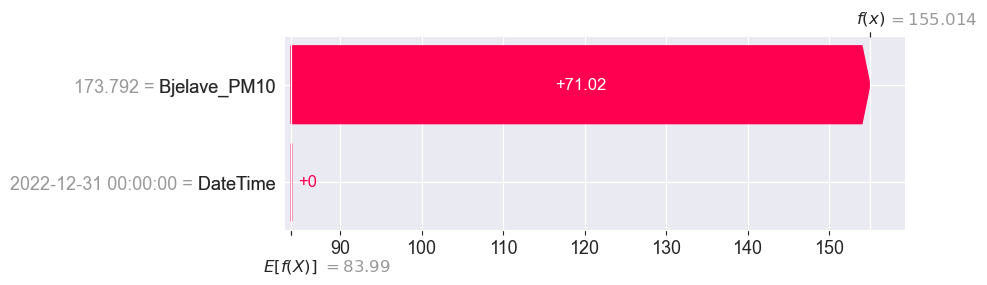

In [ ]:
shap.plots.waterfall(explainer_day_aqi_ws_thirty_mod[0], max_display=2)

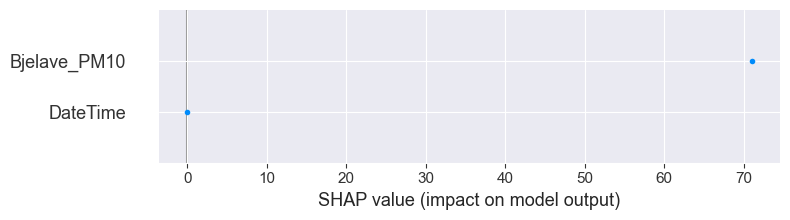

In [ ]:
shap.summary_plot(shap_values_day_aqi_ws_thirty, features=custom_feature_names)

In [ ]:
explainer_day_aqi_ws_sixty = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap, background_data_aqi_ws_sixty)
shap_values_day_aqi_ws_sixty = explainer_day_aqi_ws_thirty.shap_values(day_aqi_to_explain_ws_sixty)

100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


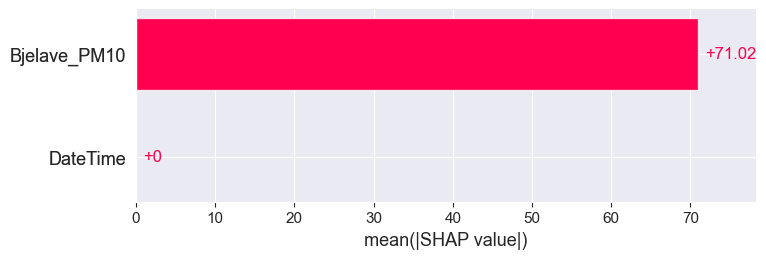

In [ ]:
explainer_day_aqi_ws_sixty_mod = shap.Explanation(
    values=shap_values_day_aqi_ws_sixty,
    base_values=np.array([explainer_day_aqi_ws_sixty.expected_value] * len(shap_values_day_aqi_ws_sixty)),
    data=day_aqi_to_explain_ws_sixty,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_day_aqi_ws_sixty_mod, max_display=2)

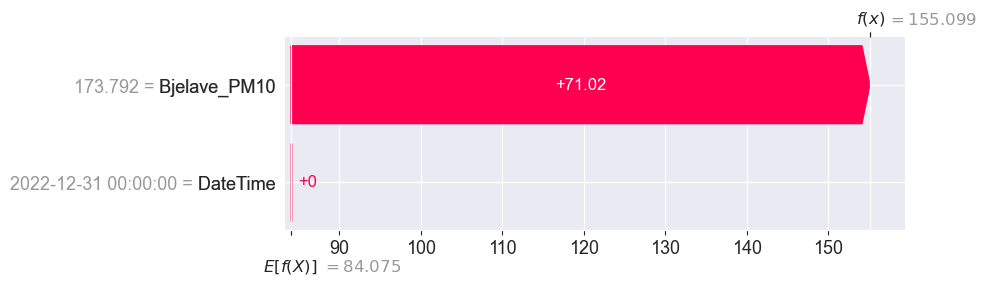

In [ ]:
shap.plots.waterfall(explainer_day_aqi_ws_sixty_mod[0], max_display=2)

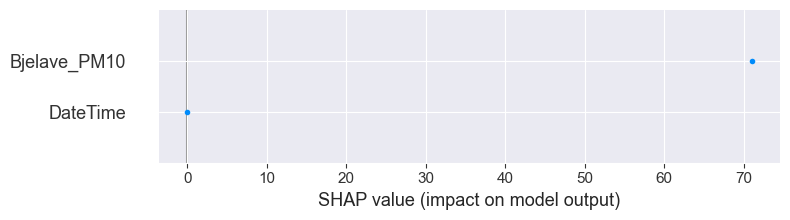

In [ ]:
shap.summary_plot(shap_values_day_aqi_ws_sixty, features=custom_feature_names)

In [ ]:
explainer_day_aqi_ws_ninety = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap, background_data_aqi_ws_ninety)
shap_values_day_aqi_ws_ninety = explainer_day_aqi_ws_ninety.shap_values(day_aqi_to_explain_ws_ninety)

100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


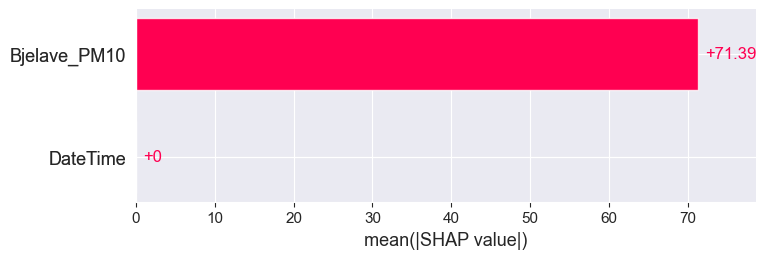

In [ ]:
explainer_day_aqi_ws_ninety_mod = shap.Explanation(
    values=shap_values_day_aqi_ws_ninety,
    base_values=np.array([explainer_day_aqi_ws_ninety.expected_value] * len(shap_values_day_aqi_ws_ninety)),
    data=day_aqi_to_explain_ws_ninety,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_day_aqi_ws_ninety_mod, max_display=2)

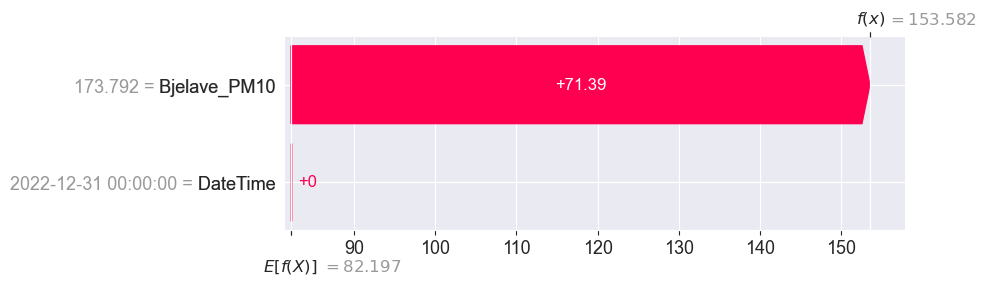

In [ ]:
shap.plots.waterfall(explainer_day_aqi_ws_ninety_mod[0], max_display=2)

In [ ]:
print("SHAP values: ")
print("shap_values_day_aqi_ws_ninety: ", shap_values_day_aqi_ws_ninety)
print("shap_values_day_aqi_ws_sixty: ", shap_values_day_aqi_ws_sixty)
print("shap_values_day_aqi_ws_thirty: ", shap_values_day_aqi_ws_thirty)

SHAP values: 
shap_values_day_aqi_ws_ninety:  [[ 0.         71.38511708]]
shap_values_day_aqi_ws_sixty:  [[ 0.         71.02424638]]
shap_values_day_aqi_ws_thirty:  [[ 0.         71.02424638]]


In [ ]:
import shap
explainer_day_combined_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap_combined, background_data_combined_ws_thirty)
shap_values_day_combined_ws_thirty = explainer_day_combined_ws_thirty.shap_values(day_combined_to_explain_ws_thirty)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
custom_feature_columns_combined = [col if col not in ['y', 'ds'] else ('Bjelave_PM10' if col == 'y' else 'DateTime') for col in feature_columns_combined]
custom_feature_columns_combined

['DateTime',
 'Bjelave_PM10',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_SO2',
 'Bjelave_NO2']

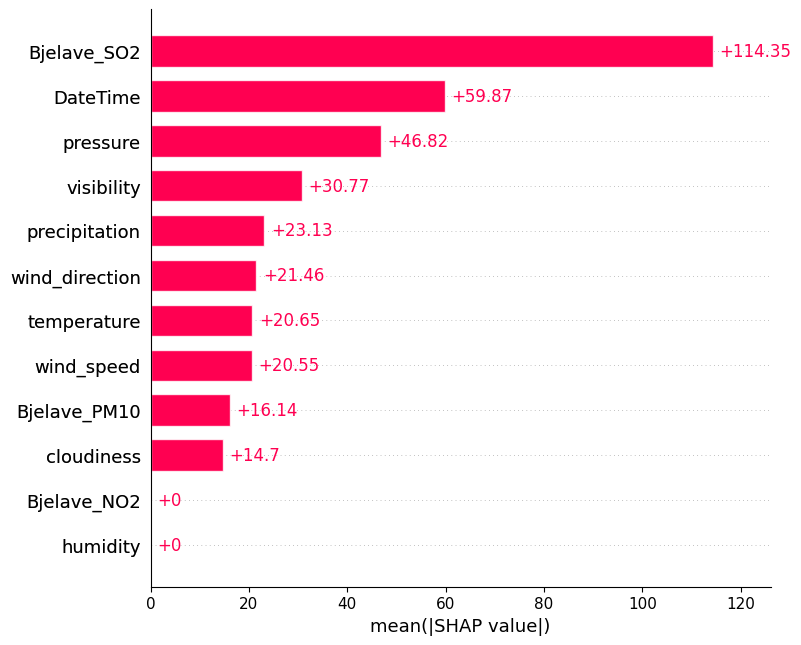

In [ ]:
explainer_day_combined_ws_thirty_mod = shap.Explanation(
    values=shap_values_day_combined_ws_thirty,
    base_values=np.array([explainer_day_combined_ws_thirty.expected_value] * len(shap_values_day_combined_ws_thirty)),
    data=day_combined_to_explain_ws_thirty,
    feature_names=custom_feature_columns_combined
)

shap.plots.bar(explainer_day_combined_ws_thirty_mod, max_display=len(custom_feature_columns_combined))


In [ ]:
explainer_day_combined_ws_thirty_mod.base_values

array([-20053.65459139])

In [ ]:
explainer_day_combined_ws_thirty.expected_value

-20053.654591386086

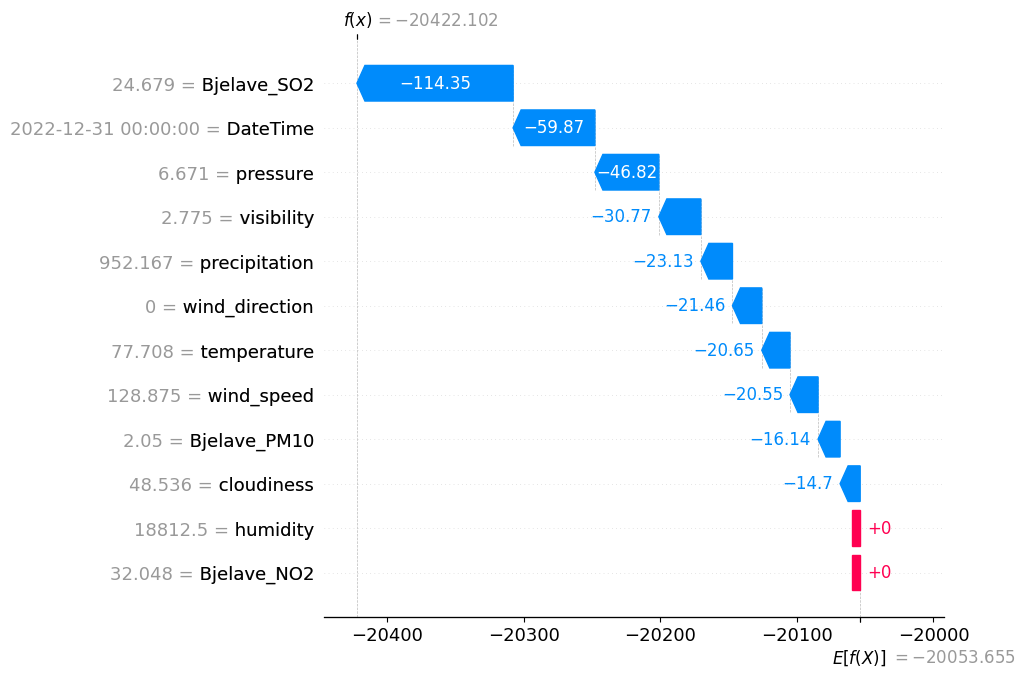

In [ ]:
shap.plots.waterfall(explainer_day_combined_ws_thirty_mod[0], max_display=len(custom_feature_columns_combined))

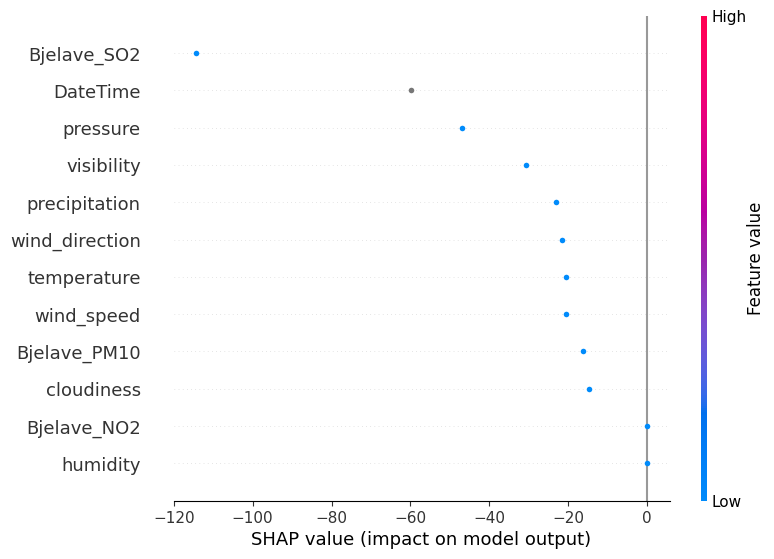

In [ ]:
shap.plots.beeswarm(explainer_day_combined_ws_thirty_mod, max_display=len(custom_feature_columns_combined))


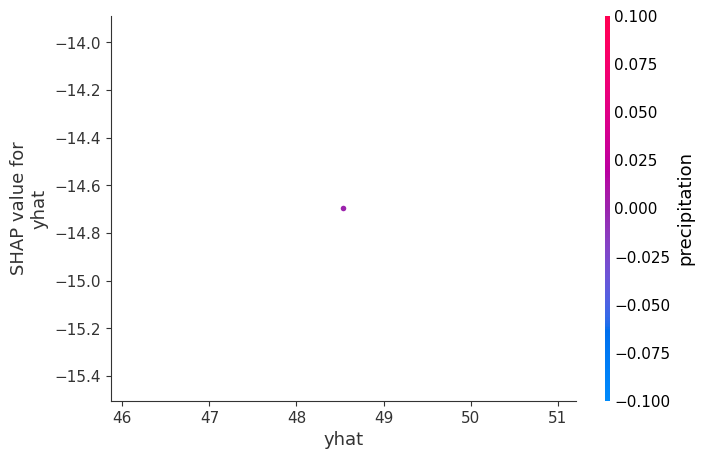

In [ ]:
#check
shap.dependence_plot(
    "yhat",                                   # feature za x osu
    explainer_day_combined_ws_thirty_mod.values,    # SHAP vrijednosti (array)
    day_combined_to_explain_ws_thirty,              # originalni podaci
    interaction_index="precipitation"                 # boja tačke
)


In [ ]:
explainer_day_combined_ws_sixty = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap_combined, background_data_combined_ws_sixty)
shap_values_day_combined_ws_sixty = explainer_day_combined_ws_thirty.shap_values(day_combined_to_explain_ws_sixty)

  0%|          | 0/1 [00:00<?, ?it/s]

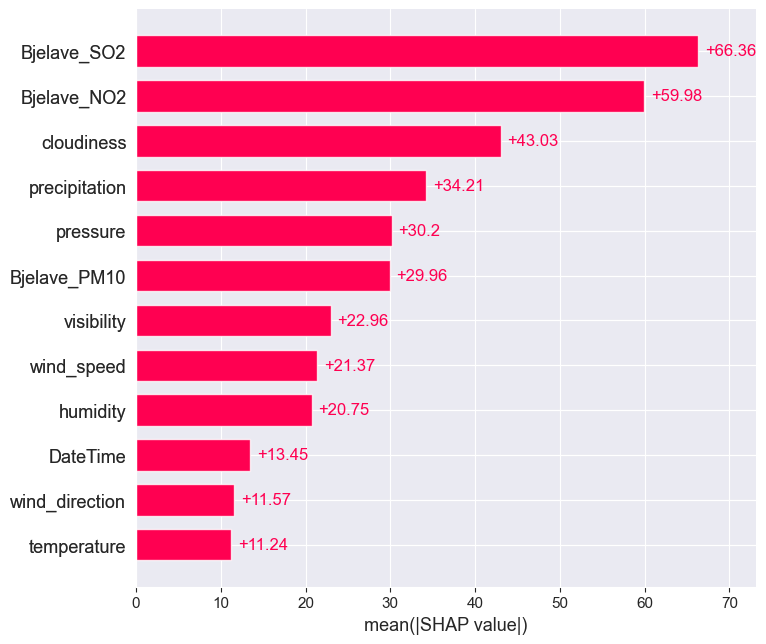

In [ ]:
explainer_day_combined_ws_sixty_mod = shap.Explanation(
    values=shap_values_day_combined_ws_sixty,
    base_values=np.array([explainer_day_combined_ws_sixty.expected_value] * len(shap_values_day_combined_ws_sixty)),
    data=day_combined_to_explain_ws_sixty,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_day_combined_ws_sixty_mod, max_display=len(custom_feature_names))


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


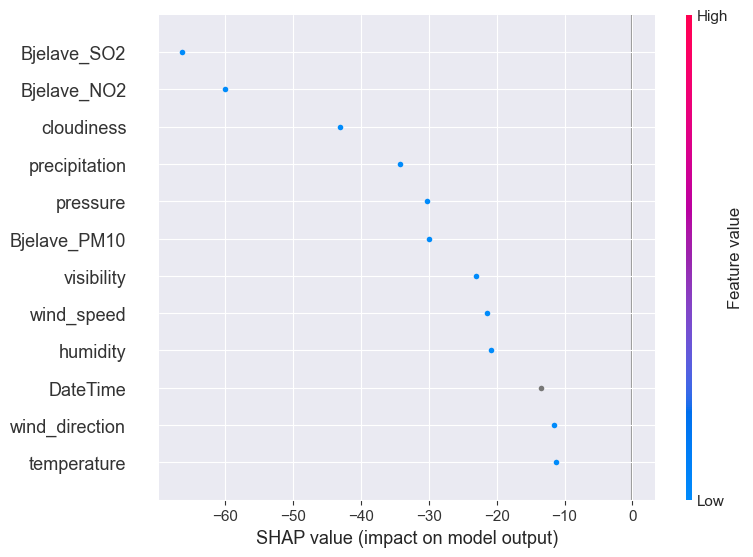

In [ ]:
shap.plots.beeswarm(explainer_day_combined_ws_sixty_mod, max_display=len(custom_feature_names))

In [ ]:
for i, val in enumerate(feature_columns_combined):
    print(f"{i}:{val}", end=" ")

0:ds 1:y 2:wind_speed 3:wind_direction 4:precipitation 5:pressure 6:temperature 7:humidity 8:visibility 9:cloudiness 10:Bjelave_PM10 11:Bjelave_SO2 12:Bjelave_NO2 

In [ ]:
shap_values_day_combined_ws_sixty

array([[-13.45273194, -29.9556051 , -21.37337262, -11.57340932,
        -34.21258741, -30.19516659, -11.24204149, -20.74938591,
        -22.95586871, -43.03461553, -66.3611628 , -59.98018754]])

In [ ]:
explainer_day_combined_ws_ninety = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap_combined, background_data_combined_ws_ninety)
shap_values_day_combined_ws_ninety = explainer_day_combined_ws_ninety.shap_values(day_combined_to_explain_ws_ninety)

  0%|          | 0/1 [00:00<?, ?it/s]

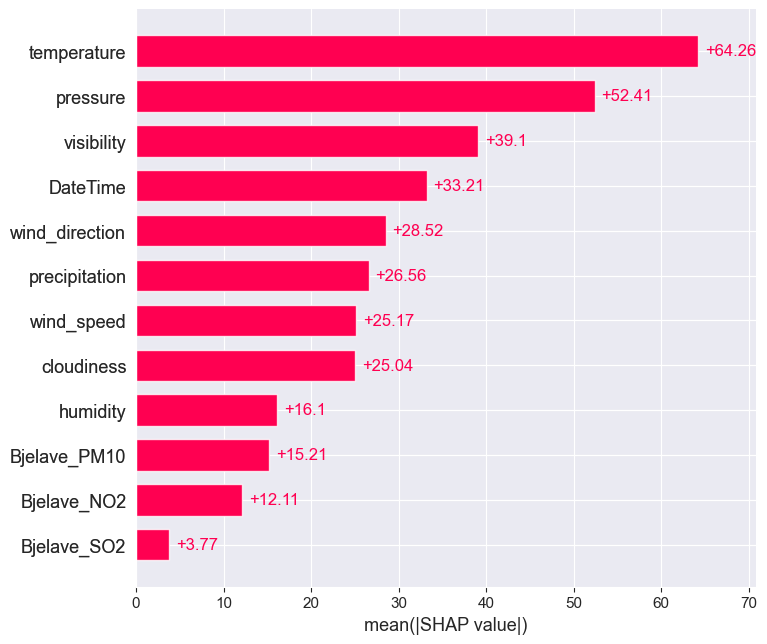

In [ ]:
explainer_day_combined_ws_ninety_mod = shap.Explanation(
    values=shap_values_day_combined_ws_ninety,
    base_values=np.array([explainer_day_combined_ws_ninety.expected_value] * len(shap_values_day_combined_ws_ninety)),
    data=day_combined_to_explain_ws_ninety,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_day_combined_ws_ninety_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


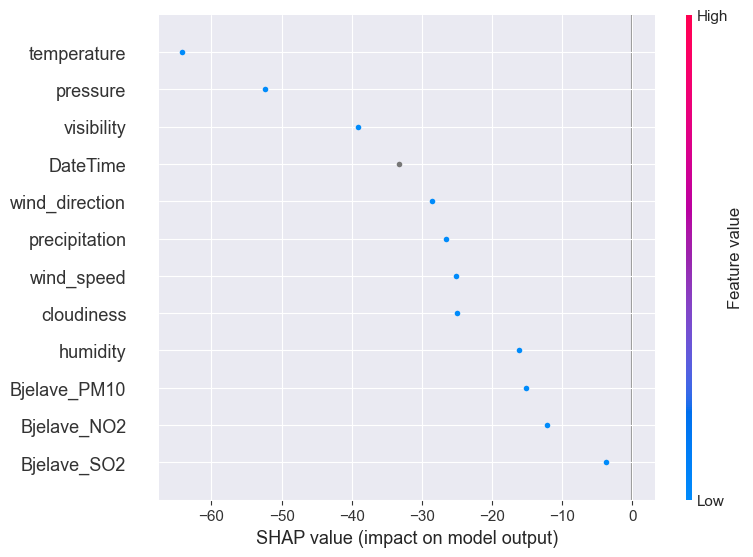

In [ ]:
shap.plots.beeswarm(explainer_day_combined_ws_ninety_mod, max_display=len(custom_feature_names))

# SHAP Analysis of Selected Forecast Horizons in Facebook Prophet Model

In [ ]:
custom_feature_names = [
    'Bjelave_PM10' if col == 'yhat' else
    'DateTime' if col == 'ds' else
    col
    for col in data_aqi_to_explain_ws_thirty.columns
]

In [ ]:
data_aqi_to_explain_ws_sixty_scaled.head(2)

ds      yhat
0 2022-11-01  0.244267
1 2022-11-02  0.244002

In [ ]:
data_aqi_to_explain_ws_thirty.head(2)


ds        yhat
1654 2022-12-01  115.125000
1655 2022-12-02  130.916667

In [ ]:
import shap
explainer_data_aqi_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap, background_data_aqi_ws_thirty, feature_columns_aqi)
shap_values_data_aqi_ws_thirty = explainer_data_aqi_ws_thirty.shap_values(data_aqi_to_explain_ws_thirty)

Provided model function fails when applied to the provided data set.


NameError: name 'model_aqi_ws_thirty' is not defined

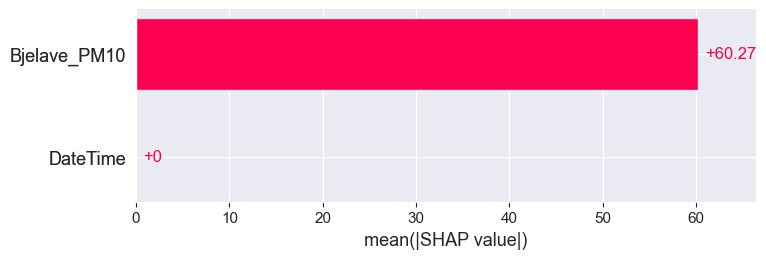

In [ ]:
explainer_data_aqi_ws_thirty_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_thirty,
    base_values=np.array([explainer_data_aqi_ws_thirty.expected_value] * len(shap_values_data_aqi_ws_thirty)),
    data=data_aqi_to_explain_ws_thirty,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_thirty_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


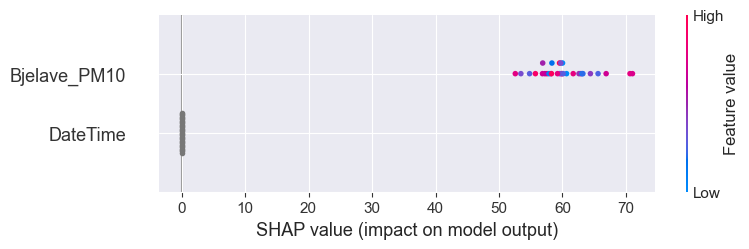

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_thirty_mod)

In [ ]:
import shap

explainer_data_aqi_ws_thirty_scaled = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap, background_data_aqi_ws_thirty_scaled_with_datetime, feature_columns_aqi)
shap_values_data_aqi_ws_thirty_scaled = explainer_data_aqi_ws_thirty_scaled.shap_values(data_aqi_to_explain_ws_thirty_scaled)

  0%|          | 0/31 [00:00<?, ?it/s]

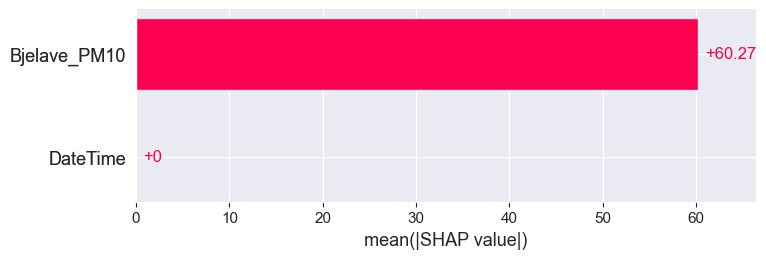

In [ ]:
explainer_data_aqi_ws_thirty_scaled_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_thirty_scaled,
    base_values=np.array([explainer_data_aqi_ws_thirty_scaled.expected_value] * len(shap_values_data_aqi_ws_thirty_scaled)),
    data=data_aqi_to_explain_ws_thirty_scaled,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_thirty_scaled_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


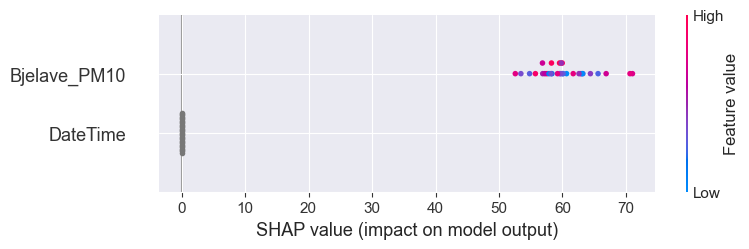

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_thirty_scaled_mod)

In [ ]:
explainer_data_aqi_ws_sixty = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap, background_data_aqi_ws_sixty, feature_columns_aqi)
shap_values_data_aqi_ws_sixty = explainer_data_aqi_ws_sixty.shap_values(data_aqi_to_explain_ws_sixty)

  0%|          | 0/61 [00:00<?, ?it/s]

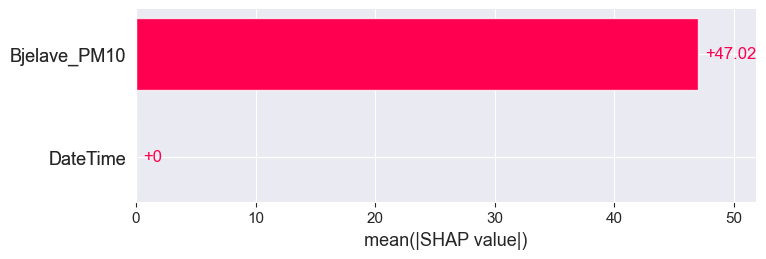

In [ ]:
explainer_data_aqi_ws_sixty_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_sixty,
    base_values=np.array([explainer_data_aqi_ws_thirty.expected_value] * len(shap_values_data_aqi_ws_thirty)),
    data=data_aqi_to_explain_ws_sixty,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_sixty_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


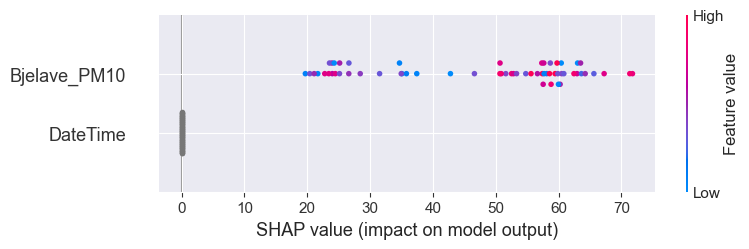

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_sixty_mod)

In [ ]:
explainer_data_aqi_ws_sixty_sixty_scaled = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap, background_data_aqi_ws_sixty_scaled_with_datetime, feature_columns_aqi)
shap_values_data_aqi_ws_sixty_scaled = explainer_data_aqi_ws_sixty_sixty_scaled.shap_values(data_aqi_to_explain_ws_sixty_scaled)

  0%|          | 0/61 [00:00<?, ?it/s]

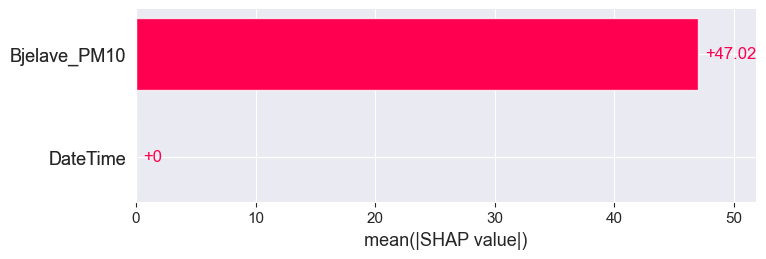

In [ ]:
explainer_data_aqi_ws_sixty_scaled_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_sixty_scaled,
    base_values=np.array([explainer_data_aqi_ws_thirty_scaled.expected_value] * len(shap_values_data_aqi_ws_thirty_scaled)),
    data=data_aqi_to_explain_ws_sixty_scaled,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_sixty_scaled_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


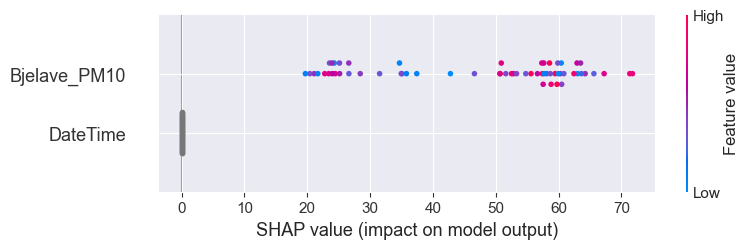

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_sixty_scaled_mod)

In [ ]:
explainer_data_aqi_ws_ninety = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap, background_data_aqi_ws_ninety, feature_columns_aqi)
shap_values_data_aqi_ws_ninety = explainer_data_aqi_ws_ninety.shap_values(data_aqi_to_explain_ws_ninety)

  0%|          | 0/91 [00:00<?, ?it/s]

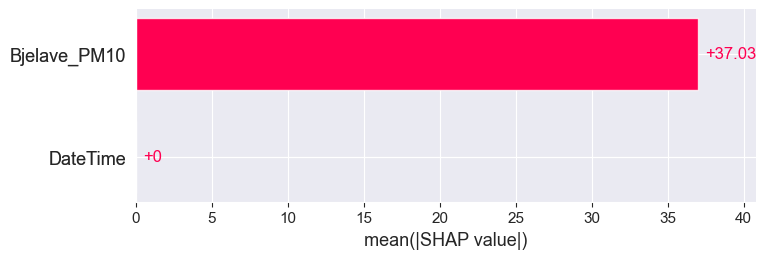

In [ ]:
explainer_data_aqi_ws_ninety_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_ninety,
    base_values=np.array([explainer_data_aqi_ws_ninety.expected_value] * len(shap_values_data_aqi_ws_ninety)),
    data=data_aqi_to_explain_ws_ninety,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_ninety_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


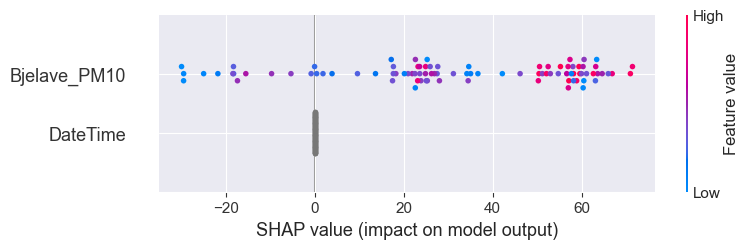

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_ninety_mod)

In [ ]:
explainer_data_aqi_ws_ninety_ninety_scaled = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap, background_data_aqi_ws_ninety_scaled_with_datetime, feature_columns_aqi)
shap_values_data_aqi_ws_ninety_scaled = explainer_data_aqi_ws_ninety_ninety_scaled.shap_values(data_aqi_to_explain_ws_ninety_scaled)

  0%|          | 0/91 [00:00<?, ?it/s]

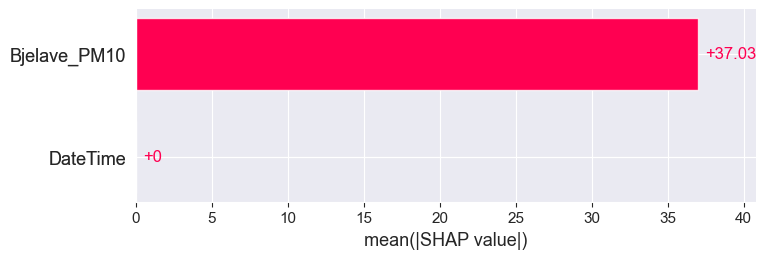

In [ ]:
explainer_data_aqi_ws_ninety_scaled_mod = shap.Explanation(
    values=shap_values_data_aqi_ws_ninety_scaled,
    base_values=np.array([explainer_data_aqi_ws_ninety_ninety_scaled.expected_value] * len(shap_values_data_aqi_ws_ninety_scaled)),
    data=data_aqi_to_explain_ws_ninety_scaled,
    feature_names=custom_feature_names
)

shap.plots.bar(explainer_data_aqi_ws_ninety_scaled_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


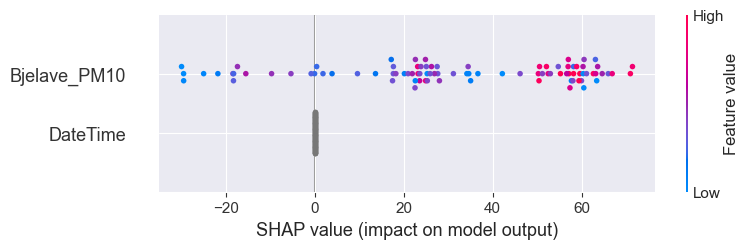

In [ ]:
shap.plots.beeswarm(explainer_data_aqi_ws_ninety_scaled_mod)

In [ ]:
data_combined_to_explain_ws_thirty.columns

Index(['ds', 'wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'yhat',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')

In [ ]:
background_data_combined_ws_thirty.columns

Index(['ds', 'wind_speed', 'wind_direction', 'precipitation', 'pressure',
       'temperature', 'humidity', 'visibility', 'cloudiness', 'y',
       'Bjelave_SO2', 'Bjelave_NO2'],
      dtype='object')

In [ ]:
custom_feature_names = [
    'Bjelave_PM10' if col == 'yhat' else
    'DateTime' if col == 'ds' else
    col
    for col in data_combined_to_explain_ws_thirty.columns
]

In [ ]:
custom_feature_names

['DateTime',
 'wind_speed',
 'wind_direction',
 'precipitation',
 'pressure',
 'temperature',
 'humidity',
 'visibility',
 'cloudiness',
 'Bjelave_PM10',
 'Bjelave_SO2',
 'Bjelave_NO2']

In [ ]:
explainer_data_combined_ws_thirty = shap.KernelExplainer(prophet_predict_ws_thirty_for_shap_combined, background_data_combined_ws_thirty)
shap_values_data_combined_ws_thirty = explainer_data_combined_ws_thirty.shap_values(data_combined_to_explain_ws_thirty)

  0%|          | 0/31 [00:00<?, ?it/s]

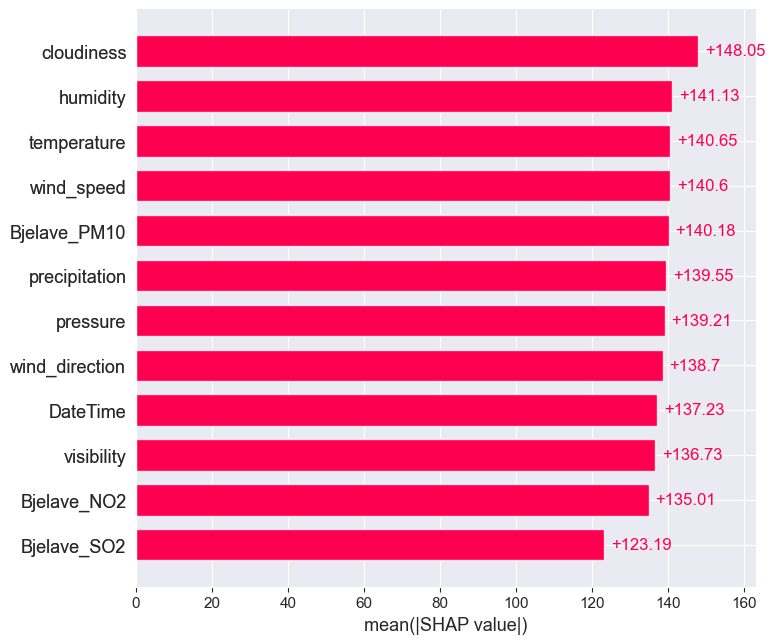

In [ ]:
explainer_data_combined_ws_thirty_mod = shap.Explanation(
    values=shap_values_data_combined_ws_thirty,
    base_values=np.array([explainer_data_combined_ws_thirty.expected_value] * len(shap_values_data_combined_ws_thirty)),
    data=data_combined_to_explain_ws_thirty,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_data_combined_ws_thirty_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


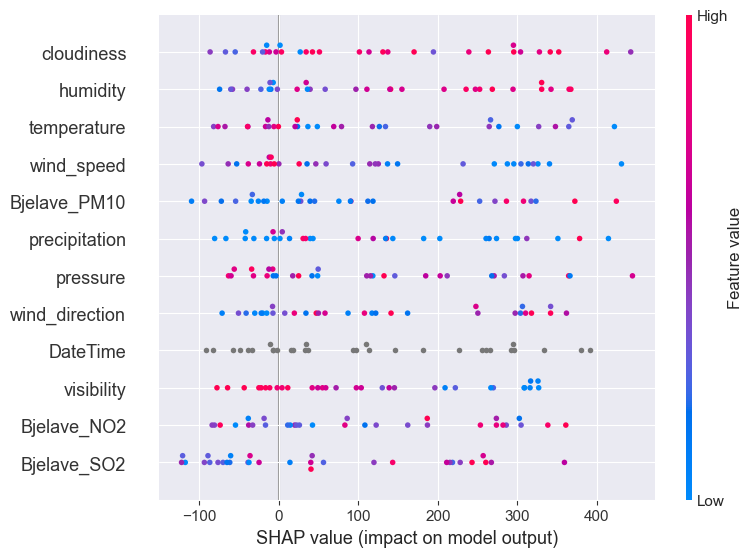

In [ ]:
shap.plots.beeswarm(explainer_data_combined_ws_thirty_mod, max_display=len(custom_feature_names))

In [ ]:
explainer_data_combined_ws_sixty = shap.KernelExplainer(prophet_predict_ws_sixty_for_shap_combined, background_data_combined_ws_sixty)
shap_values_data_combined_ws_sixty = explainer_data_combined_ws_sixty.shap_values(data_combined_to_explain_ws_sixty)

  0%|          | 0/61 [00:00<?, ?it/s]

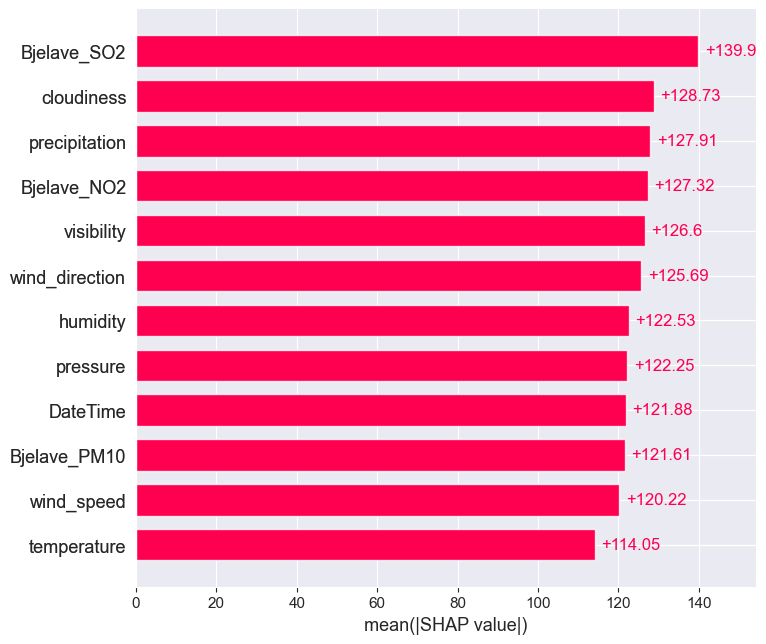

In [ ]:
explainer_data_combined_ws_sixty_mod = shap.Explanation(
    values=shap_values_data_combined_ws_sixty,
    base_values=np.array([explainer_data_combined_ws_sixty.expected_value] * len(shap_values_data_combined_ws_sixty)),
    data=data_combined_to_explain_ws_sixty,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_data_combined_ws_sixty_mod, max_display=len(custom_feature_names))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


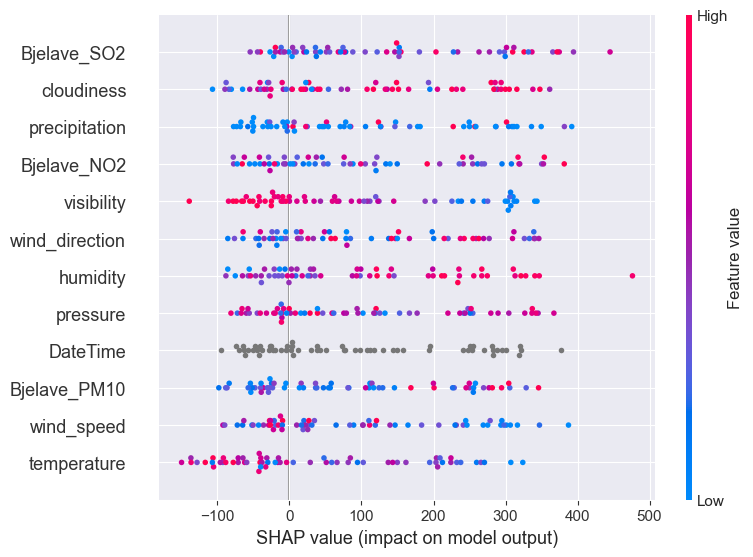

In [ ]:
shap.plots.beeswarm(explainer_data_combined_ws_sixty_mod, max_display=len(custom_feature_names))

In [ ]:
df1 = pd.DataFrame({
    "Index": list(range(len(background_data_combined_ws_sixty.columns))),
    "Background Columns": background_data_combined_ws_sixty.columns
})
df2 = pd.DataFrame({
    "Index": list(range(len(data_combined_to_explain_ws_sixty.columns))),
    "To Explain Columns": data_combined_to_explain_ws_sixty.columns
})
combined = pd.merge(df1, df2, on="Index", how="outer")
print(combined)

    Index Background Columns To Explain Columns
0       0                 ds                 ds
1       1         wind_speed         wind_speed
2       2     wind_direction     wind_direction
3       3      precipitation      precipitation
4       4           pressure           pressure
5       5        temperature        temperature
6       6           humidity           humidity
7       7         visibility         visibility
8       8         cloudiness         cloudiness
9       9                  y               yhat
10     10        Bjelave_SO2        Bjelave_SO2
11     11        Bjelave_NO2        Bjelave_NO2


In [ ]:
for idx, col in enumerate(custom_feature_names):
    print(f"{idx}: {col}")

0: DateTime
1: wind_speed
2: wind_direction
3: precipitation
4: pressure
5: temperature
6: humidity
7: visibility
8: cloudiness
9: Bjelave_PM10
10: Bjelave_SO2
11: Bjelave_NO2


In [ ]:
custom_feature_names_trimmed = custom_feature_names[1:]
custom_feature_names_trimmed[0]

'wind_speed'

In [ ]:
explainer_data_combined_ws_ninety = shap.KernelExplainer(prophet_predict_ws_ninety_for_shap_combined, background_data_combined_ws_ninety)
shap_values_data_combined_ws_ninety = explainer_data_combined_ws_ninety.shap_values(data_combined_to_explain_ws_ninety)

  0%|          | 0/91 [00:00<?, ?it/s]

In [ ]:
explainer_data_combined_ws_ninety_mod = shap.Explanation(
    values=shap_values_data_combined_ws_ninety,
    base_values=np.array([explainer_data_combined_ws_ninety.expected_value] * len(shap_values_data_combined_ws_ninety)),
    data=data_combined_to_explain_ws_ninety,
    feature_names=custom_feature_names
)
shap.plots.bar(explainer_data_combined_ws_ninety_mod, max_display=len(custom_feature_names))

NameError: name 'shap_values_data_combined_ws_ninety' is not defined

# Dependence Plots for Window Size 60 (FB Prophet Model)

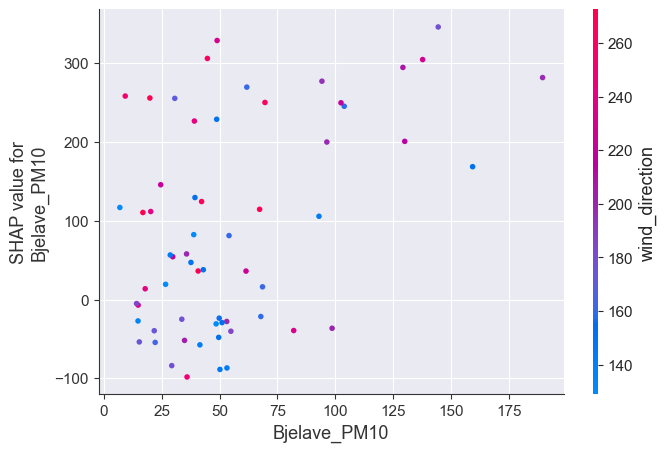

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=1
)

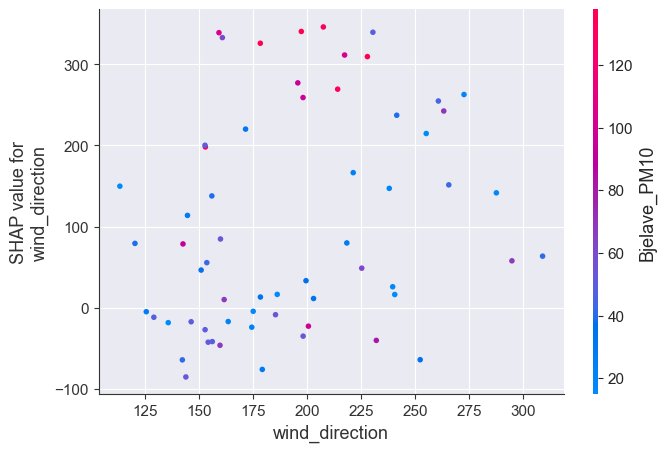

In [ ]:
shap.dependence_plot(
    ind=1,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

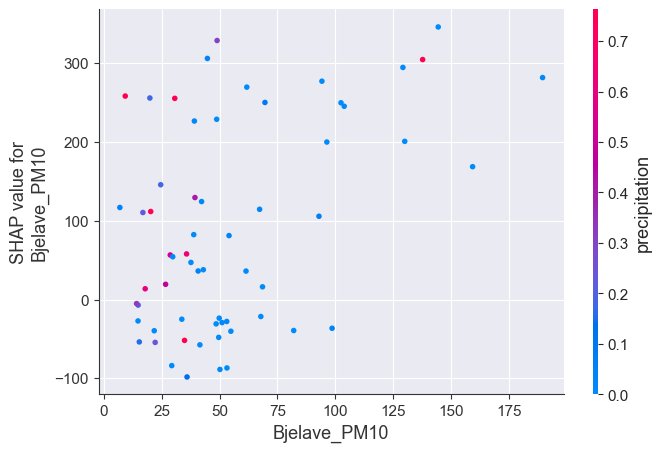

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=2
)

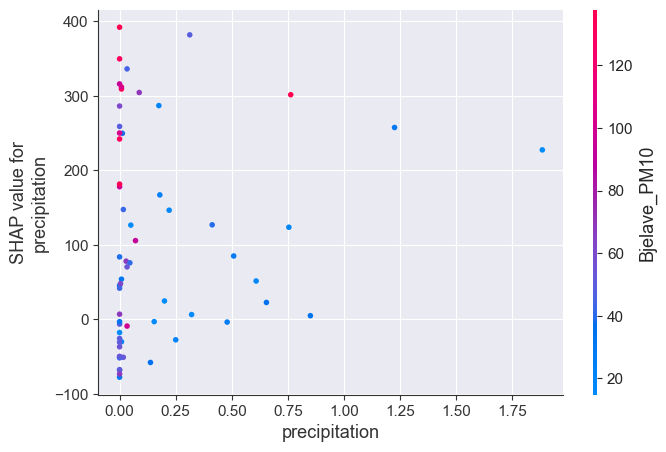

In [ ]:
shap.dependence_plot(
    ind=2,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

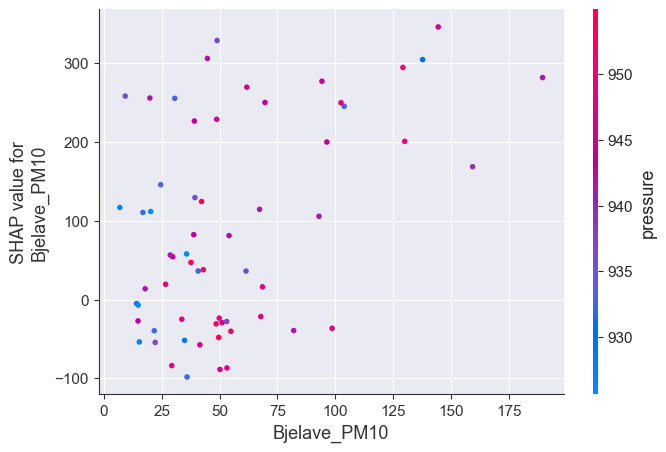

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=3
)

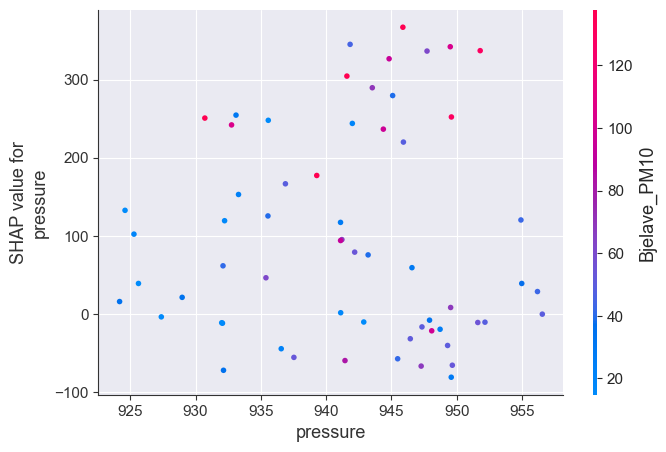

In [ ]:
shap.dependence_plot(
    ind=3,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

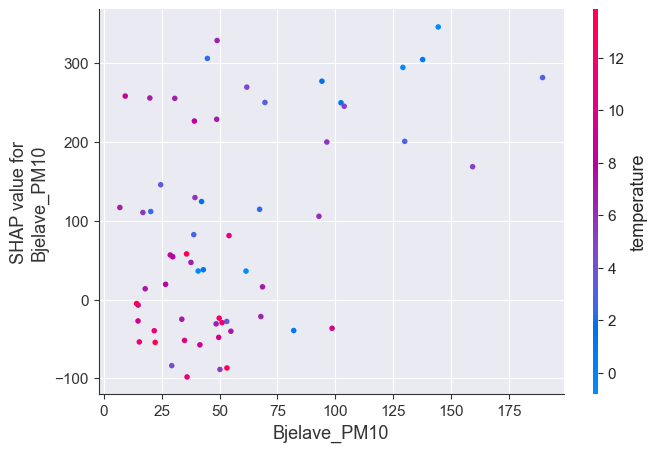

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=4
)

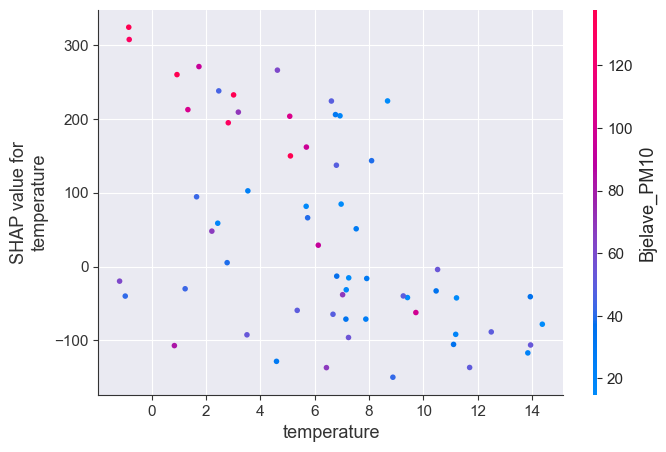

In [ ]:
shap.dependence_plot(
    ind=4,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

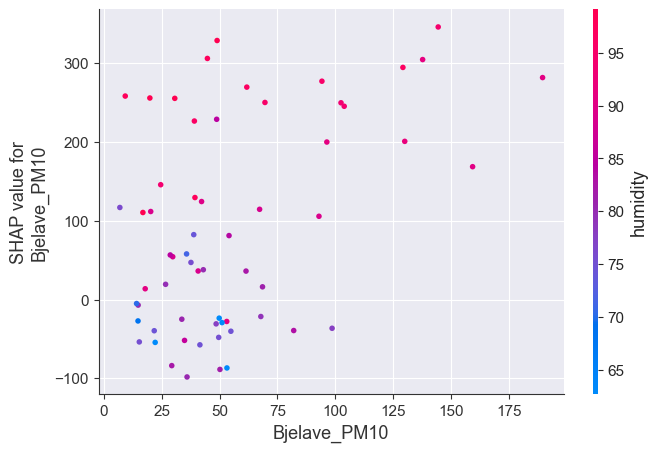

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=5
)

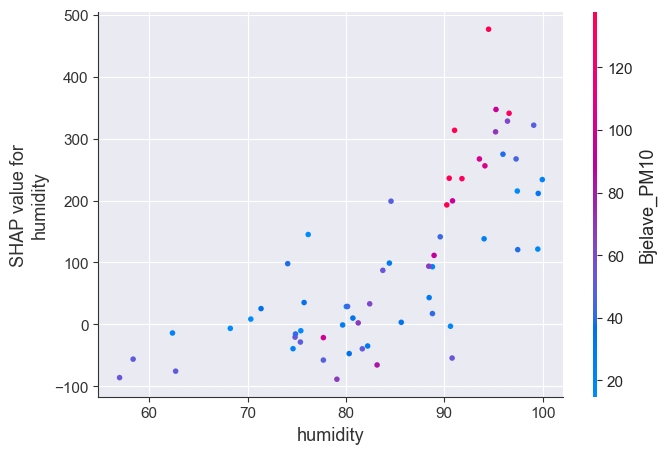

In [ ]:
shap.dependence_plot(
    ind=5,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

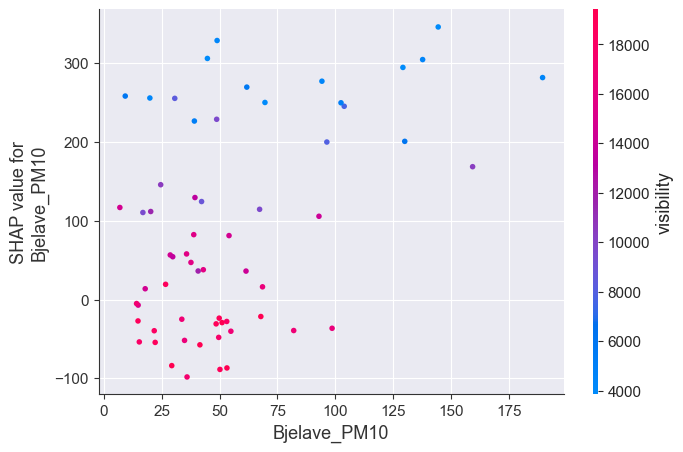

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=6
)

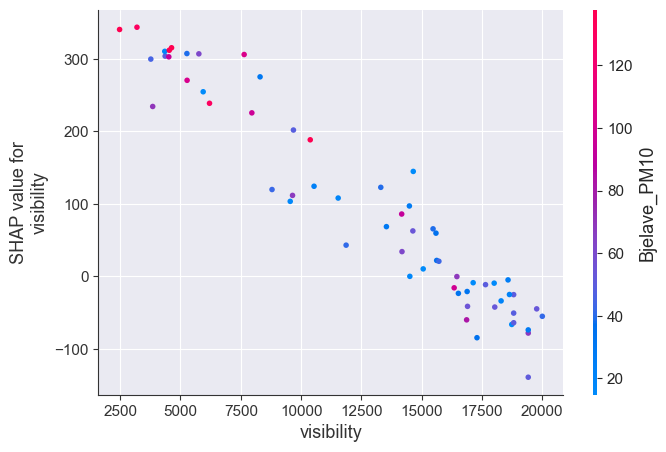

In [ ]:
shap.dependence_plot(
    ind=6,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

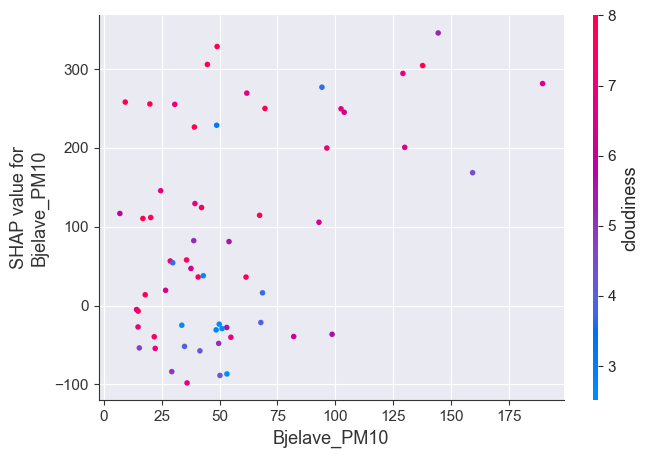

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=7
)

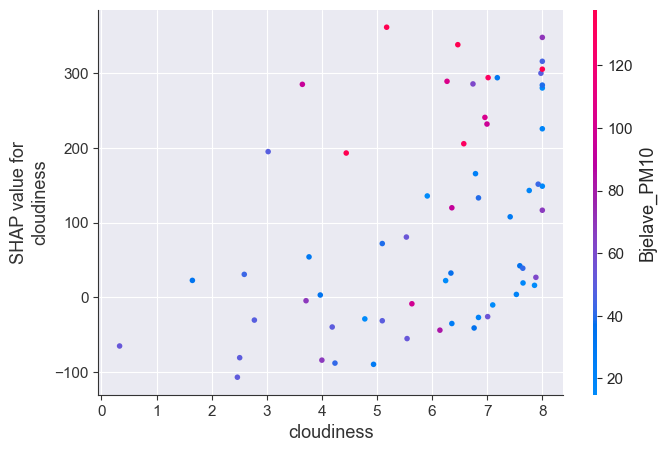

In [ ]:
shap.dependence_plot(
    ind=7,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

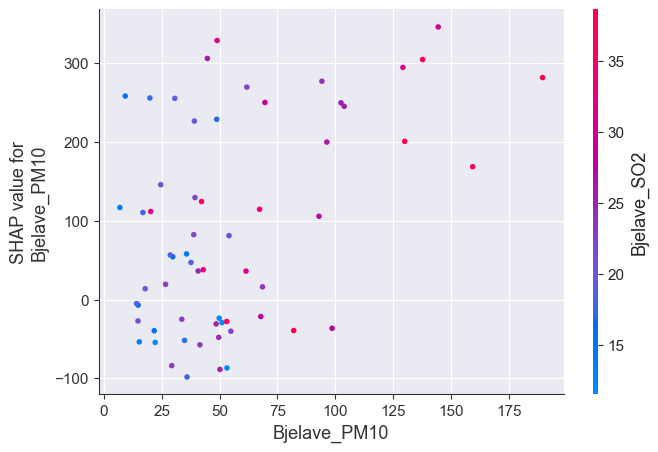

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=9
)

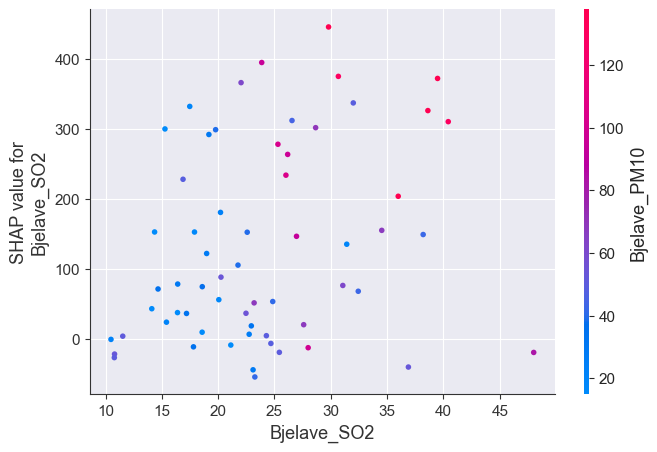

In [ ]:
shap.dependence_plot(
    ind=9,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

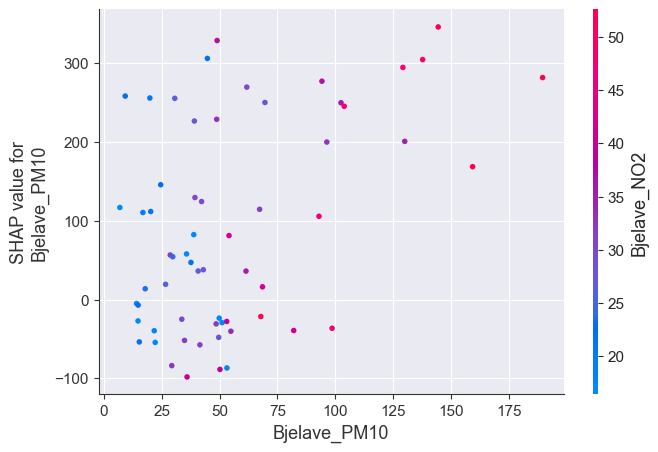

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=10
)

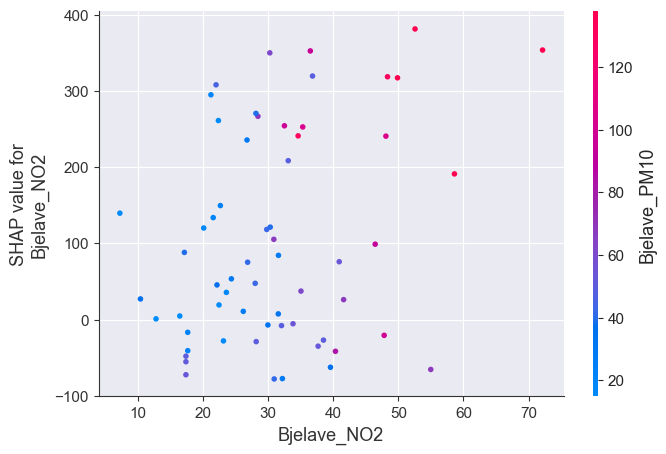

In [ ]:
shap.dependence_plot(
    ind=10,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

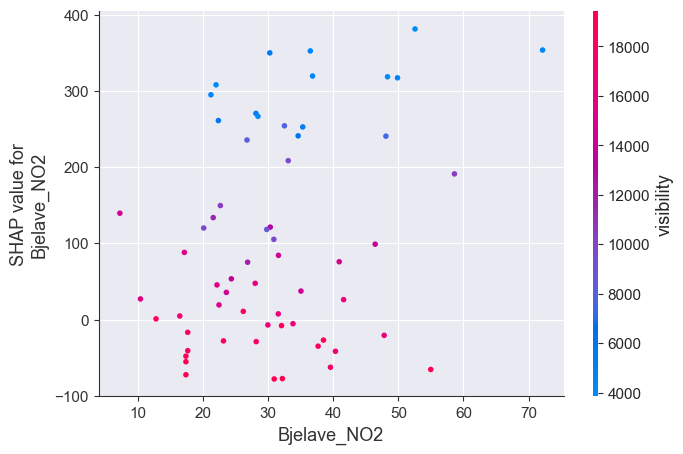

In [ ]:
shap.dependence_plot(
    ind=10,
    shap_values=shap_values_data_combined_ws_sixty[:, 1:],
    features=data_combined_to_explain_ws_sixty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    #izostavljen indeks
)

# Dependence Plots for Window Size 30 (FB Prophet Model)

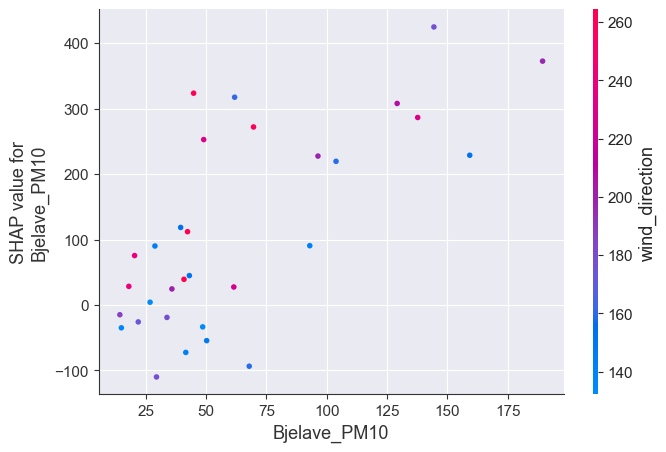

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=1
)

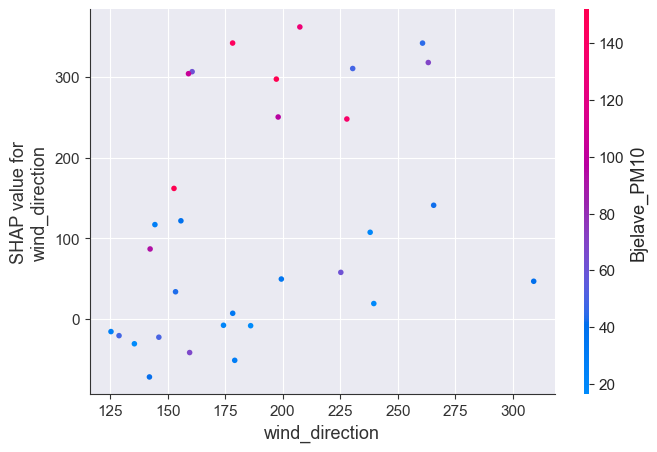

In [ ]:
shap.dependence_plot(
    ind=1,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

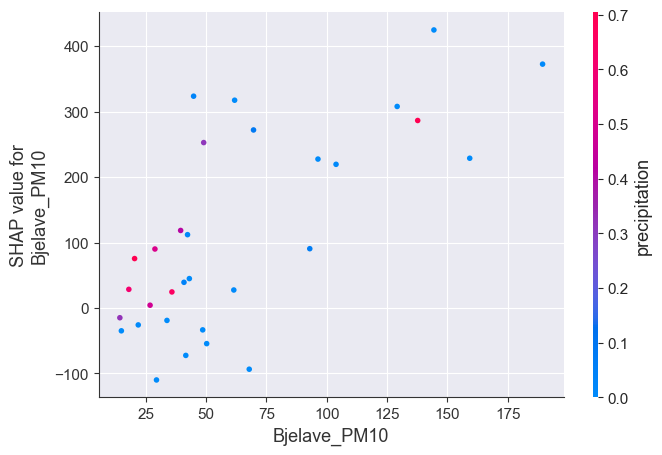

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=2
)

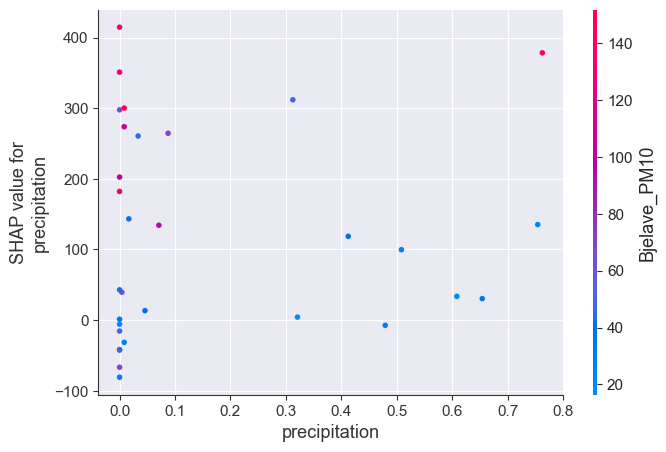

In [ ]:
shap.dependence_plot(
    ind=2,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

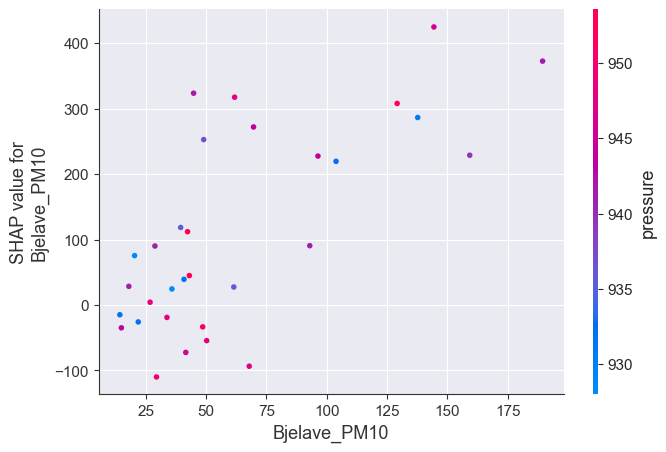

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=3
)

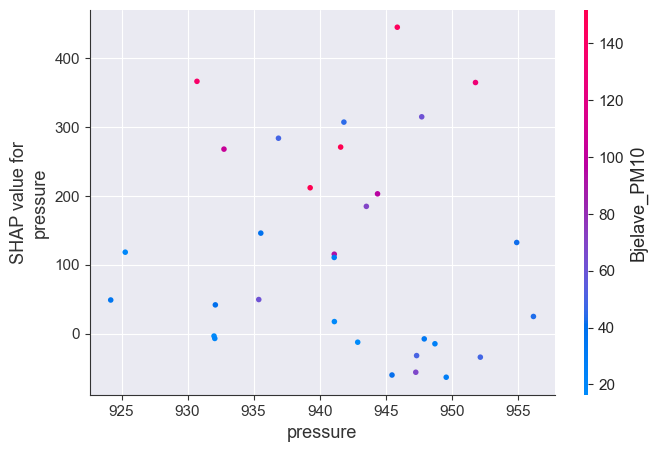

In [ ]:
shap.dependence_plot(
    ind=3,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

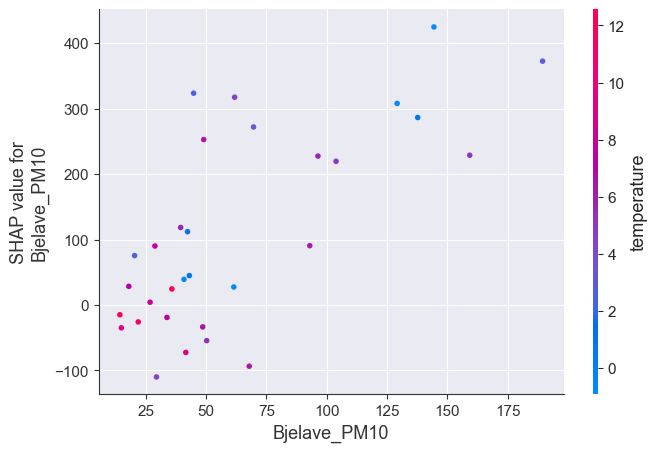

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=4
)

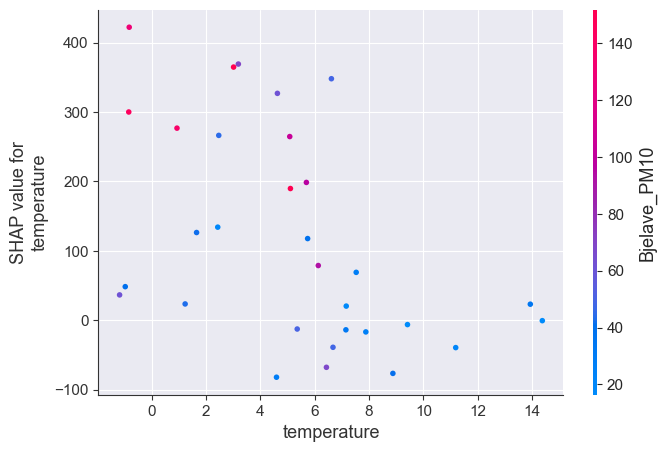

In [ ]:
shap.dependence_plot(
    ind=4,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

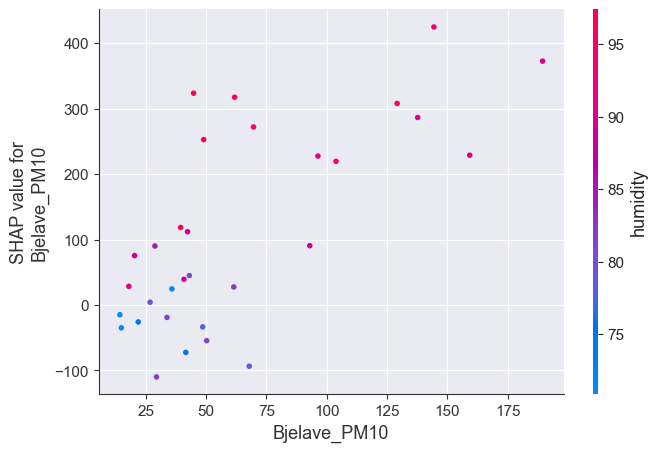

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=5
)

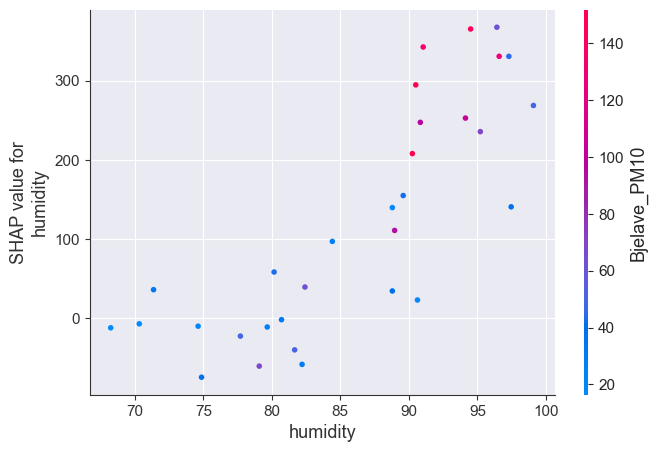

In [ ]:
shap.dependence_plot(
    ind=5,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

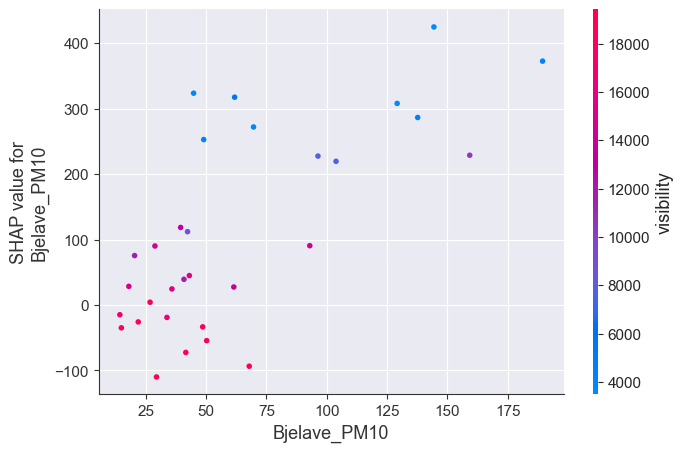

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=6
)

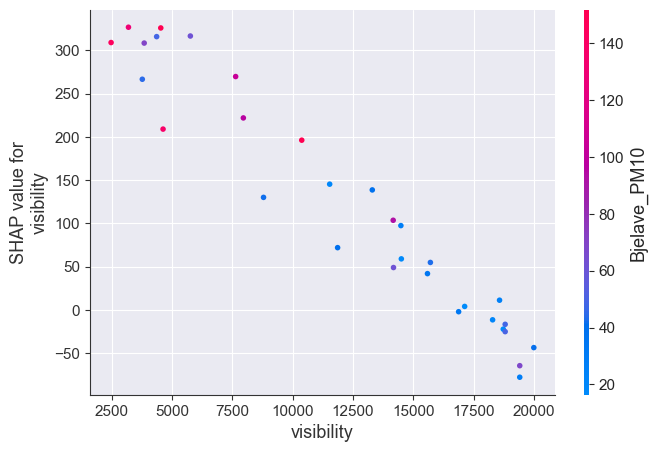

In [ ]:
shap.dependence_plot(
    ind=6,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

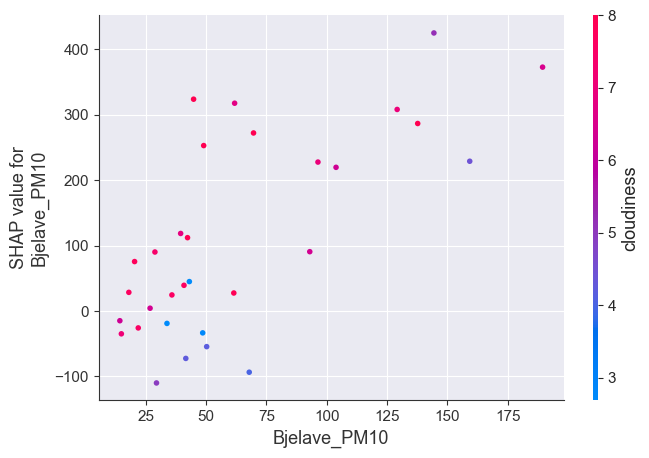

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=7
)

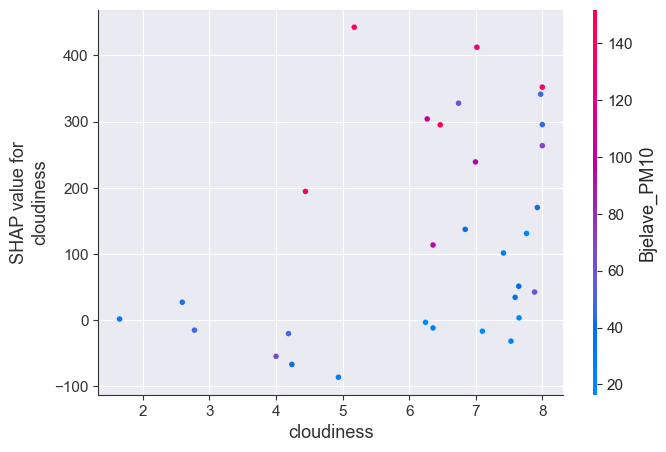

In [ ]:
shap.dependence_plot(
    ind=7,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

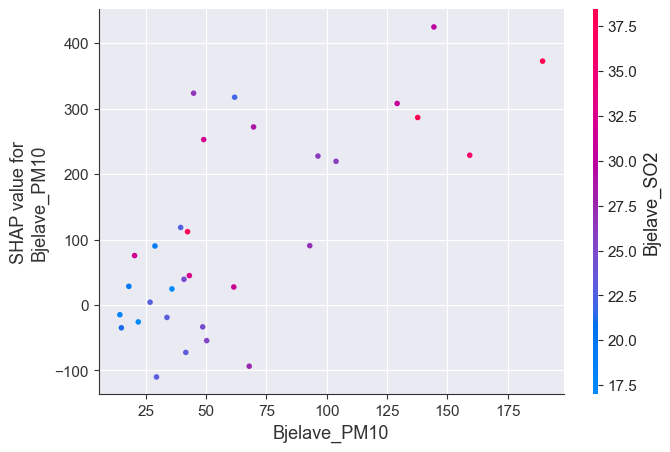

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=9
)

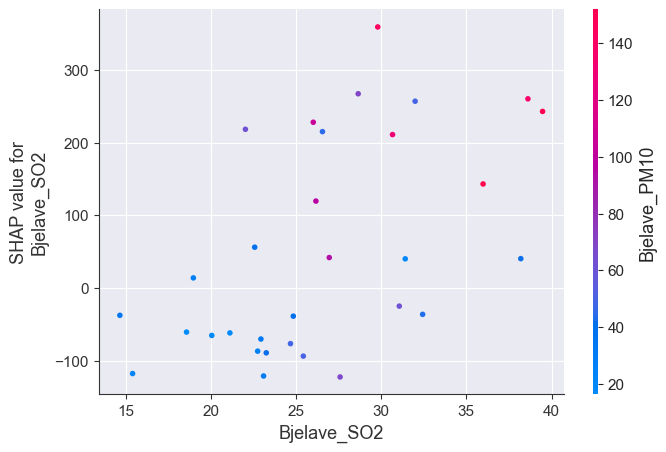

In [ ]:
shap.dependence_plot(
    ind=9,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

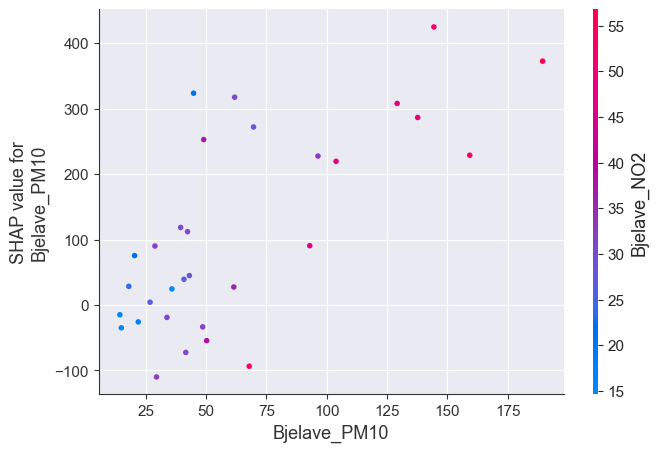

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=10
)

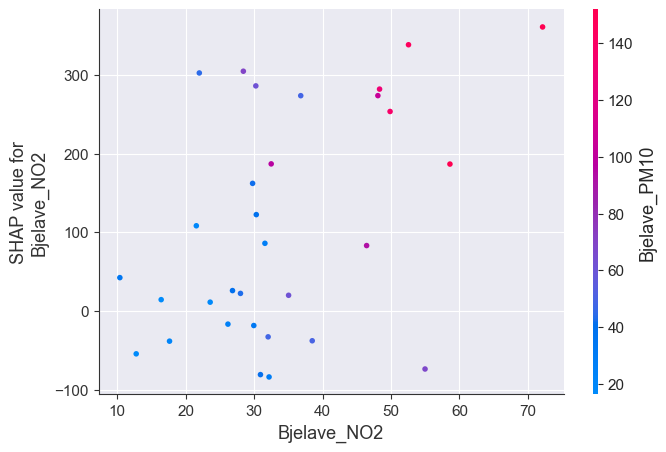

In [ ]:
shap.dependence_plot(
    ind=10,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed,
    interaction_index=8
)

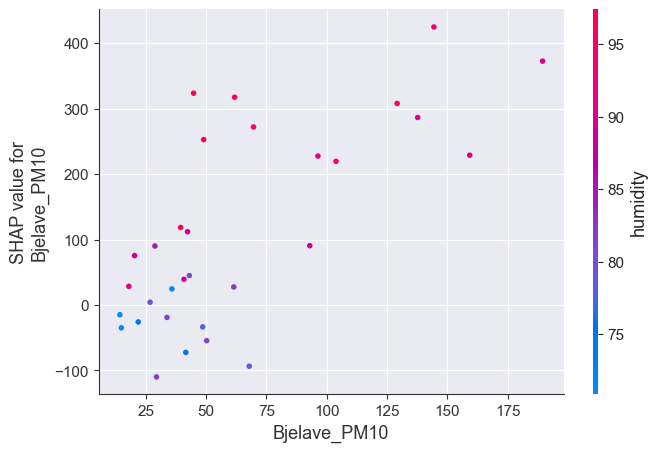

In [ ]:
shap.dependence_plot(
    ind=8,
    shap_values=shap_values_data_combined_ws_thirty[:, 1:],
    features=data_combined_to_explain_ws_thirty.iloc[:, 1:],
    feature_names=custom_feature_names_trimmed
    #izostavljen indeks
)

# Dependence Plots for Window Size 90 (FB Prophet Model) TBD